In [2]:
%reset -f

### Importing Required Libraries

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date

import random

import statistics
from scipy import stats
from statsmodels.stats import weightstats as stests
from scipy.stats import shapiro
from statsmodels.stats import power

from category_encoders import TargetEncoder, OneHotEncoder 

from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.metrics import log_loss, confusion_matrix, classification_report, cohen_kappa_score, accuracy_score, f1_score, roc_curve, roc_auc_score 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
import pydotplus

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier

from sklearn.feature_selection import RFE

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, StratifiedKFold, cross_val_score

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

from sklearn.utils import resample

from wordcloud import WordCloud
from wordcloud import STOPWORDS

import nltk
import re
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from nltk.stem.porter import PorterStemmer

### Reading the file - 2021VAERSSYMPTOMS

In [4]:
df_symp = pd.read_csv('2021VAERSSYMPTOMS.csv')
df_symp.head()

VAERS_ID                 SYMPTOM1  SYMPTOMVERSION1  \
0    916600                Dysphagia        23.100000   
1    916601                  Anxiety        23.100000   
2    916602         Chest discomfort        23.100000   
3    916603                Dizziness        23.100000   
4    916604  Injection site erythema        23.100000   

                  SYMPTOM2  SYMPTOMVERSION2                 SYMPTOM3  \
0             Epiglottitis        23.100000                      NaN   
1                 Dyspnoea        23.100000                      NaN   
2                Dysphagia        23.100000        Pain in extremity   
3                  Fatigue        23.100000       Mobility decreased   
4  Injection site pruritus        23.100000  Injection site swelling   

   SYMPTOMVERSION3               SYMPTOM4  SYMPTOMVERSION4 SYMPTOM5  \
0              NaN                    NaN              NaN      NaN   
1              NaN                    NaN              NaN      NaN   
2        23.100000      Visual impairment        23.100000      NaN   
3        23.100000                    NaN              NaN      NaN   
4        23.100000  Injection site warmth        23.100000      NaN   

   SYMPTOMVERSION5  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN

##### Checking dimension of the file: 

In [5]:
df_symp.shape

(875131, 11)

### Reading the file - 2021VAERSVAX

In [6]:
df_vax = pd.read_csv('2021VAERSVAX.csv',encoding_errors='ignore')
df_vax.head()

VAERS_ID VAX_TYPE         VAX_MANU  VAX_LOT VAX_DOSE_SERIES VAX_ROUTE  \
0    916600  COVID19          MODERNA  037K20A               1        IM   
1    916601  COVID19          MODERNA  025L20A               1        IM   
2    916602  COVID19  PFIZER\BIONTECH   EL1284               1        IM   
3    916603  COVID19          MODERNA  unknown             UNK       NaN   
4    916604  COVID19          MODERNA      NaN               1        IM   

  VAX_SITE                             VAX_NAME  
0       LA          COVID19 (COVID19 (MODERNA))  
1       RA          COVID19 (COVID19 (MODERNA))  
2       LA  COVID19 (COVID19 (PFIZER-BIONTECH))  
3      NaN          COVID19 (COVID19 (MODERNA))  
4       LA          COVID19 (COVID19 (MODERNA))

##### Checking dimension of the file:

In [7]:
df_vax.shape

(689290, 8)

### Reading the file - 2021VAERSDATA

In [8]:
df_data= pd.read_csv('2021VAERSDATA.csv', encoding_errors='ignore')
df_data.head()

VAERS_ID    RECVDATE STATE   AGE_YRS   CAGE_YR  CAGE_MO SEX RPT_DATE  \
0    916600  01/01/2021    TX 33.000000 33.000000      NaN   F      NaN   
1    916601  01/01/2021    CA 73.000000 73.000000      NaN   F      NaN   
2    916602  01/01/2021    WA 23.000000 23.000000      NaN   F      NaN   
3    916603  01/01/2021    WA 58.000000 58.000000      NaN   F      NaN   
4    916604  01/01/2021    TX 47.000000 47.000000      NaN   F      NaN   

                                        SYMPTOM_TEXT DIED DATEDIED L_THREAT  \
0  Right side of epiglottis swelled up and hinder...  NaN      NaN      NaN   
1  Approximately 30 min post vaccination administ...  NaN      NaN      NaN   
2  About 15 minutes after receiving the vaccine, ...  NaN      NaN      NaN   
3  extreme fatigue, dizziness,. could not lift my...  NaN      NaN      NaN   
4  Injection site swelling, redness, warm to the ...  NaN      NaN      NaN   

  ER_VISIT HOSPITAL  HOSPDAYS X_STAY DISABLE RECOVD    VAX_DATE  ONSET_DATE  \
0      NaN      NaN       NaN    NaN     NaN      Y  12/28/2020  12/30/2020   
1      NaN      NaN       NaN    NaN     NaN      Y  12/31/2020  12/31/2020   
2      NaN      NaN       NaN    NaN     NaN      U  12/31/2020  12/31/2020   
3      NaN      NaN       NaN    NaN     NaN      Y  12/23/2020  12/23/2020   
4      NaN      NaN       NaN    NaN     NaN      N  12/22/2020  12/29/2020   

   NUMDAYS LAB_DATA V_ADMINBY V_FUNDBY  \
0 2.000000     None       PVT      NaN   
1 0.000000      NaN       SEN      NaN   
2 0.000000      NaN       SEN      NaN   
3 0.000000     none       WRK      NaN   
4 7.000000      NaN       PUB      NaN   

                                          OTHER_MEDS  \
0                                               None   
1  Patient residing at nursing facility. See pati...   
2                                               None   
3                                               none   
4                                                 Na   

                                             CUR_ILL  \
0                                               None   
1  Patient residing at nursing facility. See pati...   
2                                               None   
3                                   kidney infection   
4                                                 Na   

                                             HISTORY  \
0                                               None   
1  Patient residing at nursing facility. See pati...   
2                                               None   
3  diverticulitis, mitral valve prolapse, osteoar...   
4                                                NaN   

                                           PRIOR_VAX SPLTTYPE  FORM_VERS  \
0                                                NaN      NaN          2   
1                                                NaN      NaN          2   
2                                                NaN      NaN          2   
3  got measles from measel shot, mums from mumps ...      NaN          2   
4                                                NaN      NaN          2   

  TODAYS_DATE BIRTH_DEFECT OFC_VISIT ER_ED_VISIT  \
0  01/01/2021          NaN         Y         NaN   
1  01/01/2021          NaN         Y         NaN   
2  01/01/2021          NaN       NaN           Y   
3  01/01/2021          NaN       NaN         NaN   
4  01/01/2021          NaN       NaN         NaN   

                                           ALLERGIES  
0                                  Pcn and bee venom  
1                                            "Dairy"  
2                                          Shellfish  
3  Diclofenac, novacaine, lidocaine, pickles, tom...  
4                                                 Na

##### Checking dimension of the file:

In [9]:
df_data.shape

(654986, 35)

In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654986 entries, 0 to 654985
Data columns (total 35 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   VAERS_ID      654986 non-null  int64  
 1   RECVDATE      654986 non-null  object 
 2   STATE         572236 non-null  object 
 3   AGE_YRS       583424 non-null  float64
 4   CAGE_YR       518587 non-null  float64
 5   CAGE_MO       3182 non-null    float64
 6   SEX           654986 non-null  object 
 7   RPT_DATE      350 non-null     object 
 8   SYMPTOM_TEXT  654828 non-null  object 
 9   DIED          8536 non-null    object 
 10  DATEDIED      7550 non-null    object 
 11  L_THREAT      9957 non-null    object 
 12  ER_VISIT      52 non-null      object 
 13  HOSPITAL      39734 non-null   object 
 14  HOSPDAYS      26819 non-null   float64
 15  X_STAY        339 non-null     object 
 16  DISABLE       10371 non-null   object 
 17  RECOVD        595432 non-null  object 
 18  VAX_

### Analysis on the reported events from 2016 - 2021

In [11]:
df_data['VAX_DATE']= pd.to_datetime(df_data['VAX_DATE'], format='%m/%d/%Y')
df_data['ONSET_DATE']= pd.to_datetime(df_data['ONSET_DATE'], format='%m/%d/%Y')

df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654986 entries, 0 to 654985
Data columns (total 35 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   VAERS_ID      654986 non-null  int64         
 1   RECVDATE      654986 non-null  object        
 2   STATE         572236 non-null  object        
 3   AGE_YRS       583424 non-null  float64       
 4   CAGE_YR       518587 non-null  float64       
 5   CAGE_MO       3182 non-null    float64       
 6   SEX           654986 non-null  object        
 7   RPT_DATE      350 non-null     object        
 8   SYMPTOM_TEXT  654828 non-null  object        
 9   DIED          8536 non-null    object        
 10  DATEDIED      7550 non-null    object        
 11  L_THREAT      9957 non-null    object        
 12  ER_VISIT      52 non-null      object        
 13  HOSPITAL      39734 non-null   object        
 14  HOSPDAYS      26819 non-null   float64       
 15  X_STAY        339

In [12]:
df_6yrs_data = df_data.loc[(df_data['VAX_DATE'] >= '2016-01-01')]
df_6yrs_data.head()

VAERS_ID    RECVDATE STATE   AGE_YRS   CAGE_YR  CAGE_MO SEX RPT_DATE  \
0    916600  01/01/2021    TX 33.000000 33.000000      NaN   F      NaN   
1    916601  01/01/2021    CA 73.000000 73.000000      NaN   F      NaN   
2    916602  01/01/2021    WA 23.000000 23.000000      NaN   F      NaN   
3    916603  01/01/2021    WA 58.000000 58.000000      NaN   F      NaN   
4    916604  01/01/2021    TX 47.000000 47.000000      NaN   F      NaN   

                                        SYMPTOM_TEXT DIED DATEDIED L_THREAT  \
0  Right side of epiglottis swelled up and hinder...  NaN      NaN      NaN   
1  Approximately 30 min post vaccination administ...  NaN      NaN      NaN   
2  About 15 minutes after receiving the vaccine, ...  NaN      NaN      NaN   
3  extreme fatigue, dizziness,. could not lift my...  NaN      NaN      NaN   
4  Injection site swelling, redness, warm to the ...  NaN      NaN      NaN   

  ER_VISIT HOSPITAL  HOSPDAYS X_STAY DISABLE RECOVD   VAX_DATE ONSET_DATE  \
0      NaN      NaN       NaN    NaN     NaN      Y 2020-12-28 2020-12-30   
1      NaN      NaN       NaN    NaN     NaN      Y 2020-12-31 2020-12-31   
2      NaN      NaN       NaN    NaN     NaN      U 2020-12-31 2020-12-31   
3      NaN      NaN       NaN    NaN     NaN      Y 2020-12-23 2020-12-23   
4      NaN      NaN       NaN    NaN     NaN      N 2020-12-22 2020-12-29   

   NUMDAYS LAB_DATA V_ADMINBY V_FUNDBY  \
0 2.000000     None       PVT      NaN   
1 0.000000      NaN       SEN      NaN   
2 0.000000      NaN       SEN      NaN   
3 0.000000     none       WRK      NaN   
4 7.000000      NaN       PUB      NaN   

                                          OTHER_MEDS  \
0                                               None   
1  Patient residing at nursing facility. See pati...   
2                                               None   
3                                               none   
4                                                 Na   

                                             CUR_ILL  \
0                                               None   
1  Patient residing at nursing facility. See pati...   
2                                               None   
3                                   kidney infection   
4                                                 Na   

                                             HISTORY  \
0                                               None   
1  Patient residing at nursing facility. See pati...   
2                                               None   
3  diverticulitis, mitral valve prolapse, osteoar...   
4                                                NaN   

                                           PRIOR_VAX SPLTTYPE  FORM_VERS  \
0                                                NaN      NaN          2   
1                                                NaN      NaN          2   
2                                                NaN      NaN          2   
3  got measles from measel shot, mums from mumps ...      NaN          2   
4                                                NaN      NaN          2   

  TODAYS_DATE BIRTH_DEFECT OFC_VISIT ER_ED_VISIT  \
0  01/01/2021          NaN         Y         NaN   
1  01/01/2021          NaN         Y         NaN   
2  01/01/2021          NaN       NaN           Y   
3  01/01/2021          NaN       NaN         NaN   
4  01/01/2021          NaN       NaN         NaN   

                                           ALLERGIES  
0                                  Pcn and bee venom  
1                                            "Dairy"  
2                                          Shellfish  
3  Diclofenac, novacaine, lidocaine, pickles, tom...  
4                                                 Na

##### Checking dimension of the file:

In [13]:
df_6yrs_data.shape

(604831, 35)

### Merging 2021VAERSSYMPTOMS and 2021VAERSVAX

In [14]:
df_symvax = pd.merge(df_symp, df_vax, on='VAERS_ID', how='inner', indicator= False)
df_symvax.head()

VAERS_ID                 SYMPTOM1  SYMPTOMVERSION1  \
0    916600                Dysphagia        23.100000   
1    916601                  Anxiety        23.100000   
2    916602         Chest discomfort        23.100000   
3    916603                Dizziness        23.100000   
4    916604  Injection site erythema        23.100000   

                  SYMPTOM2  SYMPTOMVERSION2                 SYMPTOM3  \
0             Epiglottitis        23.100000                      NaN   
1                 Dyspnoea        23.100000                      NaN   
2                Dysphagia        23.100000        Pain in extremity   
3                  Fatigue        23.100000       Mobility decreased   
4  Injection site pruritus        23.100000  Injection site swelling   

   SYMPTOMVERSION3               SYMPTOM4  SYMPTOMVERSION4 SYMPTOM5  \
0              NaN                    NaN              NaN      NaN   
1              NaN                    NaN              NaN      NaN   
2        23.100000      Visual impairment        23.100000      NaN   
3        23.100000                    NaN              NaN      NaN   
4        23.100000  Injection site warmth        23.100000      NaN   

   SYMPTOMVERSION5 VAX_TYPE         VAX_MANU  VAX_LOT VAX_DOSE_SERIES  \
0              NaN  COVID19          MODERNA  037K20A               1   
1              NaN  COVID19          MODERNA  025L20A               1   
2              NaN  COVID19  PFIZER\BIONTECH   EL1284               1   
3              NaN  COVID19          MODERNA  unknown             UNK   
4              NaN  COVID19          MODERNA      NaN               1   

  VAX_ROUTE VAX_SITE                             VAX_NAME  
0        IM       LA          COVID19 (COVID19 (MODERNA))  
1        IM       RA          COVID19 (COVID19 (MODERNA))  
2        IM       LA  COVID19 (COVID19 (PFIZER-BIONTECH))  
3       NaN      NaN          COVID19 (COVID19 (MODERNA))  
4        IM       LA          COVID19 (COVID19 (MODERNA))

##### Checking dimension of the file:

In [15]:
df_symvax.shape

(926328, 18)

### Merging with 2021VAERSDATA to get the final merged data

In [16]:
df_merged = pd.merge(df_symvax, df_6yrs_data, on='VAERS_ID', how= 'inner', indicator= False) 
df_merged.head()

VAERS_ID                 SYMPTOM1  SYMPTOMVERSION1  \
0    916600                Dysphagia        23.100000   
1    916601                  Anxiety        23.100000   
2    916602         Chest discomfort        23.100000   
3    916603                Dizziness        23.100000   
4    916604  Injection site erythema        23.100000   

                  SYMPTOM2  SYMPTOMVERSION2                 SYMPTOM3  \
0             Epiglottitis        23.100000                      NaN   
1                 Dyspnoea        23.100000                      NaN   
2                Dysphagia        23.100000        Pain in extremity   
3                  Fatigue        23.100000       Mobility decreased   
4  Injection site pruritus        23.100000  Injection site swelling   

   SYMPTOMVERSION3               SYMPTOM4  SYMPTOMVERSION4 SYMPTOM5  \
0              NaN                    NaN              NaN      NaN   
1              NaN                    NaN              NaN      NaN   
2        23.100000      Visual impairment        23.100000      NaN   
3        23.100000                    NaN              NaN      NaN   
4        23.100000  Injection site warmth        23.100000      NaN   

   SYMPTOMVERSION5 VAX_TYPE         VAX_MANU  VAX_LOT VAX_DOSE_SERIES  \
0              NaN  COVID19          MODERNA  037K20A               1   
1              NaN  COVID19          MODERNA  025L20A               1   
2              NaN  COVID19  PFIZER\BIONTECH   EL1284               1   
3              NaN  COVID19          MODERNA  unknown             UNK   
4              NaN  COVID19          MODERNA      NaN               1   

  VAX_ROUTE VAX_SITE                             VAX_NAME    RECVDATE STATE  \
0        IM       LA          COVID19 (COVID19 (MODERNA))  01/01/2021    TX   
1        IM       RA          COVID19 (COVID19 (MODERNA))  01/01/2021    CA   
2        IM       LA  COVID19 (COVID19 (PFIZER-BIONTECH))  01/01/2021    WA   
3       NaN      NaN          COVID19 (COVID19 (MODERNA))  01/01/2021    WA   
4        IM       LA          COVID19 (COVID19 (MODERNA))  01/01/2021    TX   

    AGE_YRS   CAGE_YR  CAGE_MO SEX RPT_DATE  \
0 33.000000 33.000000      NaN   F      NaN   
1 73.000000 73.000000      NaN   F      NaN   
2 23.000000 23.000000      NaN   F      NaN   
3 58.000000 58.000000      NaN   F      NaN   
4 47.000000 47.000000      NaN   F      NaN   

                                        SYMPTOM_TEXT DIED DATEDIED L_THREAT  \
0  Right side of epiglottis swelled up and hinder...  NaN      NaN      NaN   
1  Approximately 30 min post vaccination administ...  NaN      NaN      NaN   
2  About 15 minutes after receiving the vaccine, ...  NaN      NaN      NaN   
3  extreme fatigue, dizziness,. could not lift my...  NaN      NaN      NaN   
4  Injection site swelling, redness, warm to the ...  NaN      NaN      NaN   

  ER_VISIT HOSPITAL  HOSPDAYS X_STAY DISABLE RECOVD   VAX_DATE ONSET_DATE  \
0      NaN      NaN       NaN    NaN     NaN      Y 2020-12-28 2020-12-30   
1      NaN      NaN       NaN    NaN     NaN      Y 2020-12-31 2020-12-31   
2      NaN      NaN       NaN    NaN     NaN      U 2020-12-31 2020-12-31   
3      NaN      NaN       NaN    NaN     NaN      Y 2020-12-23 2020-12-23   
4      NaN      NaN       NaN    NaN     NaN      N 2020-12-22 2020-12-29   

   NUMDAYS LAB_DATA V_ADMINBY V_FUNDBY  \
0 2.000000     None       PVT      NaN   
1 0.000000      NaN       SEN      NaN   
2 0.000000      NaN       SEN      NaN   
3 0.000000     none       WRK      NaN   
4 7.000000      NaN       PUB      NaN   

                                          OTHER_MEDS  \
0                                               None   
1  Patient residing at nursing facility. See pati...   
2                                               None   
3                                               none   
4                                                 Na   

                                             CUR_ILL  \
0                  

##### Checking dimension of the file:

In [17]:
df_merged.shape

(865458, 52)

### Finding and Removing Duplicate Records

In [18]:
# Finding length of duplicate records: 

len(df_merged[df_merged.duplicated(subset= ['VAERS_ID'])== True])

260629

In [19]:
# Dropping duplicate records keeping the first record: 

df_new = df_merged.drop_duplicates(subset= ['VAERS_ID'], keep= 'first') 

# Checking dimension of data after dropping duplicates: 

df_new.shape

(604829, 52)

### Checking the info of the data

In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604829 entries, 0 to 865457
Data columns (total 52 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   VAERS_ID         604829 non-null  int64         
 1   SYMPTOM1         604829 non-null  object        
 2   SYMPTOMVERSION1  604829 non-null  float64       
 3   SYMPTOM2         488266 non-null  object        
 4   SYMPTOMVERSION2  488266 non-null  float64       
 5   SYMPTOM3         383194 non-null  object        
 6   SYMPTOMVERSION3  383194 non-null  float64       
 7   SYMPTOM4         292894 non-null  object        
 8   SYMPTOMVERSION4  292894 non-null  float64       
 9   SYMPTOM5         216545 non-null  object        
 10  SYMPTOMVERSION5  216545 non-null  float64       
 11  VAX_TYPE         604829 non-null  object        
 12  VAX_MANU         604829 non-null  object        
 13  VAX_LOT          424530 non-null  object        
 14  VAX_DOSE_SERIES  601

### Count and List of Numerical & Categorical Variables

In [21]:
cat = []
num = []

for i in df_new.columns:
    if df_new[i].dtype==object:
        cat.append(i)
    else:
        num.append(i)
        
print("The number of numerical features are:",len(num))
print()
print("The numerical features are:\n\n",num)
print("\n\n")
print("The number of categorical features are:", len(cat)) 
print()
print("The categorical features are:\n\n",cat)

The number of numerical features are: 14

The numerical features are:

 ['VAERS_ID', 'SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'HOSPDAYS', 'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'FORM_VERS']



The number of categorical features are: 38

The categorical features are:

 ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'RECVDATE', 'STATE', 'SEX', 'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'RECOVD', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES']


### Setting the 'VAERS_ID' which is an unique event ID as index

In [22]:
df_new.set_index('VAERS_ID', inplace= True)
df_new.head()

SYMPTOM1  SYMPTOMVERSION1                 SYMPTOM2  \
VAERS_ID                                                                      
916600                  Dysphagia        23.100000             Epiglottitis   
916601                    Anxiety        23.100000                 Dyspnoea   
916602           Chest discomfort        23.100000                Dysphagia   
916603                  Dizziness        23.100000                  Fatigue   
916604    Injection site erythema        23.100000  Injection site pruritus   

          SYMPTOMVERSION2                 SYMPTOM3  SYMPTOMVERSION3  \
VAERS_ID                                                              
916600          23.100000                      NaN              NaN   
916601          23.100000                      NaN              NaN   
916602          23.100000        Pain in extremity        23.100000   
916603          23.100000       Mobility decreased        23.100000   
916604          23.100000  Injection site swelling        23.100000   

                       SYMPTOM4  SYMPTOMVERSION4 SYMPTOM5  SYMPTOMVERSION5  \
VAERS_ID                                                                     
916600                      NaN              NaN      NaN              NaN   
916601                      NaN              NaN      NaN              NaN   
916602        Visual impairment        23.100000      NaN              NaN   
916603                      NaN              NaN      NaN              NaN   
916604    Injection site warmth        23.100000      NaN              NaN   

         VAX_TYPE         VAX_MANU  VAX_LOT VAX_DOSE_SERIES VAX_ROUTE  \
VAERS_ID                                                                
916600    COVID19          MODERNA  037K20A               1        IM   
916601    COVID19          MODERNA  025L20A               1        IM   
916602    COVID19  PFIZER\BIONTECH   EL1284               1        IM   
916603    COVID19          MODERNA  unknown             UNK       NaN   
916604    COVID19          MODERNA      NaN               1        IM   

         VAX_SITE                             VAX_NAME    RECVDATE STATE  \
VAERS_ID                                                                   
916600         LA          COVID19 (COVID19 (MODERNA))  01/01/2021    TX   
916601         RA          COVID19 (COVID19 (MODERNA))  01/01/2021    CA   
916602         LA  COVID19 (COVID19 (PFIZER-BIONTECH))  01/01/2021    WA   
916603        NaN          COVID19 (COVID19 (MODERNA))  01/01/2021    WA   
916604         LA          COVID19 (COVID19 (MODERNA))  01/01/2021    TX   

           AGE_YRS   CAGE_YR  CAGE_MO SEX RPT_DATE  \
VAERS_ID                                             
916600   33.000000 33.000000      NaN   F      NaN   
916601   73.000000 73.000000      NaN   F      NaN   
916602   23.000000 23.000000      NaN   F      NaN   
916603   58.000000 58.000000      NaN   F      NaN   
916604   47.000000 47.000000      NaN   F      NaN   

                                               SYMPTOM_TEXT DIED DATEDIED  \
VAERS_ID                                                                    
916600    Right side of epiglottis swelled up and hinder...  NaN      NaN   
916601    Approximately 30 min post vaccination administ...  NaN      NaN   
916602    About 15 minutes after receiving the vaccine, ...  NaN      NaN   
916603    extreme fatigue, dizziness,. could not lift my...  NaN      NaN   
916604    Injection site swelling, redness, warm to the ...  NaN      NaN   

         L_THREAT ER_VISIT HOSPITAL  HOSPDAYS X_STAY DISABLE RECOVD  \
VAERS_ID                                                              
916600        NaN      NaN      NaN       NaN    NaN     NaN      Y   
916601        NaN      NaN      NaN       NaN    NaN     NaN      Y   
916602        NaN      NaN      NaN       NaN    NaN     NaN      U   
916603        NaN      NaN      NaN       NaN    NaN     NaN      Y   
916604        NaN      NaN      NaN 

### Dropping redundant columns

In [23]:
# Dropping redundant columns: which have unique values / those which are not required for the analysis

# 'VAX_LOT', 'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 
# 'SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5', 
# 'RECVDATE', 'RPT_DATE', 'LAB_DATA', 'V_FUNDBY', 'SPLTTYPE', 'FORM_VERS', 'CAGE_MO', 'DATEDIED', 'HOSPDAYS', 'TODAYS_DATE', 'OTHER_MEDS'

In [24]:
df_v1 = df_new.drop(columns=['VAX_LOT', 'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5', 'RECVDATE', 'RPT_DATE', 'LAB_DATA', 'V_FUNDBY', 'SPLTTYPE', 'FORM_VERS', 'CAGE_MO', 'DATEDIED', 'HOSPDAYS', 'TODAYS_DATE', 'OTHER_MEDS']) 

# Checking dimension of data after dropping redundant columns: 

df_v1.shape

(604829, 31)

### Dropping redundant records from 'VAX_TYPE' and 'VAX_MANU'

In [25]:
# Percentage of Data by Vaccine Type: 

df_v1['VAX_TYPE'].value_counts(normalize= True) * 100

COVID19      96.105180
VARZOS        0.925386
UNK           0.806509
FLU4          0.452690
HPV9          0.166659
PPV           0.111271
HEPA          0.107799
MMR           0.102508
MMRV          0.089281
TDAP          0.088785
DTAP          0.087628
HEP           0.085809
VARCEL        0.083329
MNQ           0.074567
DTAPIPV       0.072582
MENB          0.064481
FLUC4         0.061670
FLUA4         0.059190
DTAPIPVHIB    0.056380
RV5           0.048774
DTAPHEPBIP    0.048443
FLUR4         0.045798
HIBV          0.044475
PNC13         0.032571
FLUX          0.022816
IPV           0.017856
TD            0.016038
RAB           0.015211
TYP           0.014715
FLUA3         0.012731
ANTH          0.011078
HEPAB         0.010582
EBZR          0.006117
FLUC3         0.005952
ADEN_4_7      0.005787
FLU3          0.005621
YF            0.005291
RV1           0.004795
CHOL          0.004133
DF            0.003637
FLUN4         0.003637
HPV4          0.002645
DT            0.002315
SMALL      

In [26]:
# dropping rows with unknown vaccine type - UNK 

df_vax_type_unk = df_v1[df_v1['VAX_TYPE'] == 'UNK'].index
df_v1.drop(df_vax_type_unk, inplace=True)
df_v1.shape

(599951, 31)

In [27]:
# Percentage of Data by Vaccine Manufacturers: 

df_v1['VAX_MANU'].value_counts(normalize= True) * 100

MODERNA                             46.089931
PFIZER\BIONTECH                     43.537222
JANSSEN                              7.082912
GLAXOSMITHKLINE BIOLOGICALS          1.342610
MERCK & CO. INC.                     0.728226
SANOFI PASTEUR                       0.529210
UNKNOWN MANUFACTURER                 0.237519
SEQIRUS, INC.                        0.183015
NOVARTIS VACCINES AND DIAGNOSTICS    0.115176
PFIZER\WYETH                         0.046504
PROTEIN SCIENCES CORPORATION         0.046170
DYNAVAX TECHNOLOGIES CORPORATION     0.021668
EMERGENT BIOSOLUTIONS                0.010834
BERNA BIOTECH, LTD.                  0.009834
TEVA PHARMACEUTICALS                 0.005834
PAXVAX                               0.004167
MEDIMMUNE VACCINES, INC.             0.003834
MASS. PUB HLTH BIOL LAB              0.002834
INTERCELL AG                         0.001167
SMITHKLINE BEECHAM                   0.000667
CSL LIMITED                          0.000333
MSP VACCINE COMPANY               

In [28]:
# dropping rows with unknown vaccine manufacturers - UNK 

df_vax_manu_unk = df_v1[df_v1['VAX_MANU'] == 'UNKNOWN MANUFACTURER'].index
df_v1.drop(df_vax_manu_unk, inplace=True)
df_v1.shape

(598526, 31)

### Combining ER_VISIT & ER_ED_VISIT variables

In [29]:
df_v1['ER_ED_VISIT'].value_counts()

Y    76894
Name: ER_ED_VISIT, dtype: int64

In [30]:
df_v1['ER_VISIT'].value_counts()

Y    51
Name: ER_VISIT, dtype: int64

In [31]:
# Since the variables - 'ER_ED_VISIT' and 'ER_VISIT' represent same data, we are grouping the data into a single variable. 



# Replacing null values in 'ER_ED_VISIT' with values in 'ER_VISIT':

df_v1['ER_ED_VISIT'] = df_v1['ER_ED_VISIT'].fillna(df_v1['ER_VISIT'])

In [32]:
df_v1['ER_ED_VISIT'].value_counts()

Y    76945
Name: ER_ED_VISIT, dtype: int64

In [33]:
# dropping the column - 'ER_VISIT' 

df_v1 = df_v1.drop('ER_VISIT', axis= 1)

In [34]:
df_v1.head(3)

SYMPTOM1      SYMPTOM2           SYMPTOM3  \
VAERS_ID                                                      
916600           Dysphagia  Epiglottitis                NaN   
916601             Anxiety      Dyspnoea                NaN   
916602    Chest discomfort     Dysphagia  Pain in extremity   

                   SYMPTOM4 SYMPTOM5 VAX_TYPE         VAX_MANU  \
VAERS_ID                                                         
916600                  NaN      NaN  COVID19          MODERNA   
916601                  NaN      NaN  COVID19          MODERNA   
916602    Visual impairment      NaN  COVID19  PFIZER\BIONTECH   

         VAX_DOSE_SERIES STATE   AGE_YRS   CAGE_YR SEX  \
VAERS_ID                                                 
916600                 1    TX 33.000000 33.000000   F   
916601                 1    CA 73.000000 73.000000   F   
916602                 1    WA 23.000000 23.000000   F   

                                               SYMPTOM_TEXT DIED L_THREAT  \
VAERS_ID                                                                    
916600    Right side of epiglottis swelled up and hinder...  NaN      NaN   
916601    Approximately 30 min post vaccination administ...  NaN      NaN   
916602    About 15 minutes after receiving the vaccine, ...  NaN      NaN   

         HOSPITAL X_STAY DISABLE RECOVD   VAX_DATE ONSET_DATE  NUMDAYS  \
VAERS_ID                                                                 
916600        NaN    NaN     NaN      Y 2020-12-28 2020-12-30 2.000000   
916601        NaN    NaN     NaN      Y 2020-12-31 2020-12-31 0.000000   
916602        NaN    NaN     NaN      U 2020-12-31 2020-12-31 0.000000   

         V_ADMINBY                                            CUR_ILL  \
VAERS_ID                                                                
916600         PVT                                               None   
916601         SEN  Patient residing at nursing facility. See pati...   
916602         SEN                                               None   

                                                    HISTORY PRIOR_VAX  \
VAERS_ID                                                                
916600                                                 None       NaN   
916601    Patient residing at nursing facility. See pati...       NaN   
916602                                                 None       NaN   

         BIRTH_DEFECT OFC_VISIT ER_ED_VISIT          ALLERGIES  
VAERS_ID                                                        
916600            NaN         Y         NaN  Pcn and bee venom  
916601            NaN         Y         NaN            "Dairy"  
916602            NaN       NaN           Y          Shellfish

In [35]:
# Checking the dimension of data: 

df_v1.shape

(598526, 30)

### Replacing Null values as per VAERS DataUserGuide

In [36]:
# Died - Replace 'nan' with 'N'
df_v1['DIED'] = df_v1['DIED'].replace({np.nan: 'N'})

# L_Threat - Replace 'nan' with 'N'
df_v1['L_THREAT'] = df_v1['L_THREAT'].replace({np.nan: 'N'})

# ER_ED_Visit - Replace 'nan' with 'N'
df_v1['ER_ED_VISIT'] = df_v1['ER_ED_VISIT'].replace({np.nan: 'N'}) 

# Ofc_Visit - Replace 'nan' with 'N'
df_v1['OFC_VISIT'] = df_v1['OFC_VISIT'].replace({np.nan: 'N'}) 

# Hospital - Replace 'nan' with 'N'
df_v1['HOSPITAL'] = df_v1['HOSPITAL'].replace({np.nan: 'N'}) 

# X_Stay - Replace 'nan' with 'N'
df_v1['X_STAY'] = df_v1['X_STAY'].replace({np.nan: 'N'})

# Disable - Replace 'nan' with 'N' 
df_v1['DISABLE'] = df_v1['DISABLE'].replace({np.nan: 'N'}) 

# Birth_Defect - Replace 'nan' with 'N'
df_v1['BIRTH_DEFECT'] = df_v1['BIRTH_DEFECT'].replace({np.nan: 'N'}) 

# Recovd - Replace 'nan' with 'U'
df_v1['RECOVD'] = df_v1['RECOVD'].replace({np.nan: 'U'})

In [37]:
df_v1.head(3)

SYMPTOM1      SYMPTOM2           SYMPTOM3  \
VAERS_ID                                                      
916600           Dysphagia  Epiglottitis                NaN   
916601             Anxiety      Dyspnoea                NaN   
916602    Chest discomfort     Dysphagia  Pain in extremity   

                   SYMPTOM4 SYMPTOM5 VAX_TYPE         VAX_MANU  \
VAERS_ID                                                         
916600                  NaN      NaN  COVID19          MODERNA   
916601                  NaN      NaN  COVID19          MODERNA   
916602    Visual impairment      NaN  COVID19  PFIZER\BIONTECH   

         VAX_DOSE_SERIES STATE   AGE_YRS   CAGE_YR SEX  \
VAERS_ID                                                 
916600                 1    TX 33.000000 33.000000   F   
916601                 1    CA 73.000000 73.000000   F   
916602                 1    WA 23.000000 23.000000   F   

                                               SYMPTOM_TEXT DIED L_THREAT  \
VAERS_ID                                                                    
916600    Right side of epiglottis swelled up and hinder...    N        N   
916601    Approximately 30 min post vaccination administ...    N        N   
916602    About 15 minutes after receiving the vaccine, ...    N        N   

         HOSPITAL X_STAY DISABLE RECOVD   VAX_DATE ONSET_DATE  NUMDAYS  \
VAERS_ID                                                                 
916600          N      N       N      Y 2020-12-28 2020-12-30 2.000000   
916601          N      N       N      Y 2020-12-31 2020-12-31 0.000000   
916602          N      N       N      U 2020-12-31 2020-12-31 0.000000   

         V_ADMINBY                                            CUR_ILL  \
VAERS_ID                                                                
916600         PVT                                               None   
916601         SEN  Patient residing at nursing facility. See pati...   
916602         SEN                                               None   

                                                    HISTORY PRIOR_VAX  \
VAERS_ID                                                                
916600                                                 None       NaN   
916601    Patient residing at nursing facility. See pati...       NaN   
916602                                                 None       NaN   

         BIRTH_DEFECT OFC_VISIT ER_ED_VISIT          ALLERGIES  
VAERS_ID                                                        
916600              N         Y           N  Pcn and bee venom  
916601              N         Y           N            "Dairy"  
916602              N         N           Y          Shellfish

### Feature Engineering - Creating Target Column

In [38]:
df_v1.loc[((df_v1['DIED'] == 'N') & (df_v1['L_THREAT'] == 'N') & (df_v1['ER_ED_VISIT'] == 'N') & (df_v1['HOSPITAL'] == 'N') & (df_v1['X_STAY'] == 'N') & (df_v1['OFC_VISIT'] == 'N') & (df_v1['DISABLE'] == 'N') & (df_v1['BIRTH_DEFECT'] == 'Y')), 'ADVERSE_EFFECT'] = 'Birth_Defect'

df_v1.loc[((df_v1['DIED'] == 'N') & (df_v1['L_THREAT'] == 'N') & (df_v1['ER_ED_VISIT'] == 'N') & (df_v1['HOSPITAL'] == 'N') & (df_v1['X_STAY'] == 'N') & (df_v1['OFC_VISIT'] == 'N') & (df_v1['DISABLE'] == 'Y')), 'ADVERSE_EFFECT'] = 'Disabled' 

df_v1.loc[((df_v1['DIED'] == 'N') & (df_v1['L_THREAT'] == 'N') & (df_v1['ER_ED_VISIT'] == 'N') & (df_v1['HOSPITAL'] == 'N') & (df_v1['X_STAY'] == 'N') & (df_v1['OFC_VISIT'] == 'Y')), 'ADVERSE_EFFECT'] = 'Clinic_Visit' 

df_v1.loc[((df_v1['DIED'] == 'N') & (df_v1['L_THREAT'] == 'N') & (df_v1['ER_ED_VISIT'] == 'N') & (df_v1['X_STAY'] == 'N')  & (df_v1['HOSPITAL'] == 'Y')), 'ADVERSE_EFFECT'] = 'Hospitalized' 

df_v1.loc[((df_v1['DIED'] == 'N') & (df_v1['L_THREAT'] == 'N') & (df_v1['ER_ED_VISIT'] == 'N') & (df_v1['X_STAY'] == 'Y')), 'ADVERSE_EFFECT'] = 'Prolonged_Hospitalization' 

df_v1.loc[((df_v1['DIED'] == 'N') & (df_v1['L_THREAT'] == 'N') & (df_v1['ER_ED_VISIT'] == 'Y')), 'ADVERSE_EFFECT'] = 'ER_Visit' 

df_v1.loc[((df_v1['DIED'] == 'N') & (df_v1['L_THREAT'] == 'Y')), 'ADVERSE_EFFECT'] = 'Life_Threat' 

df_v1.loc[((df_v1['DIED'] == 'Y')), 'ADVERSE_EFFECT'] = 'Died' 

In [39]:
df_v1['ADVERSE_EFFECT'].isnull().sum()

401837

In [40]:
df_v1['ADVERSE_EFFECT'] = df_v1['ADVERSE_EFFECT'].fillna('No_Adverse_Effect')

In [41]:
df_v1['ADVERSE_EFFECT'].isnull().sum()

0

In [42]:
df_v1['ADVERSE_EFFECT'].value_counts()

No_Adverse_Effect            401837
Clinic_Visit                  93373
ER_Visit                      69203
Hospitalized                  15755
Life_Threat                    9184
Died                           7507
Disabled                       1408
Prolonged_Hospitalization       178
Birth_Defect                     81
Name: ADVERSE_EFFECT, dtype: int64

In [43]:
df_v1[df_v1['ADVERSE_EFFECT']=='No_Adverse_Effect'][['DIED', 'L_THREAT', 'ER_ED_VISIT', 'X_STAY', 'HOSPITAL', 'OFC_VISIT', 'DISABLE', 'BIRTH_DEFECT']].value_counts()

DIED  L_THREAT  ER_ED_VISIT  X_STAY  HOSPITAL  OFC_VISIT  DISABLE  BIRTH_DEFECT
N     N         N            N       N         N          N        N               401837
dtype: int64

In [44]:
df_v1[df_v1['ADVERSE_EFFECT']=='No_Adverse_Effect'][['RECOVD']].value_counts()

RECOVD
Y         153643
U         128027
N         120167
dtype: int64

### Concatenating Symptoms

In [45]:
# Replacing null values:

df_v1['SYMPTOM2'] = df_v1['SYMPTOM2'].replace({np.nan: 'Not_Applicable'}) 
df_v1['SYMPTOM3'] = df_v1['SYMPTOM3'].replace({np.nan: 'Not_Applicable'}) 
df_v1['SYMPTOM4'] = df_v1['SYMPTOM4'].replace({np.nan: 'Not_Applicable'}) 
df_v1['SYMPTOM5'] = df_v1['SYMPTOM5'].replace({np.nan: 'Not_Applicable'}) 
df_v1['SYMPTOM_TEXT'] = df_v1['SYMPTOM_TEXT'].replace({np.nan: 'Not_Applicable'})

In [46]:
# Concatenating symptoms: 

df_v1['SYMPTOMS POST VACCINATION'] = df_v1['SYMPTOM1'] + ", " + df_v1['SYMPTOM2'] + ", " + df_v1['SYMPTOM3'] + ", " + df_v1['SYMPTOM4'] + ", " + df_v1['SYMPTOM5'] + ", " + df_v1['SYMPTOM_TEXT'] 
df_v1.head()

SYMPTOM1                 SYMPTOM2  \
VAERS_ID                                                     
916600                  Dysphagia             Epiglottitis   
916601                    Anxiety                 Dyspnoea   
916602           Chest discomfort                Dysphagia   
916603                  Dizziness                  Fatigue   
916604    Injection site erythema  Injection site pruritus   

                         SYMPTOM3               SYMPTOM4        SYMPTOM5  \
VAERS_ID                                                                   
916600             Not_Applicable         Not_Applicable  Not_Applicable   
916601             Not_Applicable         Not_Applicable  Not_Applicable   
916602          Pain in extremity      Visual impairment  Not_Applicable   
916603         Mobility decreased         Not_Applicable  Not_Applicable   
916604    Injection site swelling  Injection site warmth  Not_Applicable   

         VAX_TYPE         VAX_MANU VAX_DOSE_SERIES STATE   AGE_YRS   CAGE_YR  \
VAERS_ID                                                                       
916600    COVID19          MODERNA               1    TX 33.000000 33.000000   
916601    COVID19          MODERNA               1    CA 73.000000 73.000000   
916602    COVID19  PFIZER\BIONTECH               1    WA 23.000000 23.000000   
916603    COVID19          MODERNA             UNK    WA 58.000000 58.000000   
916604    COVID19          MODERNA               1    TX 47.000000 47.000000   

         SEX                                       SYMPTOM_TEXT DIED L_THREAT  \
VAERS_ID                                                                        
916600     F  Right side of epiglottis swelled up and hinder...    N        N   
916601     F  Approximately 30 min post vaccination administ...    N        N   
916602     F  About 15 minutes after receiving the vaccine, ...    N        N   
916603     F  extreme fatigue, dizziness,. could not lift my...    N        N   
916604     F  Injection site swelling, redness, warm to the ...    N        N   

         HOSPITAL X_STAY DISABLE RECOVD   VAX_DATE ONSET_DATE  NUMDAYS  \
VAERS_ID                                                                 
916600          N      N       N      Y 2020-12-28 2020-12-30 2.000000   
916601          N      N       N      Y 2020-12-31 2020-12-31 0.000000   
916602          N      N       N      U 2020-12-31 2020-12-31 0.000000   
916603          N      N       N      Y 2020-12-23 2020-12-23 0.000000   
916604          N      N       N      N 2020-12-22 2020-12-29 7.000000   

         V_ADMINBY                                            CUR_ILL  \
VAERS_ID                                                                
916600         PVT                                               None   
916601         SEN  Patient residing at nursing facility. See pati...   
916602         SEN                                               None   
916603         WRK                                   kidney infection   
916604         PUB                                                 Na   

                                                    HISTORY  \
VAERS_ID                                                      
916600                                                 None   
916601    Patient residing at nursing facility. See pati...   
916602                                                 None   
916603    diverticulitis, mitral valve prolapse, osteoar...   
916604                                                  NaN   

                                                  PRIOR_VAX BIRTH_DEFECT  \
VAERS_ID                                                                   
916600                                                  NaN            N   
916601                                                  NaN            N   
916602                                                  NaN            N   
916603    got measles from measel shot, mums from mumps ...            N   

In [47]:
# Dropping the individual columns: 

df_v2 = df_v1.drop(columns=['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5', 'SYMPTOM_TEXT']) 
df_v2.head()

VAX_TYPE         VAX_MANU VAX_DOSE_SERIES STATE   AGE_YRS   CAGE_YR  \
VAERS_ID                                                                       
916600    COVID19          MODERNA               1    TX 33.000000 33.000000   
916601    COVID19          MODERNA               1    CA 73.000000 73.000000   
916602    COVID19  PFIZER\BIONTECH               1    WA 23.000000 23.000000   
916603    COVID19          MODERNA             UNK    WA 58.000000 58.000000   
916604    COVID19          MODERNA               1    TX 47.000000 47.000000   

         SEX DIED L_THREAT HOSPITAL X_STAY DISABLE RECOVD   VAX_DATE  \
VAERS_ID                                                               
916600     F    N        N        N      N       N      Y 2020-12-28   
916601     F    N        N        N      N       N      Y 2020-12-31   
916602     F    N        N        N      N       N      U 2020-12-31   
916603     F    N        N        N      N       N      Y 2020-12-23   
916604     F    N        N        N      N       N      N 2020-12-22   

         ONSET_DATE  NUMDAYS V_ADMINBY  \
VAERS_ID                                 
916600   2020-12-30 2.000000       PVT   
916601   2020-12-31 0.000000       SEN   
916602   2020-12-31 0.000000       SEN   
916603   2020-12-23 0.000000       WRK   
916604   2020-12-29 7.000000       PUB   

                                                    CUR_ILL  \
VAERS_ID                                                      
916600                                                 None   
916601    Patient residing at nursing facility. See pati...   
916602                                                 None   
916603                                     kidney infection   
916604                                                   Na   

                                                    HISTORY  \
VAERS_ID                                                      
916600                                                 None   
916601    Patient residing at nursing facility. See pati...   
916602                                                 None   
916603    diverticulitis, mitral valve prolapse, osteoar...   
916604                                                  NaN   

                                                  PRIOR_VAX BIRTH_DEFECT  \
VAERS_ID                                                                   
916600                                                  NaN            N   
916601                                                  NaN            N   
916602                                                  NaN            N   
916603    got measles from measel shot, mums from mumps ...            N   
916604                                                  NaN            N   

         OFC_VISIT ER_ED_VISIT  \
VAERS_ID                         
916600           Y           N   
916601           Y           N   
916602           N           Y   
916603           N           N   
916604           N           N   

                                                  ALLERGIES  \
VAERS_ID                                                      
916600                                    Pcn and bee venom   
916601                                              "Dairy"   
916602                                            Shellfish   
916603    Diclofenac, novacaine, lidocaine, pickles, tom...   
916604                                                   Na   

             ADVERSE_EFFECT                          SYMPTOMS POST VACCINATION  
VAERS_ID                                                                        
916600         Clinic_Visit  Dysphagia, Epiglottitis, Not_Applicable, Not_A...  
916601         Clinic_Visit  Anxiety, Dyspnoea, Not_Applicable, Not_Applica...  
916602             ER_Visit  Chest discomfort, Dysphagia, Pain in extremity...  
916603    No_Adverse_Effect  Dizziness, Fatigue, Mobility decreased, Not_Ap...  
916604    No_Adverse_Effect  Injection site erythema, Injection 

In [48]:
# Checking the dimension:

df_v2.shape

(598526, 26)

In [49]:
# Dropping the individual columns from which target feature was engineered: 

df_v3 = df_v2.drop(columns=['DIED', 'L_THREAT', 'HOSPITAL', 'DISABLE', 'OFC_VISIT', 'ER_ED_VISIT', 'X_STAY', 'BIRTH_DEFECT']) 
df_v3.head()

VAX_TYPE         VAX_MANU VAX_DOSE_SERIES STATE   AGE_YRS   CAGE_YR  \
VAERS_ID                                                                       
916600    COVID19          MODERNA               1    TX 33.000000 33.000000   
916601    COVID19          MODERNA               1    CA 73.000000 73.000000   
916602    COVID19  PFIZER\BIONTECH               1    WA 23.000000 23.000000   
916603    COVID19          MODERNA             UNK    WA 58.000000 58.000000   
916604    COVID19          MODERNA               1    TX 47.000000 47.000000   

         SEX RECOVD   VAX_DATE ONSET_DATE  NUMDAYS V_ADMINBY  \
VAERS_ID                                                       
916600     F      Y 2020-12-28 2020-12-30 2.000000       PVT   
916601     F      Y 2020-12-31 2020-12-31 0.000000       SEN   
916602     F      U 2020-12-31 2020-12-31 0.000000       SEN   
916603     F      Y 2020-12-23 2020-12-23 0.000000       WRK   
916604     F      N 2020-12-22 2020-12-29 7.000000       PUB   

                                                    CUR_ILL  \
VAERS_ID                                                      
916600                                                 None   
916601    Patient residing at nursing facility. See pati...   
916602                                                 None   
916603                                     kidney infection   
916604                                                   Na   

                                                    HISTORY  \
VAERS_ID                                                      
916600                                                 None   
916601    Patient residing at nursing facility. See pati...   
916602                                                 None   
916603    diverticulitis, mitral valve prolapse, osteoar...   
916604                                                  NaN   

                                                  PRIOR_VAX  \
VAERS_ID                                                      
916600                                                  NaN   
916601                                                  NaN   
916602                                                  NaN   
916603    got measles from measel shot, mums from mumps ...   
916604                                                  NaN   

                                                  ALLERGIES  \
VAERS_ID                                                      
916600                                    Pcn and bee venom   
916601                                              "Dairy"   
916602                                            Shellfish   
916603    Diclofenac, novacaine, lidocaine, pickles, tom...   
916604                                                   Na   

             ADVERSE_EFFECT                          SYMPTOMS POST VACCINATION  
VAERS_ID                                                                        
916600         Clinic_Visit  Dysphagia, Epiglottitis, Not_Applicable, Not_A...  
916601         Clinic_Visit  Anxiety, Dyspnoea, Not_Applicable, Not_Applica...  
916602             ER_Visit  Chest discomfort, Dysphagia, Pain in extremity...  
916603    No_Adverse_Effect  Dizziness, Fatigue, Mobility decreased, Not_Ap...  
916604    No_Adverse_Effect  Injection site erythema, Injection site prurit...

In [50]:
df_v3.shape

(598526, 18)

In [51]:
pmc = ['CUR_ILL', 'HISTORY', 'ALLERGIES']

for i in pmc: 
    print(df_v3[[i]].value_counts(normalize= True).sort_values(ascending= False).head(50) * 100)
    print("\n\n")

CUR_ILL             
None                   36.909751
none                   17.910892
No                      3.812786
no                      2.498128
NONE                    2.117864
unknown                 1.853744
Unknown                 1.489921
None.                   1.403864
N/a                     0.632141
UNKNOWN                 0.407551
None known              0.404402
None reported           0.383063
none known              0.372918
NO                      0.329889
none reported           0.329539
na                      0.252227
Asthma                  0.244530
Hypertension            0.208498
Na                      0.194855
Diabetes                0.182961
Seasonal allergies      0.157423
No.                     0.142031
UTI                     0.119991
0                       0.115094
Denies                  0.113345
denies                  0.099002
Sinus infection         0.097252
Blood pressure high     0.090956
No illnesses            0.087107
NONE REPORTED         

##### Wordcloud

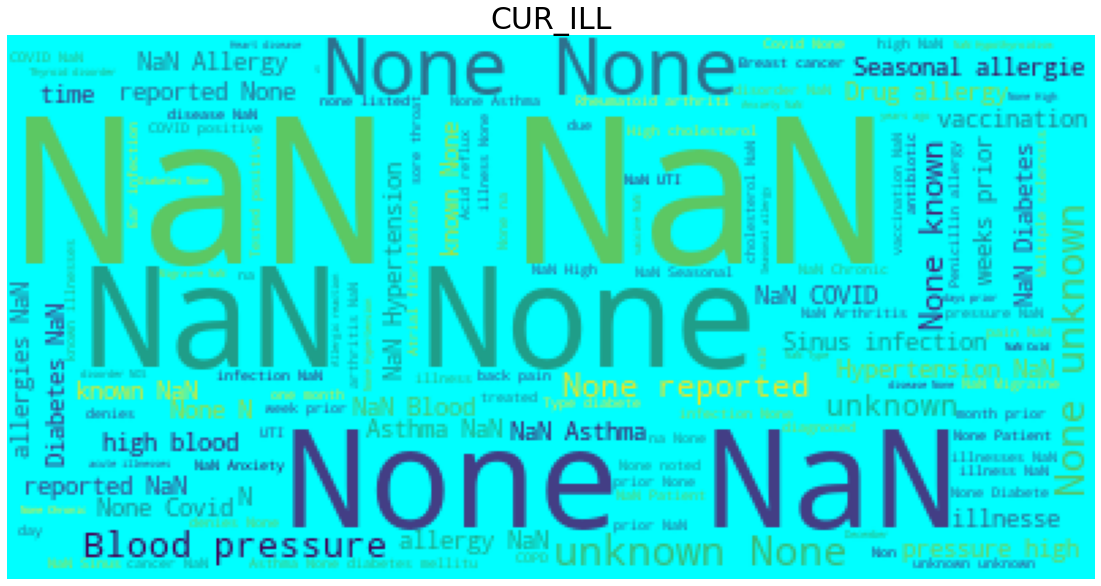

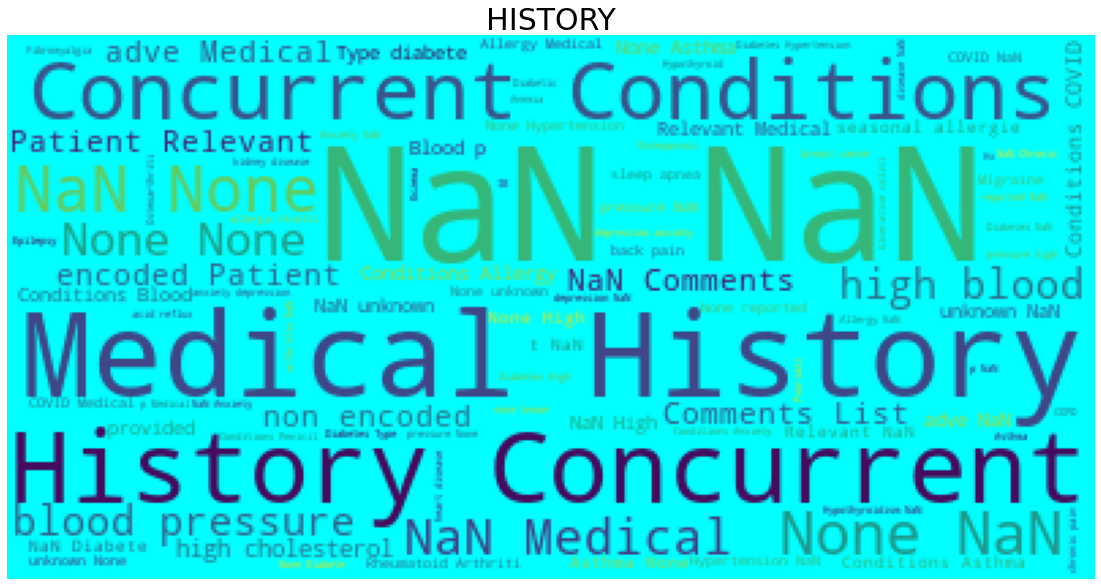

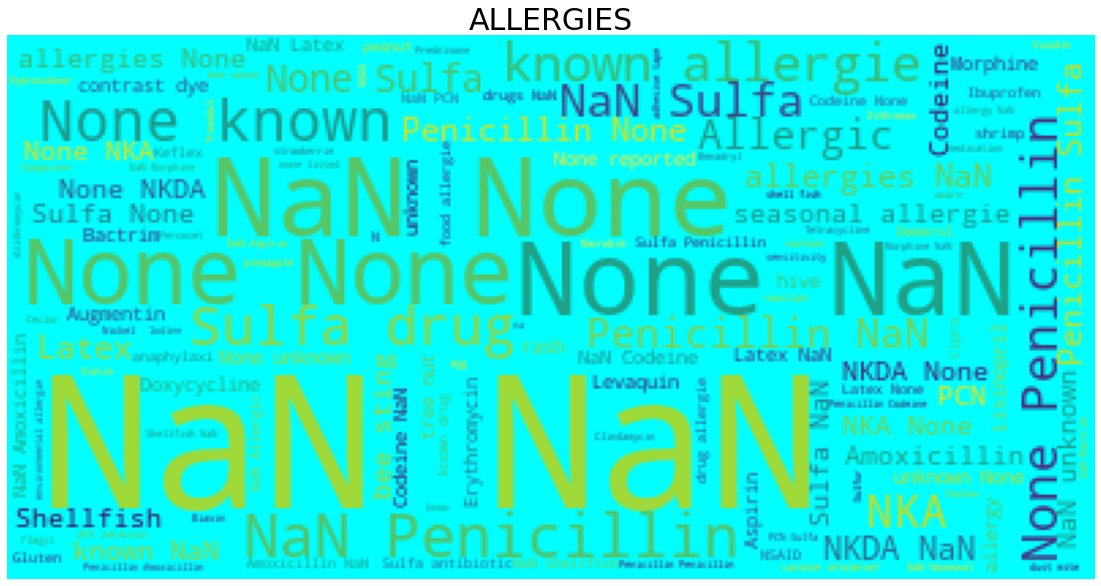

In [54]:
for i in pmc: 
    wc = WordCloud(background_color= 'cyan')
    wc.generate(str(df_v3[i]))
    plt.figure(figsize= (20,10))
    plt.title(i, fontsize= 30)
    plt.axis("off")
    plt.imshow(wc)
    plt.show()
    print("\n")

In [52]:
# Dropping columns - 'CUR_ILL', 'HISTORY', 'ALLERGIES':

df_v4 = df_v3.drop(columns= ['CUR_ILL', 'HISTORY', 'ALLERGIES', 'PRIOR_VAX'])
df_v4.head()

VAX_TYPE         VAX_MANU VAX_DOSE_SERIES STATE   AGE_YRS   CAGE_YR  \
VAERS_ID                                                                       
916600    COVID19          MODERNA               1    TX 33.000000 33.000000   
916601    COVID19          MODERNA               1    CA 73.000000 73.000000   
916602    COVID19  PFIZER\BIONTECH               1    WA 23.000000 23.000000   
916603    COVID19          MODERNA             UNK    WA 58.000000 58.000000   
916604    COVID19          MODERNA               1    TX 47.000000 47.000000   

         SEX RECOVD   VAX_DATE ONSET_DATE  NUMDAYS V_ADMINBY  \
VAERS_ID                                                       
916600     F      Y 2020-12-28 2020-12-30 2.000000       PVT   
916601     F      Y 2020-12-31 2020-12-31 0.000000       SEN   
916602     F      U 2020-12-31 2020-12-31 0.000000       SEN   
916603     F      Y 2020-12-23 2020-12-23 0.000000       WRK   
916604     F      N 2020-12-22 2020-12-29 7.000000       PUB   

             ADVERSE_EFFECT                          SYMPTOMS POST VACCINATION  
VAERS_ID                                                                        
916600         Clinic_Visit  Dysphagia, Epiglottitis, Not_Applicable, Not_A...  
916601         Clinic_Visit  Anxiety, Dyspnoea, Not_Applicable, Not_Applica...  
916602             ER_Visit  Chest discomfort, Dysphagia, Pain in extremity...  
916603    No_Adverse_Effect  Dizziness, Fatigue, Mobility decreased, Not_Ap...  
916604    No_Adverse_Effect  Injection site erythema, Injection site prurit...

In [53]:
df_v4.shape

(598526, 14)

### Missing Value Analysis & Treatment:

In [54]:
total =  df_v4.isnull().sum()
percent = (df_v4.isnull().sum() / len(df_v4)) * 100 

missing_df = pd.concat([total, percent], axis= 1, keys= ['Total', 'Percent'])
missing_df

Total   Percent
VAX_TYPE                       0  0.000000
VAX_MANU                       0  0.000000
VAX_DOSE_SERIES             3108  0.519276
STATE                      59405  9.925216
AGE_YRS                    33144  5.537604
CAGE_YR                    86734 14.491267
SEX                            0  0.000000
RECOVD                         0  0.000000
VAX_DATE                       0  0.000000
ONSET_DATE                 21505  3.592993
NUMDAYS                    32574  5.442370
V_ADMINBY                      0  0.000000
ADVERSE_EFFECT                 0  0.000000
SYMPTOMS POST VACCINATION      0  0.000000

### Replacing missing values in 'AGE_YRS' with corresponding values in 'CAGE_YR'

In [55]:
df_v4.AGE_YRS.isnull().sum()

33144

In [56]:
# Age in years (AGE_YRS): The recorded vaccine recipient's age in years.
# Age in years (CAGE_YR): Age of patient in years calculated by (vax_date-birthdate) 

# Since AGE_YRS alone is sufficient for analysis, we will be dropping the 'CAGE_YR' variable. 
# But, before that, we impute the missing values in 'AGE_YRS' variable with it's corresponding values in 'CAGE_YR', if present.


# Finding missing values in 'AGE_YRS' for those which has corrsponding values in 'CAGE_YRS': 

df_v4[(df_v4['AGE_YRS'].isnull()) & (~df_v4['CAGE_YR'].isnull())][['AGE_YRS', 'CAGE_YR']].head()

AGE_YRS   CAGE_YR
VAERS_ID                   
917916        NaN 66.000000
918107        NaN 71.000000
918152        NaN 74.000000
918159        NaN 17.000000
918163        NaN  2.000000

In [57]:
len(df_v4[(df_v4['AGE_YRS'].isnull()) & (~df_v4['CAGE_YR'].isnull())][['AGE_YRS', 'CAGE_YR']])

5625

In [58]:
df_v4['AGE_YRS'] = df_v4['AGE_YRS'].fillna(df_v4['CAGE_YR'])

In [59]:
len(df_v4[(df_v4['AGE_YRS'].isnull()) & (~df_v4['CAGE_YR'].isnull())][['AGE_YRS', 'CAGE_YR']])

0

In [60]:
df_v4.AGE_YRS.isnull().sum()

27519

In [61]:
# Dropping 'CAGE_YR' column:

df_v6 = df_v4.drop(columns= ['CAGE_YR'])
df_v6.head(3)

VAX_TYPE         VAX_MANU VAX_DOSE_SERIES STATE   AGE_YRS SEX RECOVD  \
VAERS_ID                                                                        
916600    COVID19          MODERNA               1    TX 33.000000   F      Y   
916601    COVID19          MODERNA               1    CA 73.000000   F      Y   
916602    COVID19  PFIZER\BIONTECH               1    WA 23.000000   F      U   

           VAX_DATE ONSET_DATE  NUMDAYS V_ADMINBY ADVERSE_EFFECT  \
VAERS_ID                                                           
916600   2020-12-28 2020-12-30 2.000000       PVT   Clinic_Visit   
916601   2020-12-31 2020-12-31 0.000000       SEN   Clinic_Visit   
916602   2020-12-31 2020-12-31 0.000000       SEN       ER_Visit   

                                  SYMPTOMS POST VACCINATION  
VAERS_ID                                                     
916600    Dysphagia, Epiglottitis, Not_Applicable, Not_A...  
916601    Anxiety, Dyspnoea, Not_Applicable, Not_Applica...  
916602    Chest discomfort, Dysphagia, Pain in extremity...

### Replacing ONSET_DATE lesser than VAX_DATE with VAX_DATE

In [62]:
len(df_v6[df_v6['ONSET_DATE'] < df_v6['VAX_DATE']][['VAX_DATE', 'ONSET_DATE']])

11069

In [63]:
df_v6[df_v6['ONSET_DATE'] < df_v6['VAX_DATE']][['VAX_DATE', 'ONSET_DATE']].head()

VAX_DATE ONSET_DATE
VAERS_ID                      
916673   2020-12-10 1920-12-10
916962   2020-12-28 2020-01-29
917085   2020-12-29 2020-12-01
918120   2020-11-16 2020-11-01
918125   2020-12-03 2020-12-01

In [64]:
df_v6.loc[(df_v6['ONSET_DATE'] < df_v6['VAX_DATE']), 'ONSET_DATE'] = df_v6['VAX_DATE']

In [65]:
len(df_v6[df_v6['ONSET_DATE'] < df_v6['VAX_DATE']][['VAX_DATE', 'ONSET_DATE']])

0

### Imputing Missing Values in 'NUMDAYS' based on 'VAX_DATE' & 'ONSET_DATE'

In [66]:
df_v6['NUMDAYS'].isnull().sum()

32574

In [67]:
len(df_v6[(df_v6['NUMDAYS'].isnull()) & (~df_v6['VAX_DATE'].isnull()) & (~df_v6['ONSET_DATE'].isnull())][['VAX_DATE', 'ONSET_DATE', 'NUMDAYS']])

11069

In [68]:
df_v6[(df_v6['NUMDAYS'].isnull()) & (~df_v6['VAX_DATE'].isnull()) & (~df_v6['ONSET_DATE'].isnull())][['VAX_DATE', 'ONSET_DATE', 'NUMDAYS']].head()

VAX_DATE ONSET_DATE  NUMDAYS
VAERS_ID                               
916673   2020-12-10 2020-12-10      NaN
916962   2020-12-28 2020-12-28      NaN
917085   2020-12-29 2020-12-29      NaN
918120   2020-11-16 2020-11-16      NaN
918125   2020-12-03 2020-12-03      NaN

In [69]:
df_v6['NUMDAYS'] = (df_v6['ONSET_DATE'] - df_v6['VAX_DATE']) / np.timedelta64(1, 'D')

In [70]:
len(df_v6[(df_v6['NUMDAYS'].isnull()) & (~df_v6['VAX_DATE'].isnull()) & (~df_v6['ONSET_DATE'].isnull())][['VAX_DATE', 'ONSET_DATE', 'NUMDAYS']])

0

In [71]:
df_v6['NUMDAYS'].isnull().sum()

21505

### Pre-Processing of variable - 'NUMDAYS'

In [72]:
# Renaming a column - 'NUMDAYS': 

df_v6.rename(columns = {'NUMDAYS': 'NUMDAYS BETWEEN VAX_DATE & ONSET_DATE'}, inplace = True)

In [73]:
# Checking the number of rows which have NUMDAYS BETWEEN VAX_DATE & ONSET_DATE greater than 365 days.

len(df_v6[df_v6['NUMDAYS BETWEEN VAX_DATE & ONSET_DATE']>365])

357

In [74]:
df_v6[df_v6['NUMDAYS BETWEEN VAX_DATE & ONSET_DATE']>365][['VAX_DATE', 'ONSET_DATE', 'NUMDAYS BETWEEN VAX_DATE & ONSET_DATE']].head()

VAX_DATE ONSET_DATE  NUMDAYS BETWEEN VAX_DATE & ONSET_DATE
VAERS_ID                                                             
917036   2019-12-23 2020-12-28                             371.000000
917643   2020-01-02 2021-01-02                             366.000000
917935   2020-01-02 2021-01-02                             366.000000
918107   2019-11-05 2020-11-05                             366.000000
918487   2020-01-02 2021-01-04                             368.000000

In [75]:
df_v6 = df_v6[~(df_v6['NUMDAYS BETWEEN VAX_DATE & ONSET_DATE']>365)]
df_v6.shape

(598169, 13)

In [76]:
# Dropping 'VAX_DATE' & 'ONSET_DATE' columns as we consider only the 'NUMDAYS BETWEEN VAX_DATE & ONSET_DATE' for analysis:

df_v7 = df_v6.drop(columns= ['VAX_DATE', 'ONSET_DATE'])
df_v7.head(3)

VAX_TYPE         VAX_MANU VAX_DOSE_SERIES STATE   AGE_YRS SEX RECOVD  \
VAERS_ID                                                                        
916600    COVID19          MODERNA               1    TX 33.000000   F      Y   
916601    COVID19          MODERNA               1    CA 73.000000   F      Y   
916602    COVID19  PFIZER\BIONTECH               1    WA 23.000000   F      U   

          NUMDAYS BETWEEN VAX_DATE & ONSET_DATE V_ADMINBY ADVERSE_EFFECT  \
VAERS_ID                                                                   
916600                                 2.000000       PVT   Clinic_Visit   
916601                                 0.000000       SEN   Clinic_Visit   
916602                                 0.000000       SEN       ER_Visit   

                                  SYMPTOMS POST VACCINATION  
VAERS_ID                                                     
916600    Dysphagia, Epiglottitis, Not_Applicable, Not_A...  
916601    Anxiety, Dyspnoea, Not_Applicable, Not_Applica...  
916602    Chest discomfort, Dysphagia, Pain in extremity...

In [77]:
total1 =  df_v7.isnull().sum()
percent1 = (df_v7.isnull().sum() / len(df_v7)) * 100 

missing_df1 = pd.concat([total1, percent1], axis= 1, keys= ['Total', 'Percent'])
missing_df1

Total  Percent
VAX_TYPE                                   0 0.000000
VAX_MANU                                   0 0.000000
VAX_DOSE_SERIES                         3108 0.519586
STATE                                  59348 9.921611
AGE_YRS                                27492 4.596026
SEX                                        0 0.000000
RECOVD                                     0 0.000000
NUMDAYS BETWEEN VAX_DATE & ONSET_DATE  21505 3.595138
V_ADMINBY                                  0 0.000000
ADVERSE_EFFECT                             0 0.000000
SYMPTOMS POST VACCINATION                  0 0.000000

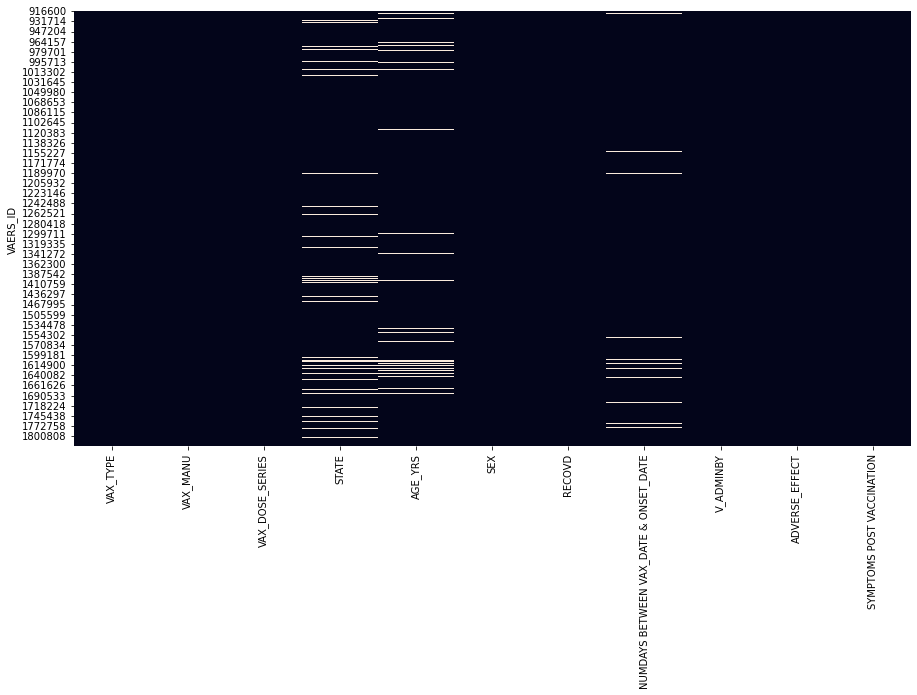

In [78]:
plt.figure(figsize=(15, 8))

sns.heatmap(df_v7.isnull(), cbar= False)
plt.show()

In [79]:
# Since the percentage of missing rows is less than 5% in the columns, Drop by row approach is done: 

df_pros = df_v7.dropna()
df_pros.shape 

(506232, 11)

In [80]:
print("The percentage of data reduction is:", ((len(df_v7) - len(df_pros)) / len(df_v7)) * 100,"\n")
print("The percentage of data remaining is:", 100 - (((len(df_v7) - len(df_pros)) / len(df_v7)) * 100))

The percentage of data reduction is: 15.369736646332392 

The percentage of data remaining is: 84.6302633536676


In [81]:
total2 =  df_pros.isnull().sum()
percent2 = (df_pros.isnull().sum() / len(df_pros)) * 100 

missing_treated = pd.concat([total2, percent2], axis= 1, keys= ['Total', 'Percent'])
missing_treated

Total  Percent
VAX_TYPE                                   0 0.000000
VAX_MANU                                   0 0.000000
VAX_DOSE_SERIES                            0 0.000000
STATE                                      0 0.000000
AGE_YRS                                    0 0.000000
SEX                                        0 0.000000
RECOVD                                     0 0.000000
NUMDAYS BETWEEN VAX_DATE & ONSET_DATE      0 0.000000
V_ADMINBY                                  0 0.000000
ADVERSE_EFFECT                             0 0.000000
SYMPTOMS POST VACCINATION                  0 0.000000

### Analysis of variable - 'AGE_YRS'

In [82]:
df_pros.loc[((df_pros['AGE_YRS'] >= 0) & (df_pros['AGE_YRS'] <= 12)), 'AGE_GROUP'] = 'Child'
df_pros.loc[((df_pros['AGE_YRS'] > 12) & (df_pros['AGE_YRS'] <= 18)), 'AGE_GROUP'] = 'Adolescent'
df_pros.loc[((df_pros['AGE_YRS'] > 18) & (df_pros['AGE_YRS'] <= 30)), 'AGE_GROUP'] = 'Young_Adult'
df_pros.loc[((df_pros['AGE_YRS'] > 30) & (df_pros['AGE_YRS'] <= 59)), 'AGE_GROUP'] = 'Senior_Adult'
df_pros.loc[df_pros['AGE_YRS'] > 59, 'AGE_GROUP'] = 'Senior_Citizen'

df_pros['AGE_GROUP'].value_counts()

Senior_Adult      246269
Senior_Citizen    166496
Young_Adult        64188
Adolescent         22493
Child               6786
Name: AGE_GROUP, dtype: int64

In [83]:
df_f1 = df_pros.drop(['AGE_YRS'], axis= 1)
df_f1.head(3)

VAX_TYPE         VAX_MANU VAX_DOSE_SERIES STATE SEX RECOVD  \
VAERS_ID                                                              
916600    COVID19          MODERNA               1    TX   F      Y   
916601    COVID19          MODERNA               1    CA   F      Y   
916602    COVID19  PFIZER\BIONTECH               1    WA   F      U   

          NUMDAYS BETWEEN VAX_DATE & ONSET_DATE V_ADMINBY ADVERSE_EFFECT  \
VAERS_ID                                                                   
916600                                 2.000000       PVT   Clinic_Visit   
916601                                 0.000000       SEN   Clinic_Visit   
916602                                 0.000000       SEN       ER_Visit   

                                  SYMPTOMS POST VACCINATION       AGE_GROUP  
VAERS_ID                                                                     
916600    Dysphagia, Epiglottitis, Not_Applicable, Not_A...    Senior_Adult  
916601    Anxiety, Dyspnoea, Not_Applicable, Not_Applica...  Senior_Citizen  
916602    Chest discomfort, Dysphagia, Pain in extremity...     Young_Adult

In [84]:
# changing column order: 

df_final = df_f1.iloc[:, [0,1,2,3,4,10,7,9,6,5,8]]
df_final.head()

VAX_TYPE         VAX_MANU VAX_DOSE_SERIES STATE SEX       AGE_GROUP  \
VAERS_ID                                                                       
916600    COVID19          MODERNA               1    TX   F    Senior_Adult   
916601    COVID19          MODERNA               1    CA   F  Senior_Citizen   
916602    COVID19  PFIZER\BIONTECH               1    WA   F     Young_Adult   
916603    COVID19          MODERNA             UNK    WA   F    Senior_Adult   
916604    COVID19          MODERNA               1    TX   F    Senior_Adult   

         V_ADMINBY                          SYMPTOMS POST VACCINATION  \
VAERS_ID                                                                
916600         PVT  Dysphagia, Epiglottitis, Not_Applicable, Not_A...   
916601         SEN  Anxiety, Dyspnoea, Not_Applicable, Not_Applica...   
916602         SEN  Chest discomfort, Dysphagia, Pain in extremity...   
916603         WRK  Dizziness, Fatigue, Mobility decreased, Not_Ap...   
916604         PUB  Injection site erythema, Injection site prurit...   

          NUMDAYS BETWEEN VAX_DATE & ONSET_DATE RECOVD     ADVERSE_EFFECT  
VAERS_ID                                                                   
916600                                 2.000000      Y       Clinic_Visit  
916601                                 0.000000      Y       Clinic_Visit  
916602                                 0.000000      U           ER_Visit  
916603                                 0.000000      Y  No_Adverse_Effect  
916604                                 7.000000      N  No_Adverse_Effect

### UniVariate Analysis

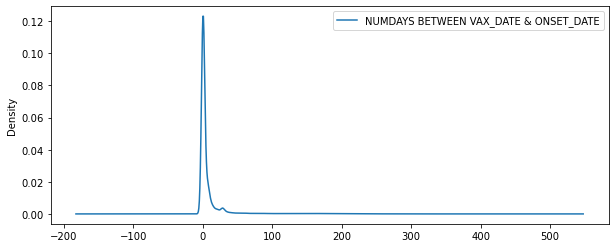

In [85]:
# Numerical features: 

df_num = df_final.select_dtypes(include= np.number)
df_num.plot(kind= 'kde', figsize= (10,4))
plt.show()

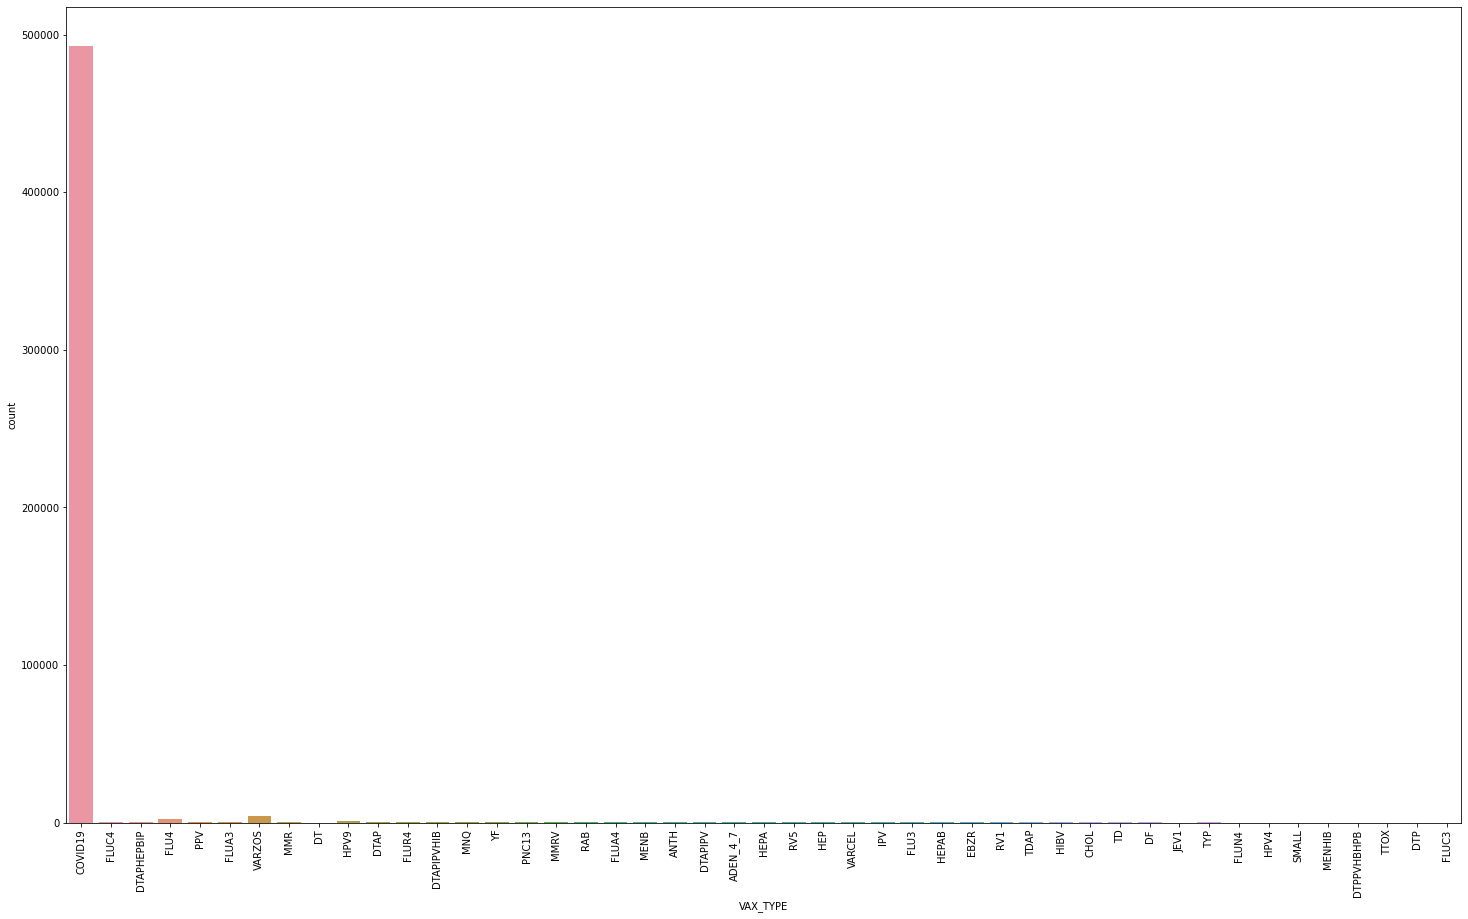

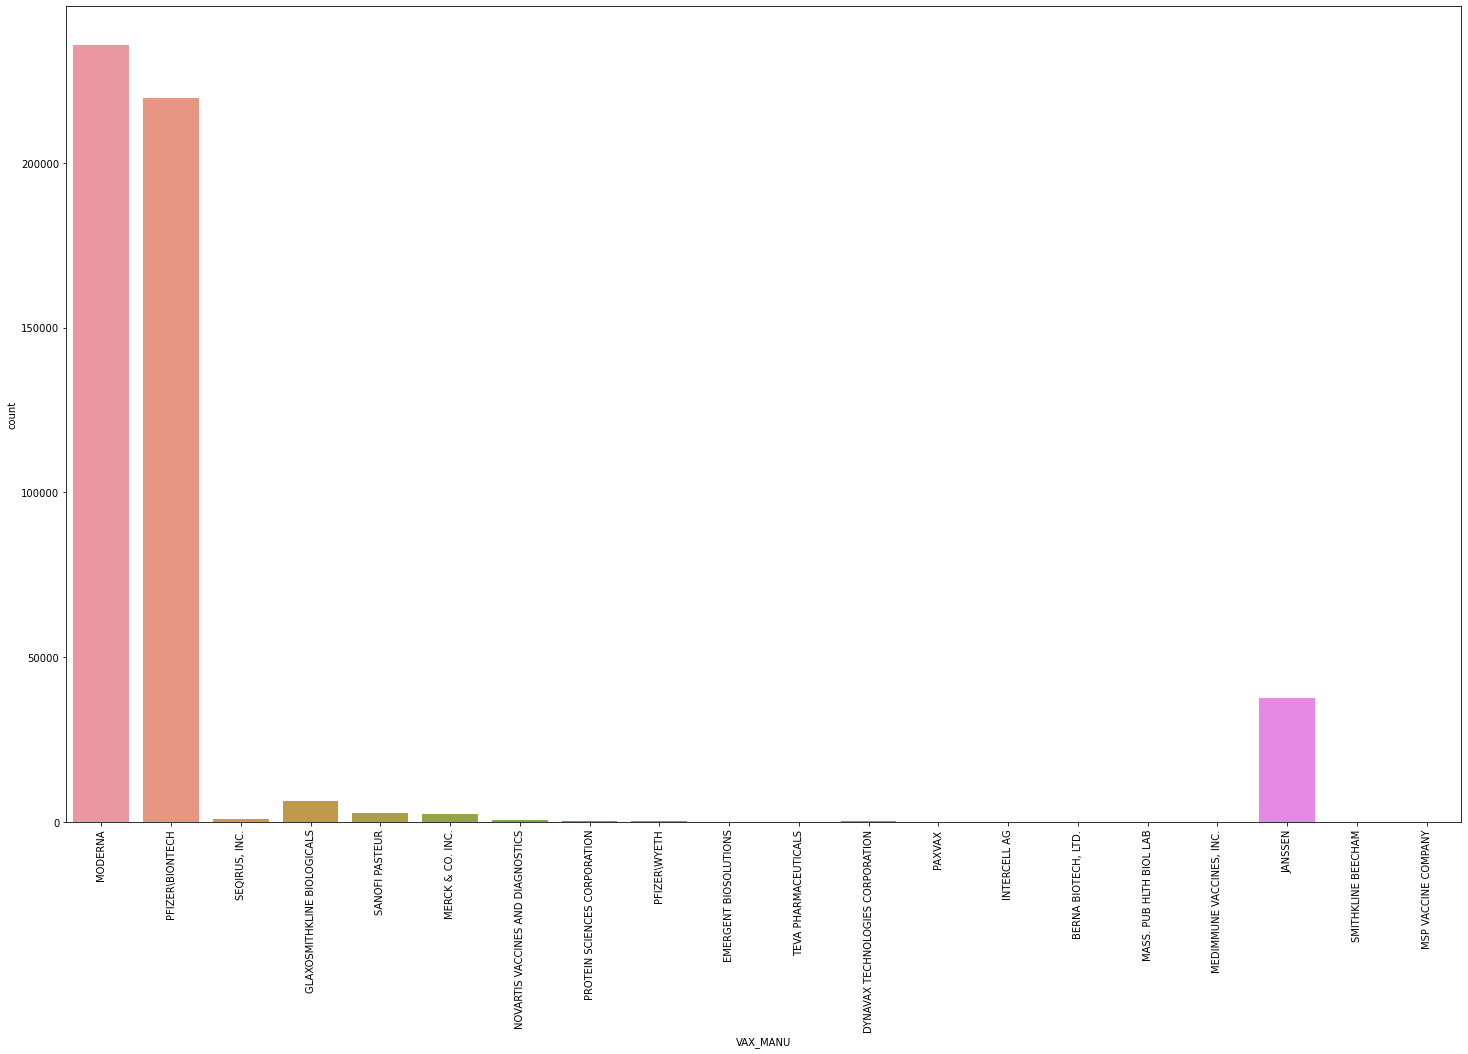

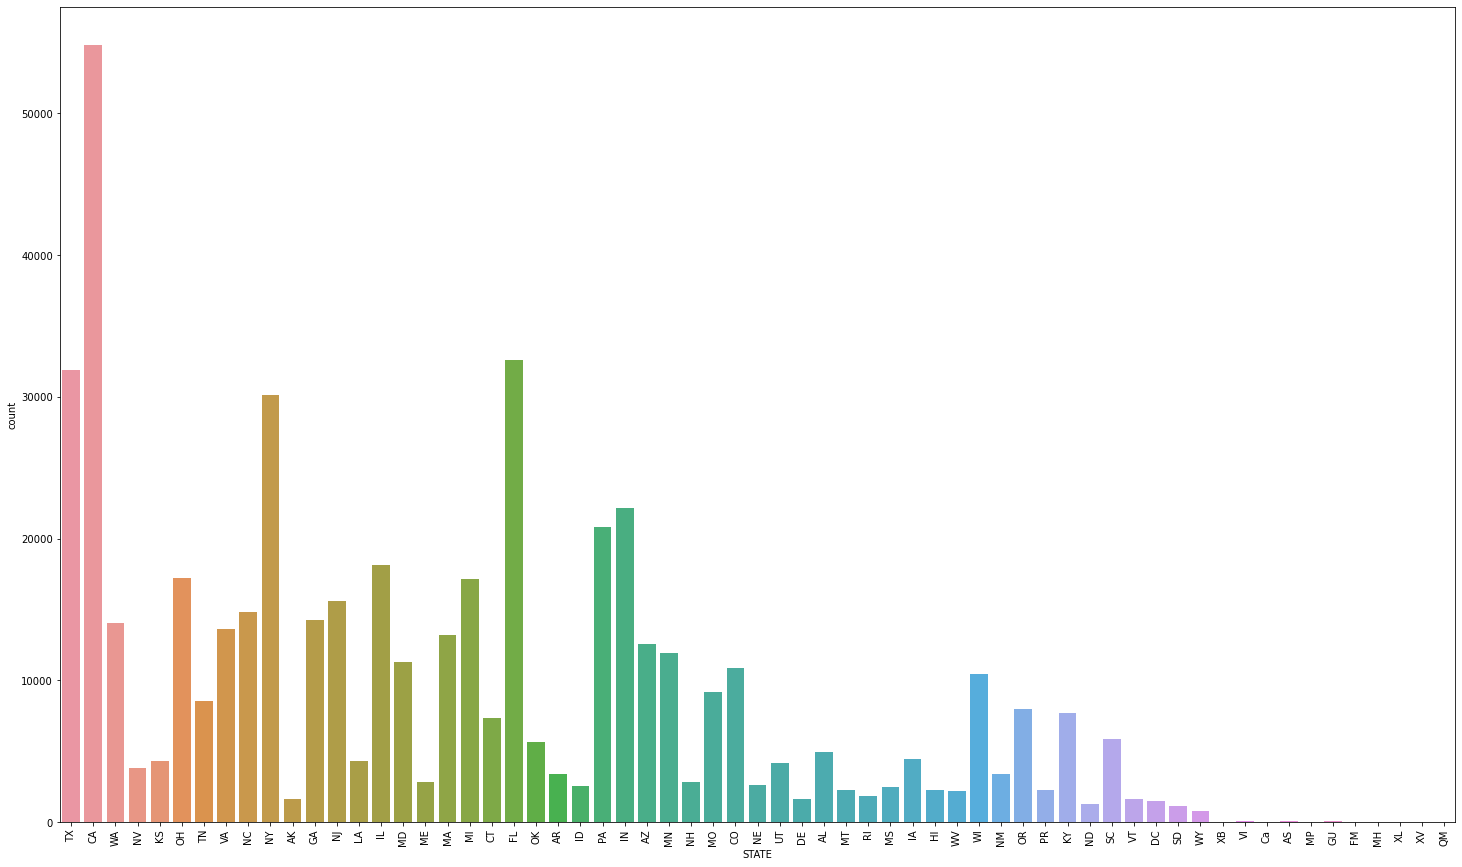

In [89]:
# Categorical features:

col= ['VAX_TYPE', 'VAX_MANU', 'STATE']

for i in col:
    plt.figure(figsize= (25,15))
    sns.countplot(x= df_final[i])
    plt.xticks(rotation= 90)
    plt.show()

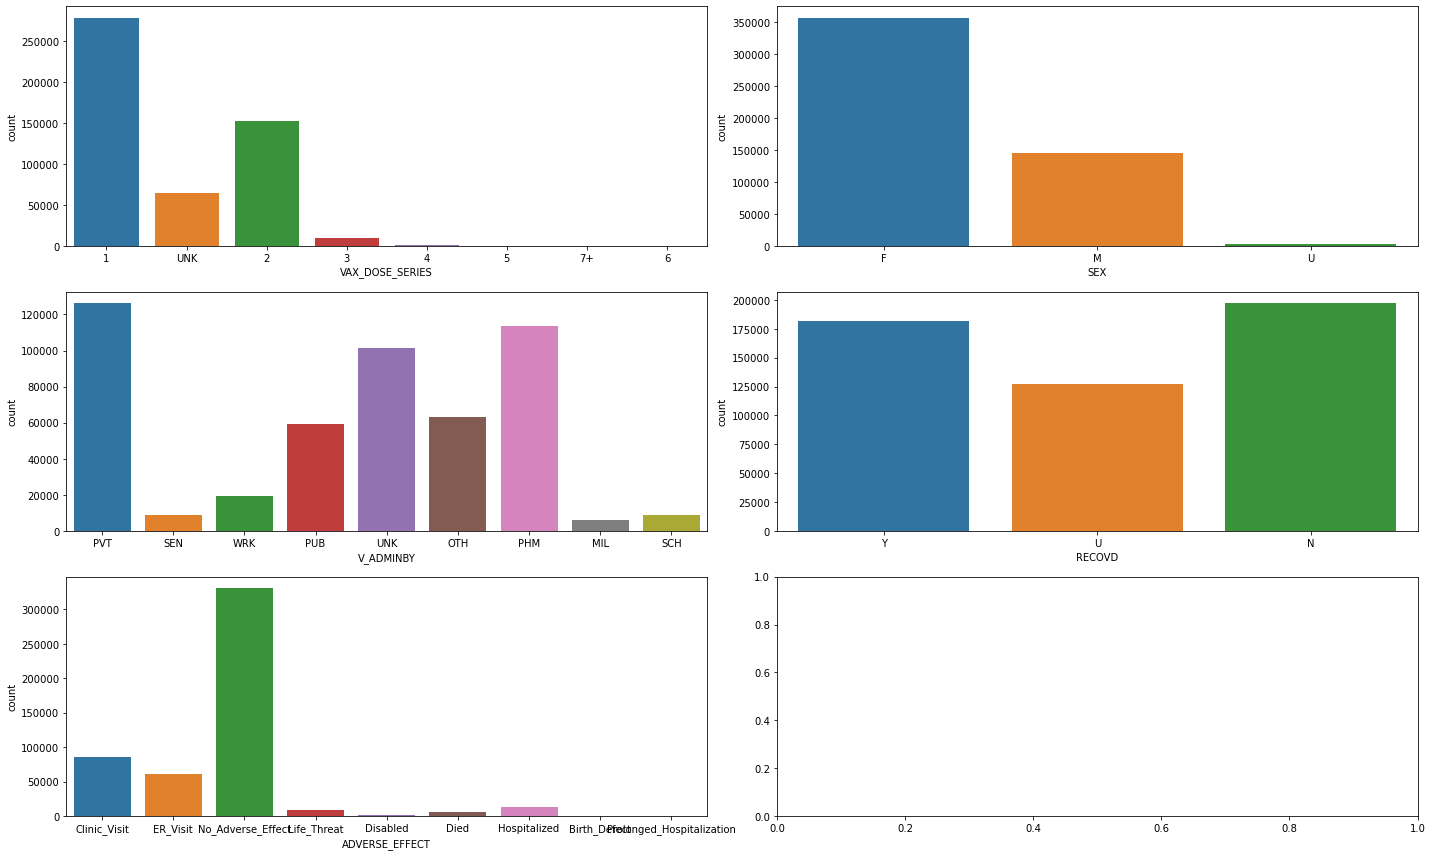

In [90]:
# Categorical features:

fig, ax= plt.subplots(3,2,figsize= (20,12))

col= ['VAX_DOSE_SERIES', 'SEX', 'V_ADMINBY', 'RECOVD', 'ADVERSE_EFFECT']

for i,subplot in zip(col,ax.flatten()): 
    sns.countplot(x= df_final[i], ax= subplot)
    plt.tight_layout()

## BiVariate Analysis

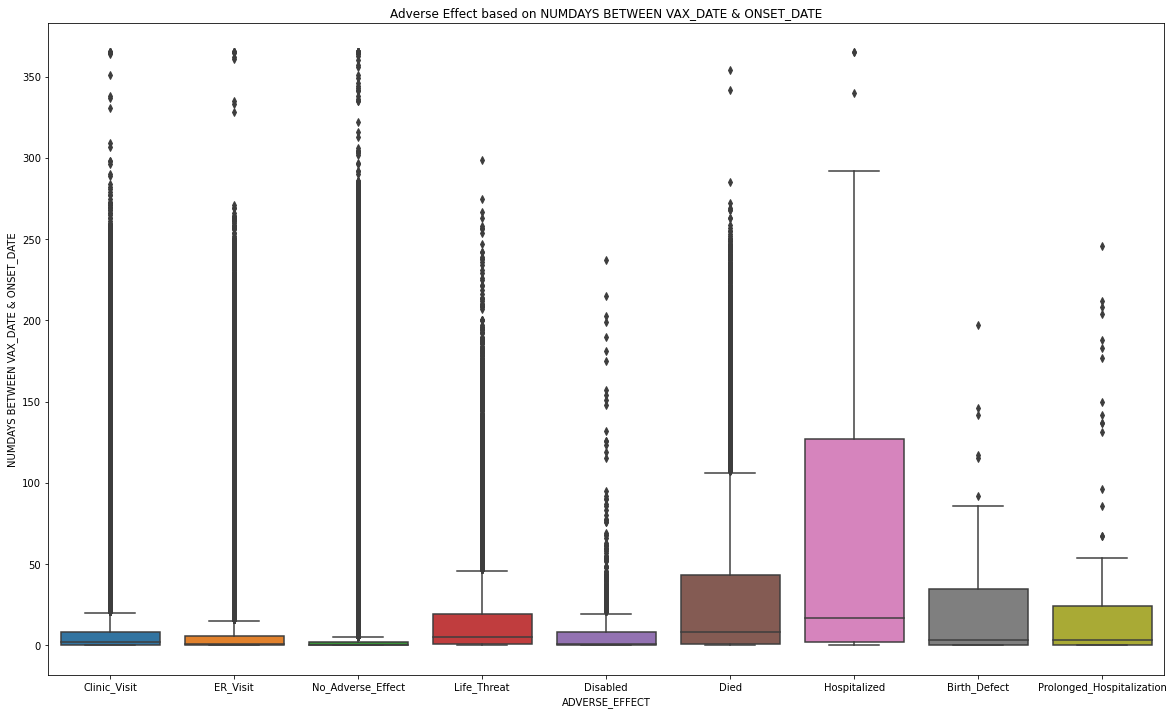

In [91]:
# Numerical Variables: 

plt.figure(figsize= (20,12))
sns.boxplot(y= df_final['NUMDAYS BETWEEN VAX_DATE & ONSET_DATE'], x= df_final['ADVERSE_EFFECT'])
plt.title('Adverse Effect based on NUMDAYS BETWEEN VAX_DATE & ONSET_DATE')
plt.show()

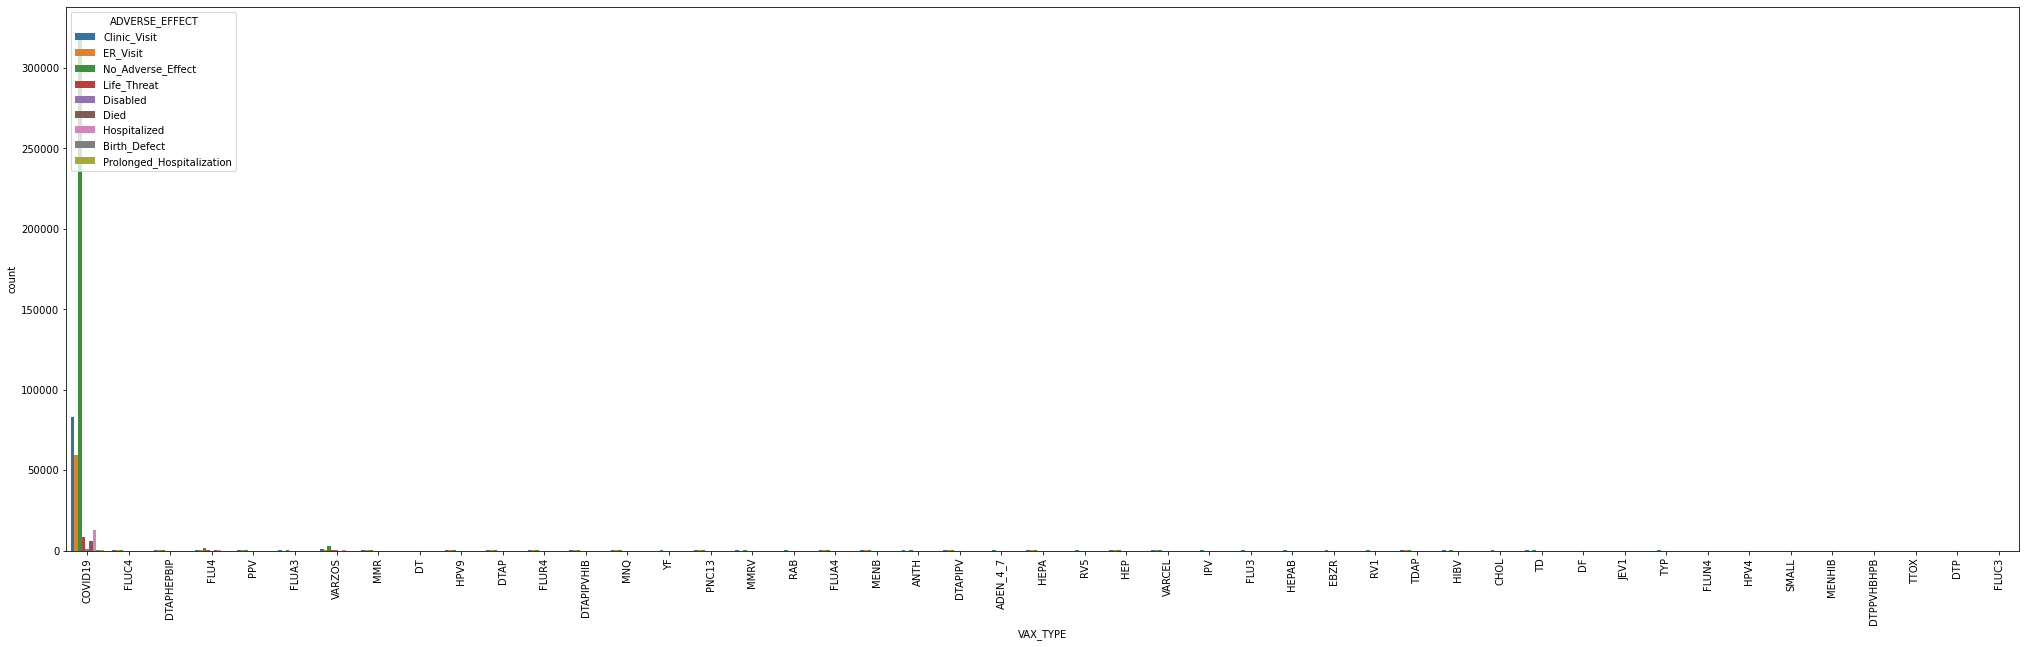

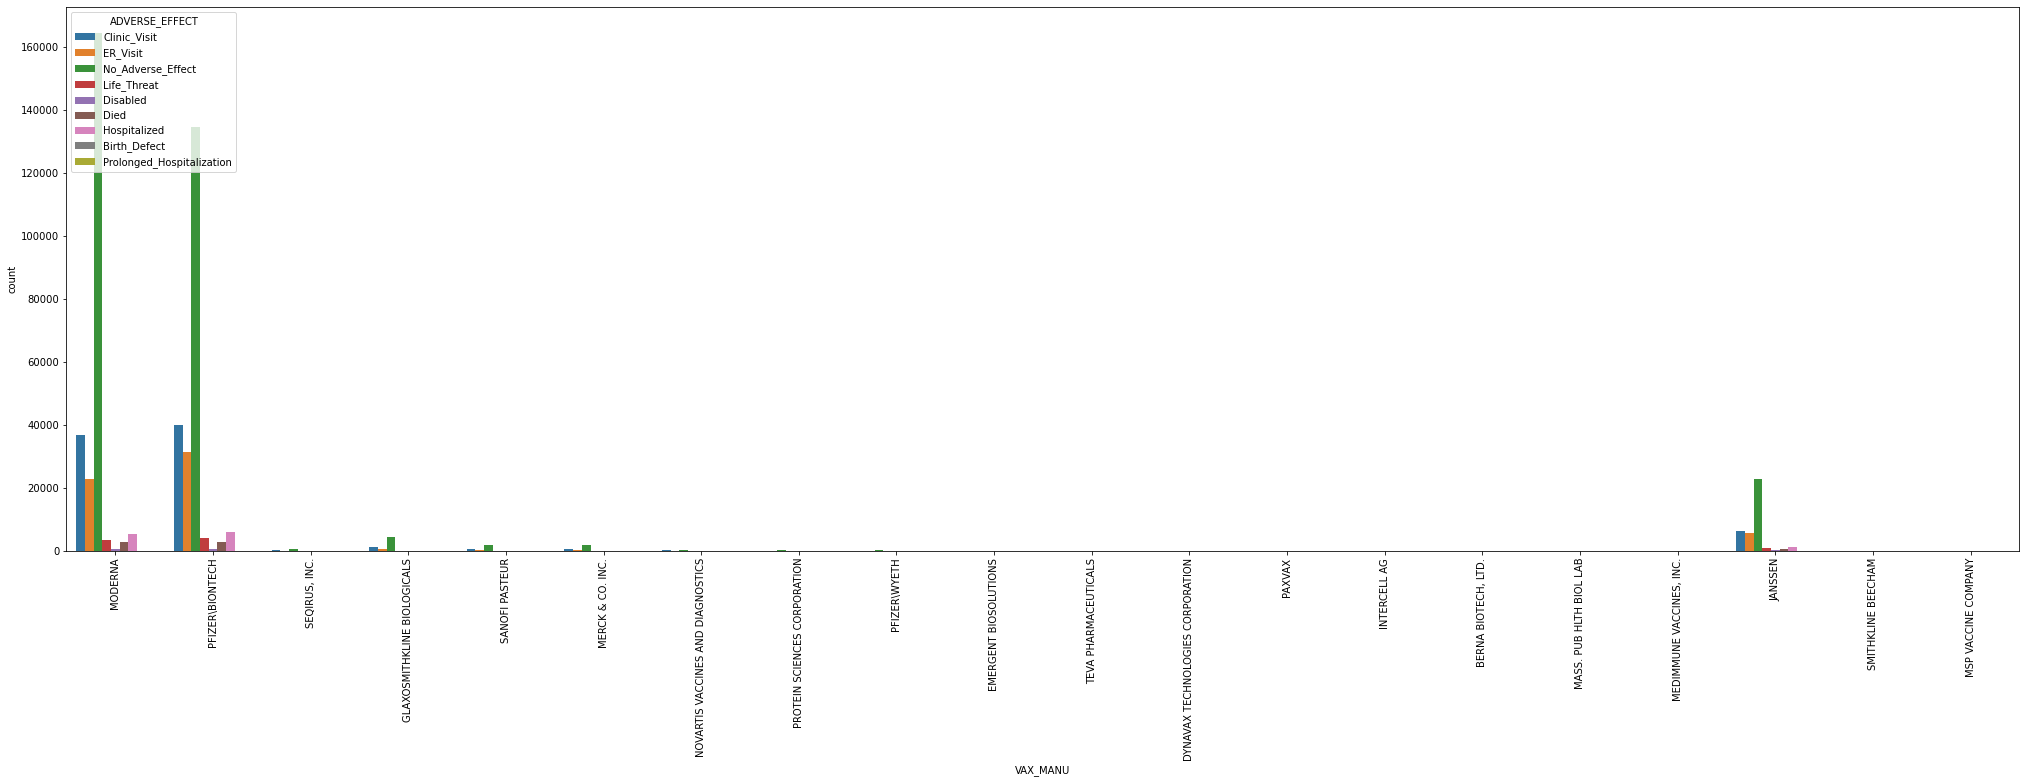

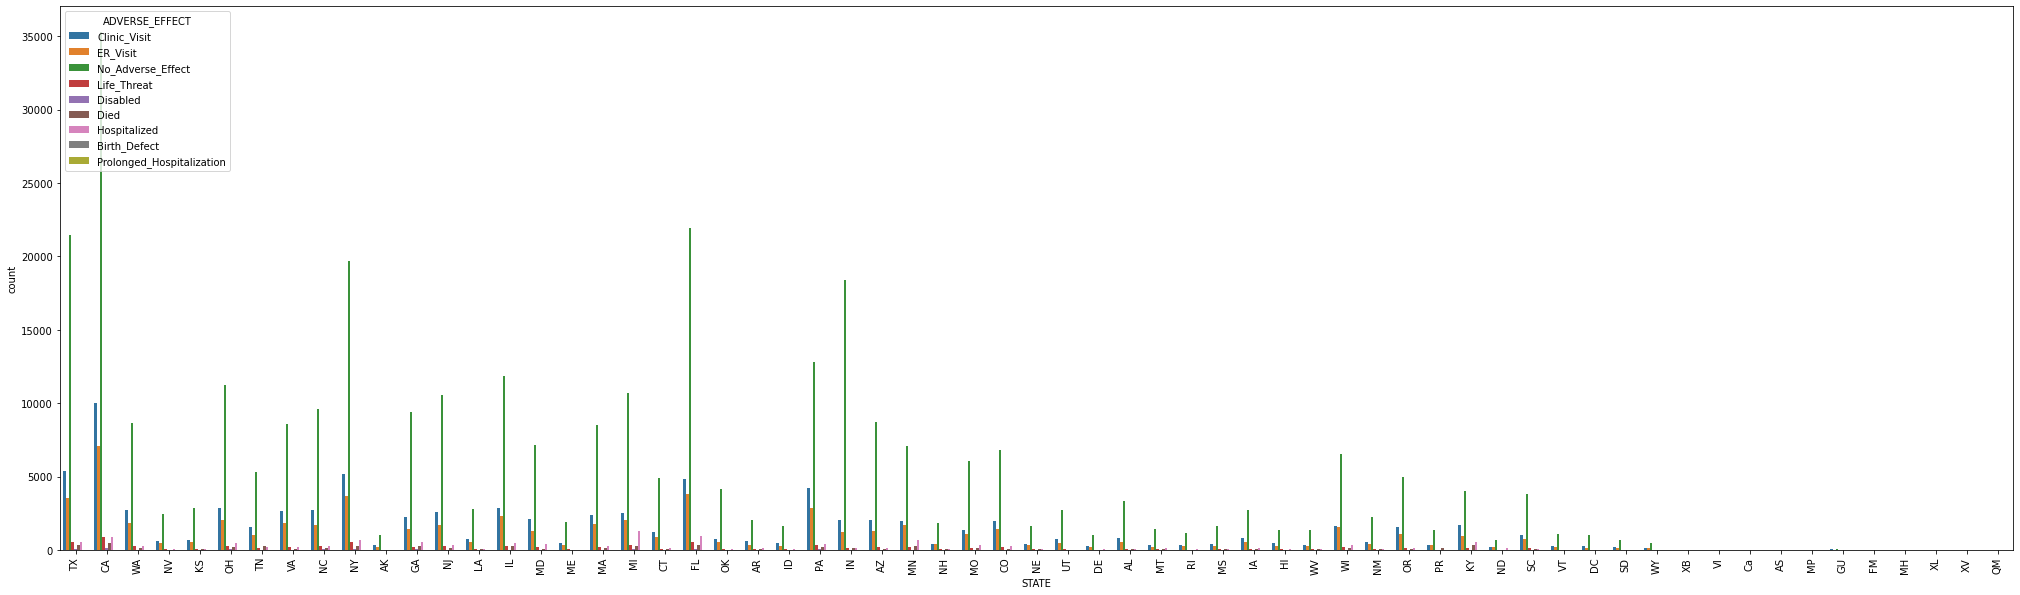

In [92]:
# Categorical features:

col1= ['VAX_TYPE', 'VAX_MANU', 'STATE']

for i in col1: 
    plt.figure(figsize=(35,10))
    sns.countplot(x= df_final[i], hue= df_final['ADVERSE_EFFECT'])
    plt.xticks(rotation= 90)
    plt.show()

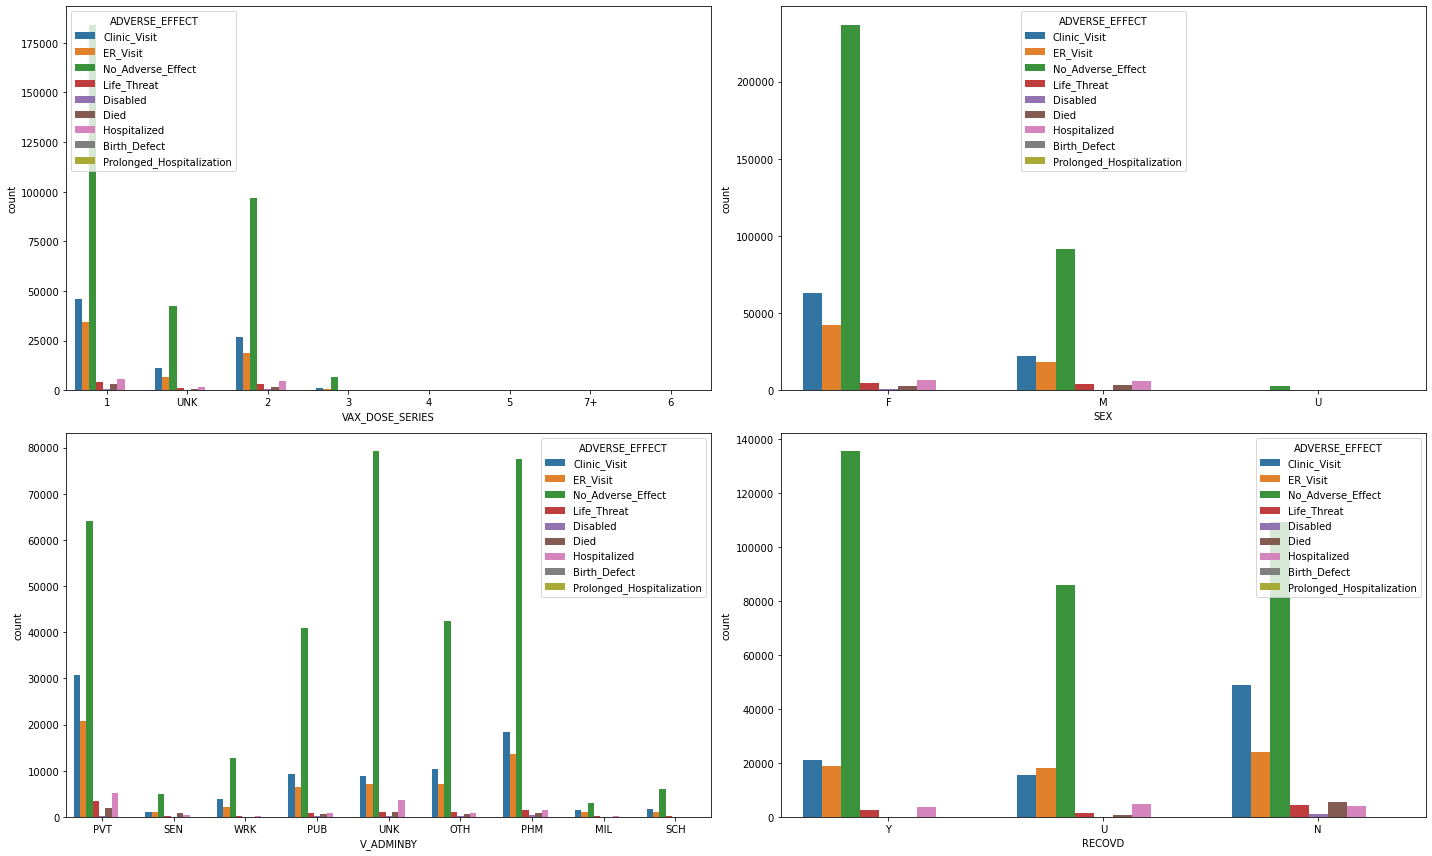

In [93]:
# Categorical features


fig, ax= plt.subplots(2,2,figsize= (20,12))

col2= ['VAX_DOSE_SERIES', 'SEX', 'V_ADMINBY', 'RECOVD']

for i,subplot in zip(col2,ax.flatten()): 
    sns.countplot(x= df_final[i], hue= df_final['ADVERSE_EFFECT'], ax= subplot)
    plt.tight_layout()

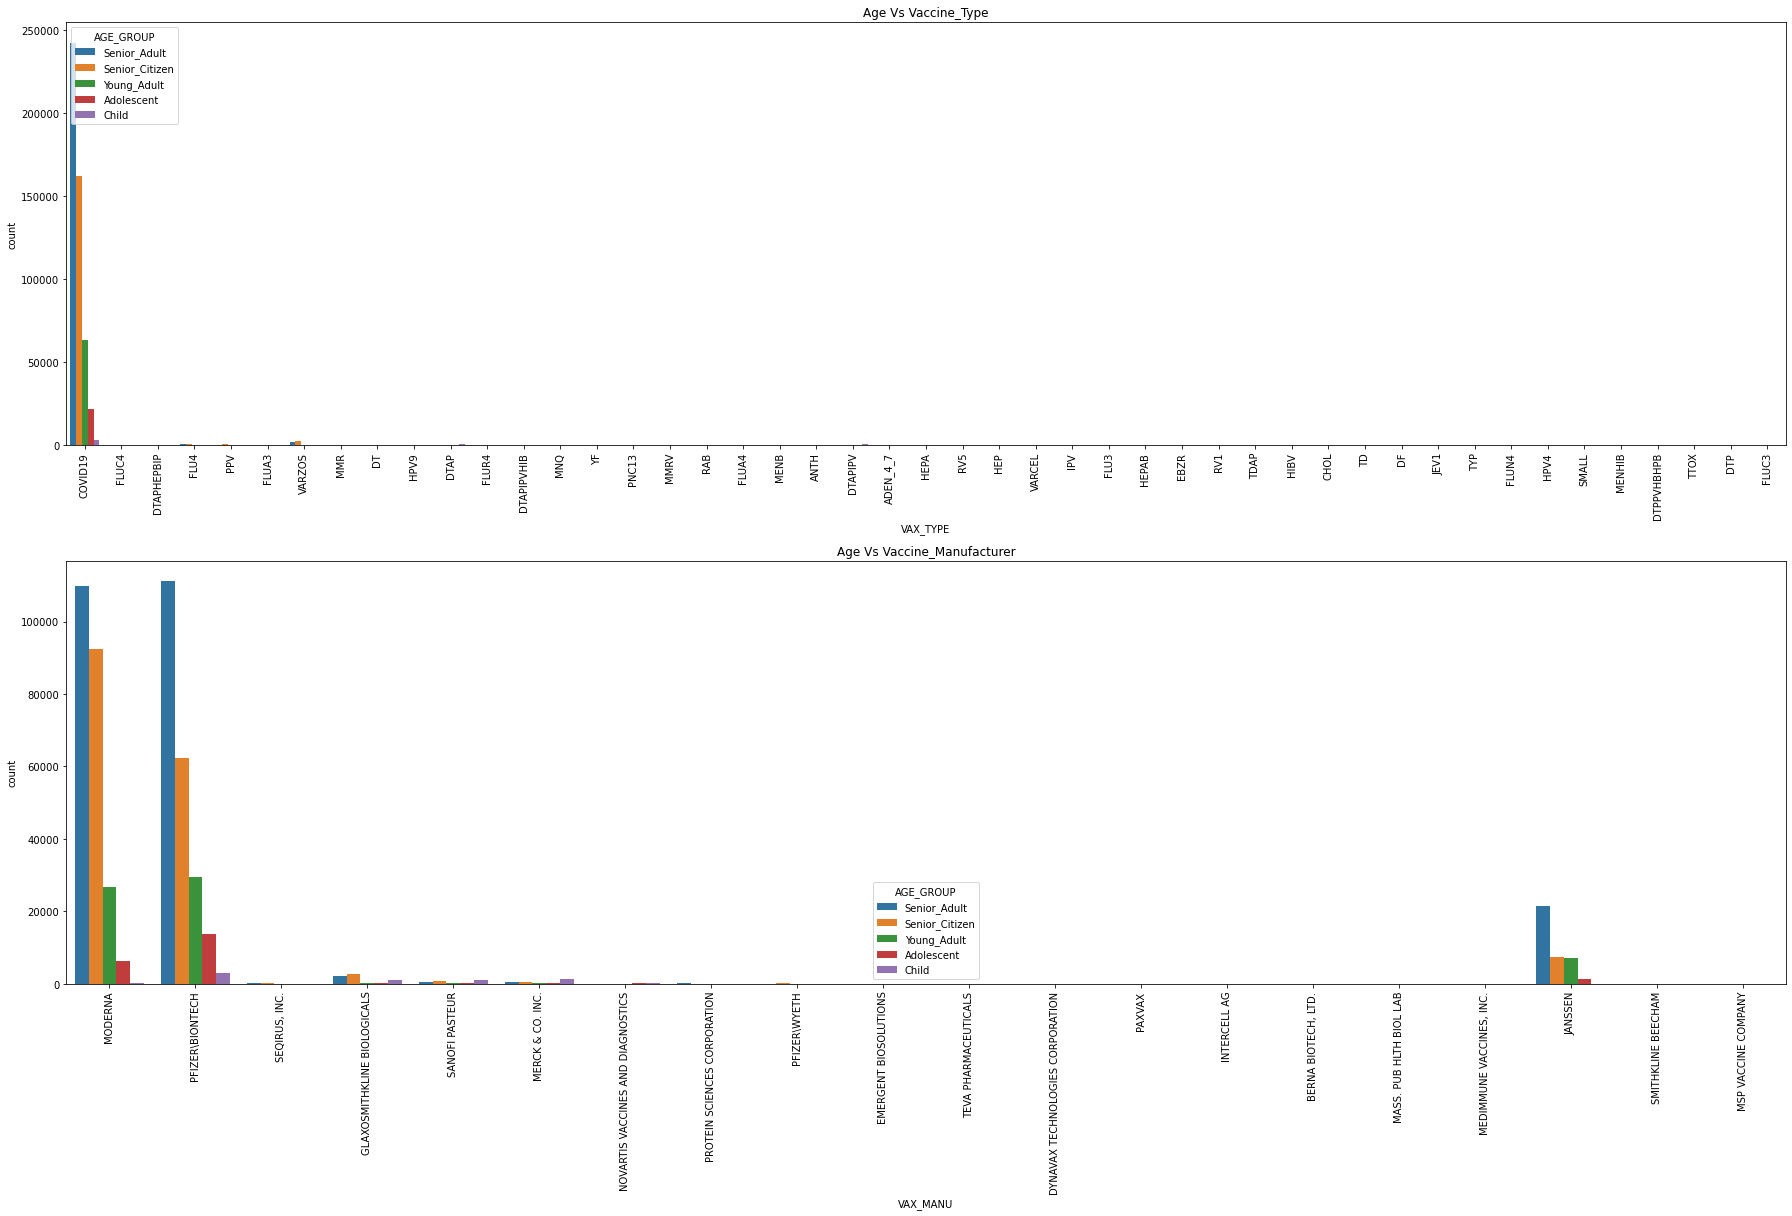

In [94]:
plt.figure(figsize=(25,17))
plt.subplot(2,1,1)
sns.countplot(x= df_final['VAX_TYPE'], hue= df_final['AGE_GROUP'])
plt.xticks(rotation= 90)
plt.title('Age Vs Vaccine_Type')

plt.subplot(2,1,2)
sns.countplot(x= df_final['VAX_MANU'], hue= df_final['AGE_GROUP'])
plt.xticks(rotation= 90)
plt.title('Age Vs Vaccine_Manufacturer')

plt.tight_layout()

In [95]:
tab= (pd.crosstab(df_final['SEX'], df_final['V_ADMINBY']) / df_final['V_ADMINBY'].value_counts()) * 100
tab.reset_index()

SEX       MIL       OTH       PHM       PUB       PVT       SCH       SEN  \
0   F 50.338639 70.089683 67.633046 71.038795 72.348827 72.922765 74.678363   
1   M 49.339655 29.573210 31.784138 28.622468 27.367896 26.818284 25.146199   
2   U  0.321707  0.337107  0.582816  0.338737  0.283277  0.258951  0.175439   

        UNK       WRK  
0 70.519992 78.596400  
1 27.800961 21.095747  
2  1.679047  0.307853

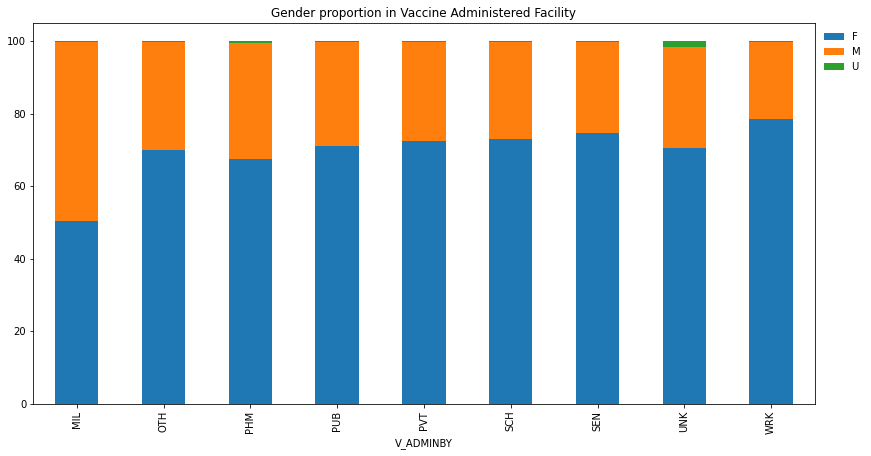

In [96]:
(tab.T).plot(kind= 'bar', stacked= True, figsize= (14,7))
plt.legend(framealpha= 0.01, bbox_to_anchor= (1,0,0,1))
plt.xlabel('V_ADMINBY')
plt.title('Gender proportion in Vaccine Administered Facility')
plt.show()

In [97]:
tab1= (pd.crosstab(df_final['SEX'], df_final['VAX_TYPE']) / df_final['VAX_TYPE'].value_counts()) * 100
tab1.reset_index()

SEX  ADEN_4_7      ANTH      CHOL   COVID19        DF        DT      DTAP  \
0   F 73.333333 33.333333 66.666667 70.763940 62.500000 71.428571 51.785714   
1   M 26.666667 64.705882 23.809524 28.708372 37.500000 28.571429 46.205357   
2   U  0.000000  1.960784  9.523810  0.527688  0.000000  0.000000  2.008929   

   DTAPHEPBIP   DTAPIPV  DTAPIPVHIB        DTP  DTPPVHBHPB      EBZR  \
0   46.564885 47.120419   52.559727 100.000000    0.000000 74.285714   
1   52.290076 51.308901   45.392491   0.000000  100.000000 25.714286   
2    1.145038  1.570681    2.047782   0.000000    0.000000  0.000000   

       FLU3      FLU4     FLUA3     FLUA4      FLUC3     FLUC4     FLUN4  \
0 73.684211 67.242230 62.068966 66.789668 100.000000 70.925110 90.909091   
1 26.315789 32.165762 37.931034 32.841328   0.000000 28.634361  9.090909   
2  0.000000  0.592008  0.000000  0.369004   0.000000  0.440529  0.000000   

      FLUR4       HEP      HEPA     HEPAB      HIBV      HPV4      HPV9  \
0 67.605634 57.038835 38.392857 50.980392 42.937853 83.333333 57.099237   
1 31.924883 31.310680 41.741071 49.019608 46.892655 16.666667 34.045802   
2  0.469484 11.650485 19.866071  0.000000 10.169492  0.000000  8.854962   

        IPV      JEV1      MENB     MENHIB       MMR      MMRV       MNQ  \
0 57.500000 60.000000 62.574850 100.000000 41.581633 30.000000 50.953678   
1 42.500000 40.000000 36.227545   0.000000 30.867347 27.826087 48.228883   
2  0.000000  0.000000  1.197605   0.000000 27.551020 42.173913  0.817439   

      PNC13       PPV       RAB       RV1       RV5     SMALL        TD  \
0 71.345029 70.481928 76.744186 62.962963 27.450980 62.500000 57.812500   
1 27.485380 24.899598 23.255814 37.037037 28.431373 37.500000 42.187500   
2  1.169591  4.618474  0.000000  0.000000 44.117647  0.000000  0.000000   

       TDAP       TTOX       TYP    VARCEL    VARZOS        YF  
0 72.000000 100.000000 46.000000 47.637795 69.534828 55.555556  
1 28.000000   0.000000 28.000000 25.590551 29.669800 44.444444  
2  0.000000   0.000000 26.000000 26.771654  0.795372  0.000000

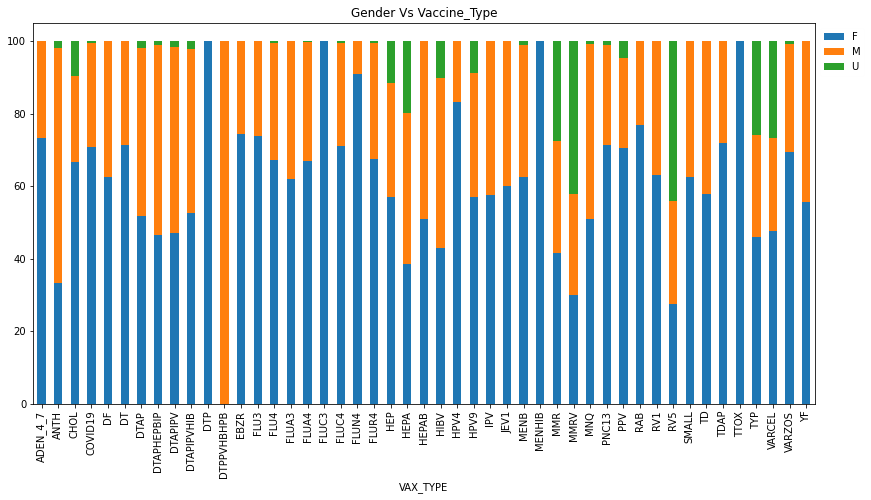

In [98]:
(tab1.T).plot(kind= 'bar', stacked= True, figsize= (14,7))
plt.legend(framealpha= 0.01, bbox_to_anchor= (1,0,0,1))
plt.xlabel('VAX_TYPE')
plt.title('Gender Vs Vaccine_Type')
plt.show()

In [99]:
tab2= (pd.crosstab(df_final['V_ADMINBY'], df_final['VAX_TYPE']) / df_final['VAX_TYPE'].value_counts()) * 100
tab2.reset_index()

V_ADMINBY  ADEN_4_7      ANTH      CHOL   COVID19        DF        DT  \
0       MIL  0.000000 66.666667  0.000000  1.152149  0.000000 14.285714   
1       OTH 10.000000  9.803922 28.571429 12.659437 18.750000 28.571429   
2       PHM 23.333333  3.921569 14.285714 22.250332 25.000000  0.000000   
3       PUB 16.666667  1.960784  4.761905 11.907366 18.750000 28.571429   
4       PVT 23.333333 13.725490 42.857143 24.723020 18.750000 28.571429   
5       SCH 10.000000  0.000000  4.761905  1.783508  0.000000  0.000000   
6       SEN  0.000000  0.000000  0.000000  1.721021  0.000000  0.000000   
7       UNK 10.000000  3.921569  4.761905 19.963076  6.250000  0.000000   
8       WRK  6.666667  0.000000  0.000000  3.840091 12.500000  0.000000   

       DTAP  DTAPHEPBIP   DTAPIPV  DTAPIPVHIB        DTP  DTPPVHBHPB  \
0  1.785714    1.526718  1.570681    0.000000   0.000000    0.000000   
1  2.008929    0.763359  3.141361    0.682594   0.000000    0.000000   
2  2.455357    0.763359  0.261780    0.000000   0.000000    0.000000   
3  9.821429   11.068702 13.612565    5.802048   0.000000    0.000000   
4 55.357143   66.412214 59.162304   56.996587 100.000000  100.000000   
5  0.446429    0.381679  0.523560    0.000000   0.000000    0.000000   
6  0.000000    0.000000  0.000000    0.000000   0.000000    0.000000   
7 27.008929   19.083969 21.204188   36.177474   0.000000    0.000000   
8  1.116071    0.000000  0.523560    0.341297   0.000000    0.000000   

       EBZR      FLU3      FLU4     FLUA3     FLUA4      FLUC3     FLUC4  \
0  0.000000  0.000000  2.022694  1.724138  0.000000   0.000000  1.321586   
1 20.000000  0.000000  3.650715  0.000000  1.845018 100.000000  5.726872   
2  8.571429  0.000000 42.377898 63.793103 73.431734   0.000000 59.471366   
3  8.571429  0.000000  4.242723  3.448276  3.690037   0.000000  2.643172   
4 22.857143 10.526316 27.528367 15.517241 13.653137   0.000000 20.264317   
5  0.000000  0.000000  1.085348  1.724138  0.369004   0.000000  1.321586   
6  2.857143  0.000000  2.664036  1.724138  1.476015   0.000000  0.881057   
7 28.571429 89.473684 11.790824 12.068966  2.952030   0.000000  2.202643   
8  8.571429  0.000000  4.637395  0.000000  2.583026   0.000000  6.167401   

      FLUN4     FLUR4       HEP      HEPA     HEPAB      HIBV      HPV4  \
0  0.000000  0.000000  2.184466  1.785714 15.686275  1.129944  0.000000   
1  0.000000  4.225352 16.990291  4.464286  5.882353  0.564972  0.000000   
2  9.090909 46.009390  8.252427  2.455357 17.647059  0.000000  0.000000   
3  9.090909  0.938967 10.679612 10.491071  5.882353  5.084746 16.666667   
4 63.636364 22.065728 31.796117 41.517857  7.843137 33.333333 33.333333   
5  0.000000  0.469484  1.941748  0.669643  0.000000  0.000000  0.000000   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7 18.181818 22.065728 23.058252 38.392857 47.058824 59.887006 50.000000   
8  0.000000  4.225352  5.097087  0.223214  0.000000  0.000000  0.000000   

       HPV9       IPV      JEV1      MENB     MENHIB       MMR      MMRV  \
0  1.526718  1.250000 40.000000  0.598802   0.000000  2.295918  0.869565   
1  3.053435  0.000000  0.000000  1.497006 100.000000  3.316327  6.521739   
2  4.580153  0.000000 40.000000  4.790419   0.000000  7.908163  0.869565   
3 11.297710 12.500000  0.000000  4.491018   0.000000  8.163265  5.652174   
4 56.030534 28.750000 20.000000 70.059880   0.000000 38.520408 28.695652   
5  2.290076  0.000000  0.000000  2.694611   0.000000  0.255102  0.434783   
6  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
7 20.763359 57.500000  0.000000 15.868263   0.000000 36.224490 56.956522   
8  0.458015  0.000000  0.000000  0.000000   0.000000  3.316327  0.000000   

        MNQ     PNC13       PPV       RAB       RV1       RV5     SMALL  \
0  1.634877  1.169591  1.204819  0.000000  3.703704  0.000000  0.000000   
1  1.907357  3.508772  3.212851 13.953488  0.000000  4.901961 37.500000   
2  7.084469 27.485380 38.755020 

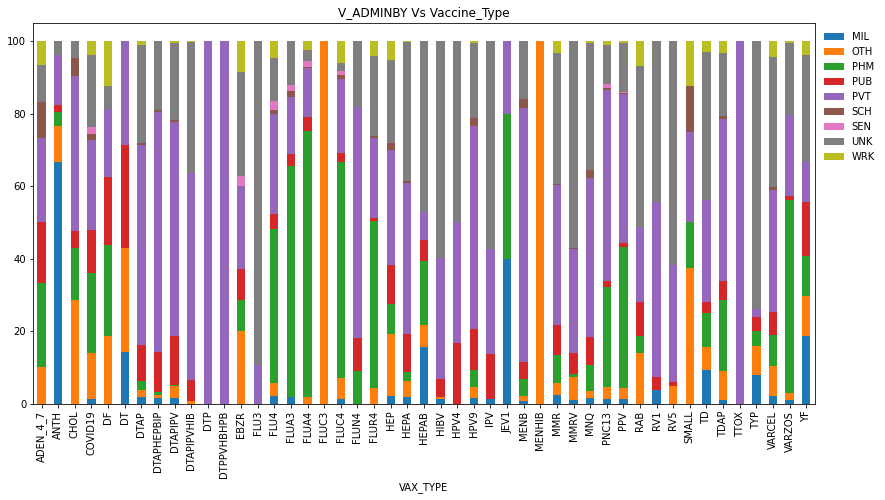

In [100]:
(tab2.T).plot(kind= 'bar', stacked= True, figsize= (14,7))
plt.legend(framealpha= 0.01, bbox_to_anchor= (1,0,0,1))
plt.xlabel('VAX_TYPE')
plt.title('V_ADMINBY Vs Vaccine_Type')
plt.show()

### Outlier Analysis:

In [101]:
iqr = df_final['NUMDAYS BETWEEN VAX_DATE & ONSET_DATE'].quantile(0.75) - df_final['NUMDAYS BETWEEN VAX_DATE & ONSET_DATE'].quantile(0.25)
print("IQR of NUMDAYS BETWEEN VAX_DATE & ONSET_DATE: ", iqr)

ub = df_final['NUMDAYS BETWEEN VAX_DATE & ONSET_DATE'].quantile(0.75) + (1.5*iqr)
lb = df_final['NUMDAYS BETWEEN VAX_DATE & ONSET_DATE'].quantile(0.25) - (1.5*iqr)

print("Upper bound: ", ub,"\nLower bound: ", lb)
print("Number of outliers in NUMDATY BETWEEN VAX_DATE & ONSET_DATE is:", len(df_final[((df_final['NUMDAYS BETWEEN VAX_DATE & ONSET_DATE'] > ub) | (df_final['NUMDAYS BETWEEN VAX_DATE & ONSET_DATE'] < lb))]), "\n")

IQR of NUMDAYS BETWEEN VAX_DATE & ONSET_DATE:  5.0
Upper bound:  12.5 
Lower bound:  -7.5
Number of outliers in NUMDATY BETWEEN VAX_DATE & ONSET_DATE is: 65762 



### Statistical Significance of Variables:

In [102]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506232 entries, 916600 to 1828453
Data columns (total 11 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   VAX_TYPE                               506232 non-null  object 
 1   VAX_MANU                               506232 non-null  object 
 2   VAX_DOSE_SERIES                        506232 non-null  object 
 3   STATE                                  506232 non-null  object 
 4   SEX                                    506232 non-null  object 
 5   AGE_GROUP                              506232 non-null  object 
 6   V_ADMINBY                              506232 non-null  object 
 7   SYMPTOMS POST VACCINATION              506232 non-null  object 
 8   NUMDAYS BETWEEN VAX_DATE & ONSET_DATE  506232 non-null  float64
 9   RECOVD                                 506232 non-null  object 
 10  ADVERSE_EFFECT                         506232 non-

### Chi-Square Test for Independence

In [103]:
# Checking Statistical significance of independent categorical variables with Target: 

for i in df_final[['VAX_TYPE', 'VAX_MANU', 'VAX_DOSE_SERIES', 'STATE', 'AGE_GROUP', 'SEX', 'V_ADMINBY', 'SYMPTOMS POST VACCINATION', 'RECOVD']]: 
    
    print("\033[1m" + "Hypothesis Formation:" + "\033[0m")
    print("Null Hypothesis (Ho):",i,"and ADVERSE_EFFECT are independent")
    print("Alternate Hypothesis (Ha):",i,"and ADVERSE_EFFECT are dependent")
    print()
    
    obs = pd.crosstab(df_final[i], df_final['ADVERSE_EFFECT']) 
    test_stat, pval, dof, exp = stats.chi2_contingency(obs)
    print("\033[1m" + "Statistical Significance of relationship between",i,"and ADVERSE_EFFECT:" + "\033[0m") 
    print("Test Statistics: ", test_stat)
    print("pValue: ", pval) 
    print("Degrees of freedom: ", dof)
    print()
    
    print("\033[1m" + "Inference:" + "\033[0m") 
    if pval < 0.05:
        print("Probability value (pValue) is less than 0.05.") 
        print("Null Hypothesis (Ho) is rejected and Alternate Hypothesis (Ha) can be selected.")
        print("Thus the independent categorical feature",i,"has significant relationship with the target 'ADVERSE_EFFECT'.") 
    elif pval >= 0.05:
              print("Probability value (pValue) is greater than 0.05.")
              print("Null Hypothesis (Ho) is selected.")
              print("Hence, the independent categorical feature",i,"has no significant relationship with the target 'ADVERSE_EFFECT'.") 
    
    print("\n***************************************************************************************************\n")

Hypothesis Formation:
Null Hypothesis (Ho): VAX_TYPE and ADVERSE_EFFECT are independent
Alternate Hypothesis (Ha): VAX_TYPE and ADVERSE_EFFECT are dependent

Statistical Significance of relationship between VAX_TYPE and ADVERSE_EFFECT:
Test Statistics:  1260.708211487321
pValue:  4.266145430018866e-98
Degrees of freedom:  368

Inference:
Probability value (pValue) is less than 0.05.
Null Hypothesis (Ho) is rejected and Alternate Hypothesis (Ha) can be selected.
Thus the independent categorical feature VAX_TYPE has significant relationship with the target 'ADVERSE_EFFECT'.

***************************************************************************************************

Hypothesis Formation:
Null Hypothesis (Ho): VAX_MANU and ADVERSE_EFFECT are independent
Alternate Hypothesis (Ha): VAX_MANU and ADVERSE_EFFECT are dependent

Statistical Significance of relationship between VAX_MANU and ADVERSE_EFFECT:
Test Statistics:  5670.715653074373
pValue:  0.0
Degrees of freedom:  152

Inferenc

### One-way ANOVA

##### 'NUMDAYS BETWEEN VAX_DATE & ONSET_DATE'      Vs      'ADVERSE_EFFECT'

In [104]:
# Checking Statistical significance of independent continuous variables with Target: 

df_final['ADVERSE_EFFECT'].value_counts()

No_Adverse_Effect            330938
Clinic_Visit                  85631
ER_Visit                      60752
Hospitalized                  12706
Life_Threat                    8634
Died                           6129
Disabled                       1244
Prolonged_Hospitalization       124
Birth_Defect                     74
Name: ADVERSE_EFFECT, dtype: int64

In [105]:
AE_died = df_final[df_final['ADVERSE_EFFECT'] == 'Died']['NUMDAYS BETWEEN VAX_DATE & ONSET_DATE']
AE_lt = df_final[df_final['ADVERSE_EFFECT'] == 'Life_Threat']['NUMDAYS BETWEEN VAX_DATE & ONSET_DATE']
AE_er = df_final[df_final['ADVERSE_EFFECT'] == 'ER_Visit']['NUMDAYS BETWEEN VAX_DATE & ONSET_DATE']
AE_ph = df_final[df_final['ADVERSE_EFFECT'] == 'Prolonged_Hospitalization']['NUMDAYS BETWEEN VAX_DATE & ONSET_DATE']
AE_h = df_final[df_final['ADVERSE_EFFECT'] == 'Hospitalized']['NUMDAYS BETWEEN VAX_DATE & ONSET_DATE']
AE_cv = df_final[df_final['ADVERSE_EFFECT'] == 'Clinic_Visit']['NUMDAYS BETWEEN VAX_DATE & ONSET_DATE']
AE_dis = df_final[df_final['ADVERSE_EFFECT'] == 'Disabled']['NUMDAYS BETWEEN VAX_DATE & ONSET_DATE']
AE_bd = df_final[df_final['ADVERSE_EFFECT'] == 'Birth_Defect']['NUMDAYS BETWEEN VAX_DATE & ONSET_DATE']
No_AE = df_final[df_final['ADVERSE_EFFECT'] == 'No_Adverse_Effect']['NUMDAYS BETWEEN VAX_DATE & ONSET_DATE']

In [106]:
# Test of Normality 

# Ho: skew = 0
# Ha: skew != 0

print("Shapiro result for AE_died:",stats.shapiro(AE_died))
print("Shapiro result for AE_lt:",stats.shapiro(AE_lt))
print("Shapiro result for AE_er:",stats.shapiro(AE_er))
print("Shapiro result for AE_ph:",stats.shapiro(AE_ph))
print("Shapiro result for AE_h:",stats.shapiro(AE_h)) 
print("Shapiro result for AE_cv",stats.shapiro(AE_cv)) 
print("Shapiro result for AE_dis:",stats.shapiro(AE_dis)) 
print("Shapiro result for AE_bd:",stats.shapiro(AE_bd)) 
print("Shapiro result for No_AE:",stats.shapiro(No_AE)) 


# pvalue of Sapiro Result for scores of different adverse effects > 0.05 (sig. lvl)
# Hence, Ho is selected and so data is normal 




# Test for equality of variance 

# Ho: All variances are equal
# Ha: Atleast one variance is different 

print()
print(stats.levene(AE_died, AE_lt, AE_er, AE_ph, AE_h, AE_cv, AE_dis, AE_bd, No_AE)) 

# pvalue of Levene Result for scores of different adverse effects > 0.05 (sig. lvl) 
# Hence, Ho is selected and so all variances are equal. 



# Hypothesis for Anova: 

# Ho: All means are equal
# Ha: Atleast one mean is different


# Conditions for Anova: 
# 1) Data is normal 
# 2) Data has equal variance 

# Hence, one - way ANOVA can be applied. 


print()
stats.f_oneway(AE_died, AE_lt, AE_er, AE_ph, AE_h, AE_cv, AE_dis, AE_bd, No_AE)

Shapiro result for AE_died: ShapiroResult(statistic=0.6701347827911377, pvalue=0.0)
Shapiro result for AE_lt: ShapiroResult(statistic=0.5640700459480286, pvalue=0.0)
Shapiro result for AE_er: ShapiroResult(statistic=0.3938310146331787, pvalue=0.0)
Shapiro result for AE_ph: ShapiroResult(statistic=0.551127016544342, pvalue=8.416305479556553e-18)
Shapiro result for AE_h: ShapiroResult(statistic=0.7741583585739136, pvalue=0.0)
Shapiro result for AE_cv ShapiroResult(statistic=0.419678270816803, pvalue=0.0)
Shapiro result for AE_dis: ShapiroResult(statistic=0.4419770836830139, pvalue=0.0)
Shapiro result for AE_bd: ShapiroResult(statistic=0.6759912967681885, pvalue=1.705835646348408e-11)
Shapiro result for No_AE: ShapiroResult(statistic=0.24479520320892334, pvalue=0.0)

LeveneResult(statistic=6483.535657700273, pvalue=0.0)



F_onewayResult(statistic=7043.951607361831, pvalue=0.0)

### Class Imbalance Treatment

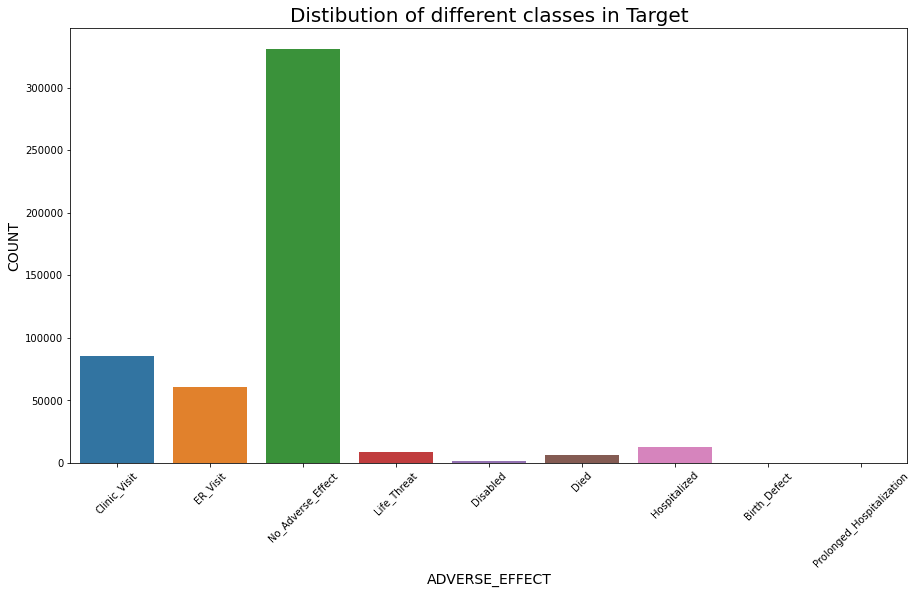

In [86]:
plt.figure(figsize= (15,8))
sns.countplot(df_final['ADVERSE_EFFECT'])
plt.xticks(rotation= 45)
plt.xlabel('ADVERSE_EFFECT', fontsize= 14)
plt.ylabel('COUNT', fontsize= 14) 
plt.title("Distibution of different classes in Target", fontsize= 20)
plt.show()

In [87]:
z = pd.DataFrame({'Count': df_final['ADVERSE_EFFECT'].value_counts()})
z.sort_values(by= 'Count', ascending= False)

Count
No_Adverse_Effect          330938
Clinic_Visit                85631
ER_Visit                    60752
Hospitalized                12706
Life_Threat                  8634
Died                         6129
Disabled                     1244
Prolonged_Hospitalization     124
Birth_Defect                   74

#### Down-sample Majority Classes

In [88]:
df_final.shape

(506232, 11)

In [89]:
# Separate majority and minority classes
df_minority = df_final.loc[(df_final['ADVERSE_EFFECT'] != 'No_Adverse_Effect') & (df_final['ADVERSE_EFFECT'] != 'Clinic_Visit')]

cls = ['No_Adverse_Effect', 'Clinic_Visit']

for i in cls:
    df_majority = df_final[df_final['ADVERSE_EFFECT'] == i]
 
    # Upsample minority class
    df_majority_downsampled = resample(df_majority, 
                                       replace= True,     # sample with replacement
                                       n_samples= 60752,    # to match majority class
                                       random_state= 1) # reproducible results
 
    # Combine majority class with upsampled minority class
    df_downsampled = pd.concat([df_majority_downsampled, df_minority])
    df_minority = df_downsampled


df_downsampled['ADVERSE_EFFECT'].value_counts()

Clinic_Visit                 60752
No_Adverse_Effect            60752
ER_Visit                     60752
Hospitalized                 12706
Life_Threat                   8634
Died                          6129
Disabled                      1244
Prolonged_Hospitalization      124
Birth_Defect                    74
Name: ADVERSE_EFFECT, dtype: int64

In [90]:
df_downsampled.shape

(211167, 11)

#### Up-sample Minority Classes

In [91]:
# Separate majority and minority classes
df_majority = df_downsampled.loc[(df_downsampled['ADVERSE_EFFECT'] == 'No_Adverse_Effect') | (df_downsampled['ADVERSE_EFFECT'] == 'Clinic_Visit')]

cls = ['ER_Visit', 'Hospitalized', 'Life_Threat', 'Died', 'Disabled', 'Prolonged_Hospitalization', 'Birth_Defect']

for i in cls:
    df_minority = df_downsampled[df_downsampled['ADVERSE_EFFECT'] == i]
 
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace= True,     # sample with replacement
                                     n_samples= 60752,    # to match majority class
                                     random_state= 1) # reproducible results
 
    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled])
    df_majority = df_upsampled


df_upsampled['ADVERSE_EFFECT'].value_counts()

Clinic_Visit                 60752
No_Adverse_Effect            60752
ER_Visit                     60752
Hospitalized                 60752
Life_Threat                  60752
Died                         60752
Disabled                     60752
Prolonged_Hospitalization    60752
Birth_Defect                 60752
Name: ADVERSE_EFFECT, dtype: int64

In [92]:
df_upsampled.shape

(546768, 11)

#### Analysis after Class Imbalance Treatment

In [93]:
df_treated = df_upsampled.copy()

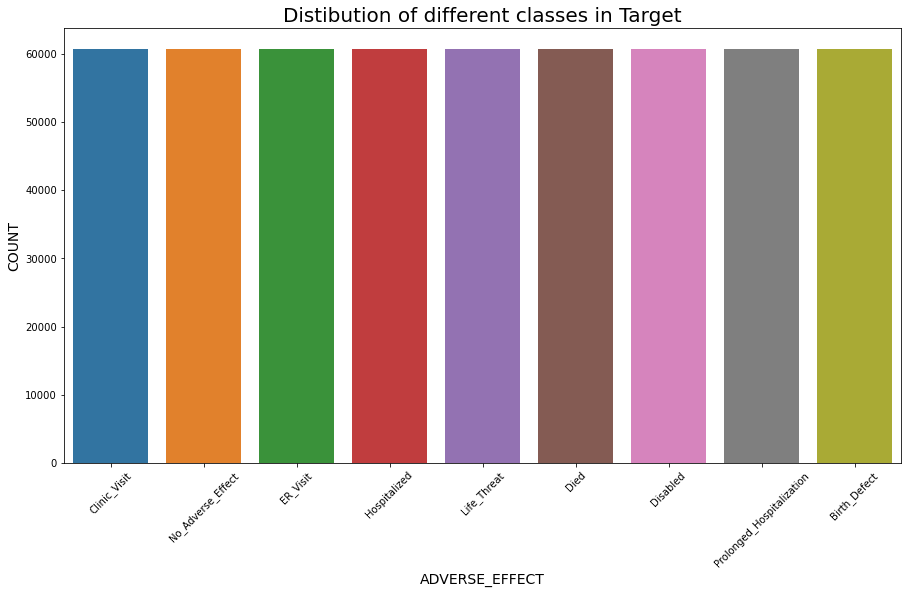

In [94]:
plt.figure(figsize= (15,8))
sns.countplot(df_treated['ADVERSE_EFFECT'])
plt.xticks(rotation= 45)
plt.xlabel('ADVERSE_EFFECT', fontsize= 14)
plt.ylabel('COUNT', fontsize= 14) 
plt.title("Distibution of different classes in Target", fontsize= 20)
plt.show()

In [95]:
z = pd.DataFrame({'Count': df_treated['ADVERSE_EFFECT'].value_counts()})
z

Count
Clinic_Visit               60752
No_Adverse_Effect          60752
ER_Visit                   60752
Hospitalized               60752
Life_Threat                60752
Died                       60752
Disabled                   60752
Prolonged_Hospitalization  60752
Birth_Defect               60752

### Target Encoding of Independent Categorical Variables

In [96]:
df_treated.head(3)

VAX_TYPE         VAX_MANU VAX_DOSE_SERIES STATE SEX     AGE_GROUP  \
VAERS_ID                                                                     
1732113   COVID19          MODERNA               2    PA   M  Senior_Adult   
955351    COVID19  PFIZER\BIONTECH               1    NC   F   Young_Adult   
1365750   COVID19  PFIZER\BIONTECH               2    PA   F  Senior_Adult   

         V_ADMINBY                          SYMPTOMS POST VACCINATION  \
VAERS_ID                                                                
1732113        PHM  Hypoaesthesia, Swelling face, Not_Applicable, ...   
955351         WRK  Hypoaesthesia, Paraesthesia, Not_Applicable, N...   
1365750        UNK  Audiogram abnormal, Deafness unilateral, Tinni...   

          NUMDAYS BETWEEN VAX_DATE & ONSET_DATE RECOVD ADVERSE_EFFECT  
VAERS_ID                                                               
1732113                                0.000000      U   Clinic_Visit  
955351                                 0.000000      U   Clinic_Visit  
1365750                              142.000000      N   Clinic_Visit

In [97]:
import category_encoders as ce

In [98]:
enc= ce.OneHotEncoder().fit(df_treated['ADVERSE_EFFECT'])
y_onehot= enc.transform(df_treated['ADVERSE_EFFECT'])
y_onehot.head(10)

ADVERSE_EFFECT_1  ADVERSE_EFFECT_2  ADVERSE_EFFECT_3  \
VAERS_ID                                                         
1732113                  1                 0                 0   
955351                   1                 0                 0   
1365750                  1                 0                 0   
1681494                  1                 0                 0   
1101508                  1                 0                 0   
1092511                  1                 0                 0   
1356548                  1                 0                 0   
973946                   1                 0                 0   
1303510                  1                 0                 0   
1197962                  1                 0                 0   

          ADVERSE_EFFECT_4  ADVERSE_EFFECT_5  ADVERSE_EFFECT_6  \
VAERS_ID                                                         
1732113                  0                 0                 0   
955351                   0                 0                 0   
1365750                  0                 0                 0   
1681494                  0                 0                 0   
1101508                  0                 0                 0   
1092511                  0                 0                 0   
1356548                  0                 0                 0   
973946                   0                 0                 0   
1303510                  0                 0                 0   
1197962                  0                 0                 0   

          ADVERSE_EFFECT_7  ADVERSE_EFFECT_8  ADVERSE_EFFECT_9  
VAERS_ID                                                        
1732113                  0                 0                 0  
955351                   0                 0                 0  
1365750                  0                 0                 0  
1681494                  0                 0                 0  
1101508                  0                 0                 0  
1092511                  0                 0                 0  
1356548                  0                 0                 0  
973946                   0                 0                 0  
1303510                  0                 0                 0  
1197962                  0                 0                 0

In [99]:
for k in df_treated.drop(['ADVERSE_EFFECT','SYMPTOMS POST VACCINATION'], axis= 1).columns: 
    # target encoding all independent variables except 'Symptoms' feature as it needs to be processed using NLP
    for i in y_onehot.columns:
        encoder = ce.TargetEncoder()
        df_treated[k] = encoder.fit_transform(df_treated[k], y_onehot[i])
    
df_treated.head()

VAX_TYPE  VAX_MANU  VAX_DOSE_SERIES    STATE      SEX  AGE_GROUP  \
VAERS_ID                                                                     
1732113   0.109548  0.112957         0.106306 0.145877 0.078571   0.141481   
955351    0.109548  0.111724         0.115994 0.138122 0.130782   0.120958   
1365750   0.109548  0.111724         0.106306 0.145877 0.130782   0.141481   
1681494   0.109548  0.112957         0.115994 0.140037 0.130782   0.078083   
1101508   0.109548  0.112957         0.106306 0.094102 0.130782   0.120958   

          V_ADMINBY                          SYMPTOMS POST VACCINATION  \
VAERS_ID                                                                 
1732113    0.127139  Hypoaesthesia, Swelling face, Not_Applicable, ...   
955351     0.182265  Hypoaesthesia, Paraesthesia, Not_Applicable, N...   
1365750    0.063428  Audiogram abnormal, Deafness unilateral, Tinni...   
1681494    0.063428  Anxiety, Cardiac failure, Dyspnoea, Echocardio...   
1101508    0.182265  Chills, Headache, Malaise, Syncope, Not_Applic...   

          NUMDAYS BETWEEN VAX_DATE & ONSET_DATE   RECOVD ADVERSE_EFFECT  
VAERS_ID                                                                 
1732113                                0.000000 0.087770   Clinic_Visit  
955351                                 0.000000 0.087770   Clinic_Visit  
1365750                              142.000000 0.122370   Clinic_Visit  
1681494                              208.000000 0.122370   Clinic_Visit  
1101508                                1.000000 0.109014   Clinic_Visit

### Label Encoding the Target Variable

In [100]:
df_treated['ADVERSE_EFFECT'].value_counts()

Clinic_Visit                 60752
No_Adverse_Effect            60752
ER_Visit                     60752
Hospitalized                 60752
Life_Threat                  60752
Died                         60752
Disabled                     60752
Prolonged_Hospitalization    60752
Birth_Defect                 60752
Name: ADVERSE_EFFECT, dtype: int64

In [101]:
from sklearn.preprocessing import OrdinalEncoder 
ode = OrdinalEncoder(categories= [['No_Adverse_Effect', 'Birth_Defect', 'Disabled', 'Clinic_Visit', 'Hospitalized', 'Prolonged_Hospitalization', 'ER_Visit', 'Life_Threat', 'Died']]) 
df_treated['ADVERSE_EFFECT'] = ode.fit_transform(df_treated['ADVERSE_EFFECT'].values.reshape(-1,1))

df_treated.head()

VAX_TYPE  VAX_MANU  VAX_DOSE_SERIES    STATE      SEX  AGE_GROUP  \
VAERS_ID                                                                     
1732113   0.109548  0.112957         0.106306 0.145877 0.078571   0.141481   
955351    0.109548  0.111724         0.115994 0.138122 0.130782   0.120958   
1365750   0.109548  0.111724         0.106306 0.145877 0.130782   0.141481   
1681494   0.109548  0.112957         0.115994 0.140037 0.130782   0.078083   
1101508   0.109548  0.112957         0.106306 0.094102 0.130782   0.120958   

          V_ADMINBY                          SYMPTOMS POST VACCINATION  \
VAERS_ID                                                                 
1732113    0.127139  Hypoaesthesia, Swelling face, Not_Applicable, ...   
955351     0.182265  Hypoaesthesia, Paraesthesia, Not_Applicable, N...   
1365750    0.063428  Audiogram abnormal, Deafness unilateral, Tinni...   
1681494    0.063428  Anxiety, Cardiac failure, Dyspnoea, Echocardio...   
1101508    0.182265  Chills, Headache, Malaise, Syncope, Not_Applic...   

          NUMDAYS BETWEEN VAX_DATE & ONSET_DATE   RECOVD  ADVERSE_EFFECT  
VAERS_ID                                                                  
1732113                                0.000000 0.087770        3.000000  
955351                                 0.000000 0.087770        3.000000  
1365750                              142.000000 0.122370        3.000000  
1681494                              208.000000 0.122370        3.000000  
1101508                                1.000000 0.109014        3.000000

In [102]:
df_treated['ADVERSE_EFFECT'].value_counts()

3.000000    60752
0.000000    60752
6.000000    60752
4.000000    60752
7.000000    60752
8.000000    60752
2.000000    60752
5.000000    60752
1.000000    60752
Name: ADVERSE_EFFECT, dtype: int64

### Model Building without 'SYMPTOMS POST VACCINATION' variable - Decision Tree

In [103]:
y = df_treated['ADVERSE_EFFECT']
X = df_treated.drop(['ADVERSE_EFFECT', 'SYMPTOMS POST VACCINATION'], axis= 1)

In [104]:
y.head()

VAERS_ID
1732113   3.000000
955351    3.000000
1365750   3.000000
1681494   3.000000
1101508   3.000000
Name: ADVERSE_EFFECT, dtype: float64

In [105]:
# Scaling only the 'NUMDAY BETWEEN VAXDATE & ONSETDATE' Variable as the range of values in it is high:

mm = MinMaxScaler() 
mm_arr = mm.fit_transform(X[['NUMDAYS BETWEEN VAX_DATE & ONSET_DATE']]) 
X['NUMDAYS BETWEEN VAX_DATE & ONSET_DATE'] = mm_arr

In [106]:
X.head()

VAX_TYPE  VAX_MANU  VAX_DOSE_SERIES    STATE      SEX  AGE_GROUP  \
VAERS_ID                                                                     
1732113   0.109548  0.112957         0.106306 0.145877 0.078571   0.141481   
955351    0.109548  0.111724         0.115994 0.138122 0.130782   0.120958   
1365750   0.109548  0.111724         0.106306 0.145877 0.130782   0.141481   
1681494   0.109548  0.112957         0.115994 0.140037 0.130782   0.078083   
1101508   0.109548  0.112957         0.106306 0.094102 0.130782   0.120958   

          V_ADMINBY  NUMDAYS BETWEEN VAX_DATE & ONSET_DATE   RECOVD  
VAERS_ID                                                             
1732113    0.127139                               0.000000 0.087770  
955351     0.182265                               0.000000 0.087770  
1365750    0.063428                               0.389041 0.122370  
1681494    0.063428                               0.569863 0.122370  
1101508    0.182265                               0.002740 0.109014

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 10, test_size= 0.3) 

print(X_train.shape)
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(382737, 9)
(164031, 9)
(382737,)
(164031,)


In [108]:
decision_tree = DecisionTreeClassifier(random_state= 10) 
decision_tree = decision_tree.fit(X_train, y_train)

In [109]:
#calculate training accuracy
y_train_pred = decision_tree.predict(X_train)
# pass the actual and predicted target values to the accuracy_score()
print("Training_Accuracy:",accuracy_score(y_train, y_train_pred))



# calculate testing accuracy
y_test_pred = decision_tree.predict(X_test)
# pass the actual and predicted target values to the accuracy_score()
print("Test_Accuracy:",accuracy_score(y_test, y_test_pred),"\n\n")



print("Classification Report for Train data:\n")
print(classification_report(y_train, y_train_pred),"\n")
print("Classification Report for Test data:\n")
print(classification_report(y_test, y_test_pred))

Training_Accuracy: 0.897893331452146
Test_Accuracy: 0.796087324956868 


Classification Report for Train data:

              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78     42430
         1.0       0.99      1.00      0.99     42367
         2.0       0.90      1.00      0.95     42488
         3.0       0.85      0.76      0.80     42471
         4.0       0.92      0.93      0.92     42670
         5.0       0.99      0.99      0.99     42585
         6.0       0.84      0.74      0.79     42539
         7.0       0.88      0.92      0.90     42557
         8.0       0.92      0.96      0.94     42630

    accuracy                           0.90    382737
   macro avg       0.90      0.90      0.90    382737
weighted avg       0.90      0.90      0.90    382737
 

Classification Report for Test data:

              precision    recall  f1-score   support

         0.0       0.53      0.48      0.50     18322
         1.0       0.98      1.00 

In [110]:
y_test_pred_proba = decision_tree.predict_proba(X_test)
print("ROC_AUC Score:",roc_auc_score(y_test, y_test_pred_proba, multi_class= 'ovr'))

ROC_AUC Score: 0.9247234751596487


### NLP - 'SYMPTOMS POST VACCINATION' variable

In [111]:
#Getting Stopwords
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

vect = CountVectorizer(stop_words='english')
stop = list(vect.get_stop_words()) 
print(stop)

#sno = nltk.stem.SnowballStemmer('english')
# lem = WordNetLemmatizer()
# Lemmatizer
# spell check for python

['hereupon', 'five', 'system', 'due', 'with', 'her', 'hereby', 'fifty', 'was', 'whence', 'few', 'will', 'detail', 'made', 'has', 'last', 'every', 'eg', 'must', 'something', 'somehow', 'its', 'take', 'over', 'as', 'go', 'we', 'how', 'also', 'she', 'enough', 'yourselves', 'across', 'whose', 'when', 'under', 'everyone', 'before', 'than', 'however', 'formerly', 'beside', 'below', 'or', 'via', 'whereupon', 'nowhere', 'a', 'between', 'of', 'interest', 'call', 'ten', 'out', 'became', 'find', 'fire', 'which', 'wherever', 'had', 'seem', 'well', 'throughout', 'herself', 'are', 'this', 'whole', 'once', 'hereafter', 'except', 'serious', 'often', 'within', 'back', 'please', 'who', 'give', 'is', 'in', 'name', 'for', 'might', 'done', 'hence', 'through', 'least', 'yours', 'if', 'put', 'mill', 'hundred', 'ie', 'him', 'anything', 'co', 'otherwise', 'among', 'behind', 'always', 'mine', 'noone', 'un', 'being', 'seems', 'bill', 'such', 'bottom', 'full', 'mostly', 'towards', 'where', 'off', 'neither', 'inde

[nltk_data] Downloading package stopwords to C:\Users\Priyadharshini
[nltk_data]     K\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Priyadharshini
[nltk_data]     K\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Priyadharshini
[nltk_data]     K\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [112]:
#Functions for cleaningmpunctuation 
def clean_punc(word):
    cleaned = re.sub(r'[?|!|\'|#|]', r'', word)
    cleaned = re.sub(r'[.|,|)|(|\|/]', r'', cleaned)
    return cleaned

In [113]:
%%time

final_string = []
s = ''
for sentence in df_treated['SYMPTOMS POST VACCINATION'].values:
    filtered_sentence = []
    for word in sentence.split():
        for cleaned_word in clean_punc(word).split():
            if (cleaned_word.isalpha() and (len(cleaned_word) > 1) and cleaned_word not in stop):
                s = cleaned_word.lower()
                filtered_sentence.append(s)
            else:
                continue
                 
    strl = ""' '.join(filtered_sentence)
    final_string.append(strl)

Wall time: 5min 20s


In [114]:
df_treated['PROCESSED_SYMPTOMS'] = final_string

In [115]:
def lemmatize_word(text):
    wordnet = WordNetLemmatizer()
    return "".join([wordnet.lemmatize(word) for word in text])

In [116]:
%%time

df_treated['PROCESSED_SYMPTOMS'] = df_treated['PROCESSED_SYMPTOMS'].apply(lemmatize_word)

Wall time: 13min 59s


In [117]:
df_treated[['SYMPTOMS POST VACCINATION', 'PROCESSED_SYMPTOMS']].head()

SYMPTOMS POST VACCINATION  \
VAERS_ID                                                      
1732113   Hypoaesthesia, Swelling face, Not_Applicable, ...   
955351    Hypoaesthesia, Paraesthesia, Not_Applicable, N...   
1365750   Audiogram abnormal, Deafness unilateral, Tinni...   
1681494   Anxiety, Cardiac failure, Dyspnoea, Echocardio...   
1101508   Chills, Headache, Malaise, Syncope, Not_Applic...   

                                         PROCESSED_SYMPTOMS  
VAERS_ID                                                     
1732113   hypoaesthesia swelling face patients friend ca...  
955351    hypoaesthesia paraesthesia began having tingli...  
1365750   audiogram abnormal deafness unilateral tinnitu...  
1681494   anxiety cardiac failure dyspnoea echocardiogra...  
1101508   chills headache malaise syncope on day followi...

In [118]:
df_treated['PROCESSED_SYMPTOMS'].iloc[0]

'hypoaesthesia swelling face patients friend called hour patient left pharmacy report having facial swelling arm numbness he received vaccine called pharmacy recommended benadryl medical attention needed she going administer benadryl seek medical attention symptoms stayed worsened'

In [119]:
df_treated['SYMPTOMS POST VACCINATION'].iloc[0]

"Hypoaesthesia, Swelling face, Not_Applicable, Not_Applicable, Not_Applicable, Patient's friend called an hour after patient left the pharmacy to report that he was having facial swelling and arm numbness. He received vaccine at 230pm and called the pharmacy back at 335pm. I recommended Benadryl and medical attention if needed. She was going to administer Benadryl  and seek medical attention if his symptoms stayed the same or worsened."

In [120]:
df_treated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546768 entries, 1732113 to 1257320
Data columns (total 12 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   VAX_TYPE                               546768 non-null  float64
 1   VAX_MANU                               546768 non-null  float64
 2   VAX_DOSE_SERIES                        546768 non-null  float64
 3   STATE                                  546768 non-null  float64
 4   SEX                                    546768 non-null  float64
 5   AGE_GROUP                              546768 non-null  float64
 6   V_ADMINBY                              546768 non-null  float64
 7   SYMPTOMS POST VACCINATION              546768 non-null  object 
 8   NUMDAYS BETWEEN VAX_DATE & ONSET_DATE  546768 non-null  float64
 9   RECOVD                                 546768 non-null  float64
 10  ADVERSE_EFFECT                         546768 non

In [121]:
df_treated.columns

Index(['VAX_TYPE', 'VAX_MANU', 'VAX_DOSE_SERIES', 'STATE', 'SEX', 'AGE_GROUP',
       'V_ADMINBY', 'SYMPTOMS POST VACCINATION',
       'NUMDAYS BETWEEN VAX_DATE & ONSET_DATE', 'RECOVD', 'ADVERSE_EFFECT',
       'PROCESSED_SYMPTOMS'],
      dtype='object')

#### Tokenization & Vectorization of Text Column

In [122]:
X_sym = df_treated[['PROCESSED_SYMPTOMS']] 
y_sym = df_treated['ADVERSE_EFFECT'] 

In [123]:
y_sym.head()

VAERS_ID
1732113   3.000000
955351    3.000000
1365750   3.000000
1681494   3.000000
1101508   3.000000
Name: ADVERSE_EFFECT, dtype: float64

In [124]:
X_sym.head()

PROCESSED_SYMPTOMS
VAERS_ID                                                   
1732113   hypoaesthesia swelling face patients friend ca...
955351    hypoaesthesia paraesthesia began having tingli...
1365750   audiogram abnormal deafness unilateral tinnitu...
1681494   anxiety cardiac failure dyspnoea echocardiogra...
1101508   chills headache malaise syncope on day followi...

In [125]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer()

In [126]:
%%time

#Feed SMS data to CountVectorizer
cvect.fit(X_sym['PROCESSED_SYMPTOMS'])

#Check the vocablury size
len(cvect.vocabulary_)

Wall time: 23.6 s


69424

#### Build Document-term Matrix (DTM) - 1000 features

In [127]:
# import and instantiate CountVectorizer (with max 1000 features)
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer(max_features= 1000)

In [128]:
%%time

#Feed SMS data to CountVectorizer
cvect.fit(X_sym['PROCESSED_SYMPTOMS'])

#Check the vocablury size
len(cvect.vocabulary_)

Wall time: 24.9 s


1000

In [129]:
#Convert Training SMS messages into Count Vectors
X_ct = cvect.transform(X_sym['PROCESSED_SYMPTOMS'])
X_ct.shape

(546768, 1000)

### Model Building using 'SYMPTOMS POST VACCINATION' variable - Decision Tree

In [130]:
X_train_sym, X_test_sym, y_train_sym, y_test_sym = train_test_split(X_ct, y_sym, random_state= 10, test_size= 0.3) 

print(X_train_sym.shape)
print(X_test_sym.shape) 
print(y_train_sym.shape) 
print(y_test_sym.shape)

(382737, 1000)
(164031, 1000)
(382737,)
(164031,)


In [131]:
%%time

decision_tree = DecisionTreeClassifier(random_state= 10) 
decision_tree = decision_tree.fit(X_train_sym, y_train_sym)

Wall time: 8min 41s


In [132]:
#calculate training accuracy
y_train_pred_sym = decision_tree.predict(X_train_sym)
# pass the actual and predicted target values to the accuracy_score()
print("Training_Accuracy:",accuracy_score(y_train_sym, y_train_pred_sym))



# calculate testing accuracy
y_test_pred_sym = decision_tree.predict(X_test_sym)
# pass the actual and predicted target values to the accuracy_score()
print("Test_Accuracy:",accuracy_score(y_test_sym, y_test_pred_sym),"\n\n")



print("Classification Report for Train data:\n")
print(classification_report(y_train_sym, y_train_pred_sym),"\n")
print("Classification Report for test data:\n")
print(classification_report(y_test, y_test_pred_sym))

Training_Accuracy: 0.9938182093709257
Test_Accuracy: 0.8926178588193695 


Classification Report for Train data:

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     42430
         1.0       1.00      1.00      1.00     42367
         2.0       1.00      1.00      1.00     42488
         3.0       0.99      0.98      0.99     42471
         4.0       0.99      0.99      0.99     42670
         5.0       1.00      1.00      1.00     42585
         6.0       1.00      0.99      0.99     42539
         7.0       0.99      1.00      0.99     42557
         8.0       1.00      1.00      1.00     42630

    accuracy                           0.99    382737
   macro avg       0.99      0.99      0.99    382737
weighted avg       0.99      0.99      0.99    382737
 

Classification Report for test data:

              precision    recall  f1-score   support

         0.0       0.73      0.66      0.70     18322
         1.0       1.00      1.0

In [133]:
y_test_pred_proba_sym = decision_tree.predict_proba(X_test_sym)
print("ROC_AUC Score:",roc_auc_score(y_test_sym, y_test_pred_proba_sym, multi_class= 'ovr'))

ROC_AUC Score: 0.9434244074816763


### Combining processed text feature and other features

In [134]:
X_ct_df = pd.DataFrame(X_ct.toarray(), index= X_sym.index)
X_ct_df.head()

0    1    2    3    4    5    6    7    8    9    10   11   12   \
VAERS_ID                                                                    
1732113     0    0    0    0    0    0    0    0    0    0    0    0    0   
955351      0    0    0    0    0    0    0    0    0    0    0    0    0   
1365750     0    0    0    0    2    0    0    0    0    0    0    0    0   
1681494     0    0    0    0    4    0    0    0    0    0    0    0    0   
1101508     0    0    0    0    0    0    0    0    0    0    0    0    0   

          13   14   15   16   17   18   19   20   21   22   23   24   25   \
VAERS_ID                                                                    
1732113     0    0    0    0    0    0    0    0    0    0    0    0    0   
955351      0    0    0    0    0    0    0    0    0    0    0    0    0   
1365750     0    0    0    0    0    0    0    0    0    0    0    0    0   
1681494     0    0    1    1    0    0    0    0    1    0    0    0    0   
1101508     0    0    0    0    0    0    0    0    0    0    0    0    0   

          26   27   28   29   30   31   32   33   34   35   36   37   38   \
VAERS_ID                                                                    
1732113     0    0    0    0    0    0    0    0    0    0    0    0    0   
955351      0    0    0    0    0    0    0    0    0    0    0    0    0   
1365750     0    0    0    0    0    0    0    0    0    0    0    0    0   
1681494     0    0    0    0    0    0    0    0    0    0    0    0    0   
1101508     0    0    0    0    0    0    0    0    0    0    0    0    0   

          39   40   41   42   43   44   45   46   47   48   49   50   51   \
VAERS_ID                                                                    
1732113     0    0    0    0    0    0    0    0    0    0    0    0    0   
955351      0    0    0    0    0    0    0    0    0    0    0    0    0   
1365750     0    0    0    0    0    0    0    0    0    0    0    0    0   
1681494     0    0    0    0    0    0    0    0    0    0    6    0    0   
1101508     0    0    0    0    0    0    0    0    0    0    0    0    0   

          52   53   54   55   56   57   58   59   60   61   62   63   64   \
VAERS_ID                                                                    
1732113     0    0    0    0    0    0    0    0    0    1    0    0    0   
955351      0    0    0    0    0    0    0    0    0    1    1    0    0   
1365750     0    0    0    0    0    0    1    0    0    0    0    0    0   
1681494     0    0    0    0    0    0    0    0    0    2    0    0    0   
1101508     0    0    0    0    0    0    0    0    0    0    0    0    0   

          65   66   67   68   69   70   71   72   73   74   75   76   77   \
VAERS_ID                                                                    
1732113     0    0    0    0    0    0    0    0    0    0    0    0    0   
955351      0    0    0    0    0    0    0    0    0    0    0    0    0   
1365750     0    0    0    0    0    0    0    0    0    0    0    0    0   
1681494     0    0    0    0    0    0    0    0    0    0    0    0    0   
1101508     0    0    0    0    0    0    0    0    0    0    0    0    0   

          78   79   80   81   82   83   84   85   86   87   88   89   90   \
VAERS_ID                                                                    
1732113     0    0    0    0    0    0    0    0    0    0    0    0    0   
955351      0    0    0    0    0    0    0    0    0    0    0    0    0   
1365750     0    0    0    0    0    0    0    0    0    0    0    0    0   
1681494     0    1    0    0    0    0    0    0    0    1    0    0    0   
1101508     0    0    0    0    0    0    0    0    0    0    0    0    0   

          91   92   93   94   95   96   97   98   99   100  101  102  103  \
VAERS_ID                                                                    
1732113     0    0    0    0    0    0    0    0    0    2    0    0    0   

In [135]:
X_ct_df.shape

(546768, 1000)

In [136]:
X_full = pd.concat([X, X_ct_df], axis= 1)
X_full.head()

VAX_TYPE  VAX_MANU  VAX_DOSE_SERIES    STATE      SEX  AGE_GROUP  \
VAERS_ID                                                                     
1732113   0.109548  0.112957         0.106306 0.145877 0.078571   0.141481   
955351    0.109548  0.111724         0.115994 0.138122 0.130782   0.120958   
1365750   0.109548  0.111724         0.106306 0.145877 0.130782   0.141481   
1681494   0.109548  0.112957         0.115994 0.140037 0.130782   0.078083   
1101508   0.109548  0.112957         0.106306 0.094102 0.130782   0.120958   

          V_ADMINBY  NUMDAYS BETWEEN VAX_DATE & ONSET_DATE   RECOVD  0  1  2  \
VAERS_ID                                                                       
1732113    0.127139                               0.000000 0.087770  0  0  0   
955351     0.182265                               0.000000 0.087770  0  0  0   
1365750    0.063428                               0.389041 0.122370  0  0  0   
1681494    0.063428                               0.569863 0.122370  0  0  0   
1101508    0.182265                               0.002740 0.109014  0  0  0   

          3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  \
VAERS_ID                                                                        
1732113   0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   
955351    0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   
1365750   0  2  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   
1681494   0  4  0  0  0  0  0   0   0   0   0   0   1   1   0   0   0   0   1   
1101508   0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   

          22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  \
VAERS_ID                                                                       
1732113    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
955351     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1365750    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1681494    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1101508    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

          39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  \
VAERS_ID                                                                       
1732113    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
955351     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1365750    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1681494    0   0   0   0   0   0   0   0   0   0   6   0   0   0   0   0   0   
1101508    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

          56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  \
VAERS_ID                                                                       
1732113    0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   
955351     0   0   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0   
1365750    0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1681494    0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   
1101508    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

          73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  \
VAERS_ID                                                                       
1732113    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
955351     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1365750    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1681494    0   0   0   0   0   0   1   0   0   0   0   0   0   0   1   0   0   
1101508    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

          90  91  92  93  94  95  96  97  98  99  100  101  102  103  104  \
VAERS_ID     

In [137]:
X_full.shape

(546768, 1009)

In [138]:
y.head()

VAERS_ID
1732113   3.000000
955351    3.000000
1365750   3.000000
1681494   3.000000
1101508   3.000000
Name: ADVERSE_EFFECT, dtype: float64

In [139]:
y.shape

(546768,)

### Comparison of Base Models

In [163]:
# Comparison of different base models:

LR=LogisticRegression()  
NB = GaussianNB() 
DT = DecisionTreeClassifier(random_state= 10)

models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('DecisionTree', DT))

In [162]:
%%time

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(shuffle=True, n_splits= 10, random_state= 10)
    cv_results = cross_val_score(model, X_ct, y, cv=kfold, scoring='roc_auc_ovr', n_jobs= -1)
    results.append(cv_results)
    names.append(name)
    print("%s" % (name),"Model:")
    print("ROC_AUC_Score= %f;  Bias= %f;  Variance= %f" % (np.mean(cv_results), np.mean(1-cv_results), np.std(cv_results,ddof=1)),"\n")

Logistic Model:
ROC_AUC_Score= 0.952005;  Bias= 0.047995;  Variance= 0.000457 

NaiveBayes Model:
ROC_AUC_Score= nan;  Bias= nan;  Variance= nan 

DecisionTree Model:
ROC_AUC_Score= 0.951393;  Bias= 0.048607;  Variance= 0.000651 

Wall time: 1h 53s


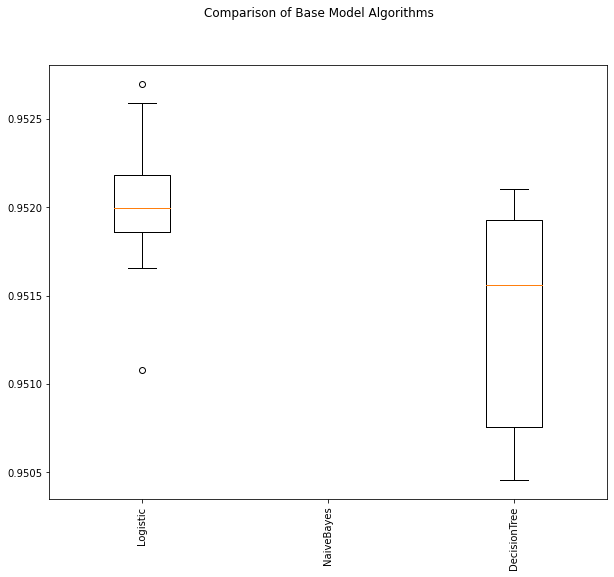

In [163]:
# boxplot algorithm comparison
fig = plt.figure(figsize= (10,8))
fig.suptitle('Comparison of Base Model Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation= 90)
plt.show()

### FULL BASE MODEL - DECISION TREE

In [140]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y, random_state= 10, test_size= 0.3)

print("X_train_full: ", X_train_full.shape)
print("X_test_full: ", X_test_full.shape)
print("y_train:", y_train_full.shape)
print("y_test:", y_test_full.shape)

X_train_full:  (382737, 1009)
X_test_full:  (164031, 1009)
y_train: (382737,)
y_test: (164031,)


In [141]:
%%time

decision_tree = DecisionTreeClassifier(random_state= 10) 
decision_tree = decision_tree.fit(X_train_full, y_train_full)

Wall time: 3min 21s


In [142]:
#calculate training accuracy
y_train_pred_full = decision_tree.predict(X_train_full)
# pass the actual and predicted target values to the accuracy_score()
print("Training_Accuracy:",accuracy_score(y_train_full, y_train_pred_full))

# calculate testing accuracy
y_test_pred_full = decision_tree.predict(X_test_full)
# pass the actual and predicted target values to the accuracy_score()
print("Test_Accuracy:",accuracy_score(y_test_full, y_test_pred_full),"\n\n")


print("Classification Report for Train data:")
print(classification_report(y_train_full, y_train_pred_full),"\n")
print("Classification Report for test data:")
print(classification_report(y_test_full, y_test_pred_full))

Training_Accuracy: 0.999989548959207
Test_Accuracy: 0.8961050045418244 


Classification Report for Train data:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42430
         1.0       1.00      1.00      1.00     42367
         2.0       1.00      1.00      1.00     42488
         3.0       1.00      1.00      1.00     42471
         4.0       1.00      1.00      1.00     42670
         5.0       1.00      1.00      1.00     42585
         6.0       1.00      1.00      1.00     42539
         7.0       1.00      1.00      1.00     42557
         8.0       1.00      1.00      1.00     42630

    accuracy                           1.00    382737
   macro avg       1.00      1.00      1.00    382737
weighted avg       1.00      1.00      1.00    382737
 

Classification Report for test data:
              precision    recall  f1-score   support

         0.0       0.74      0.67      0.70     18322
         1.0       1.00      1.00  

In [143]:
y_test_pred_proba_full = decision_tree.predict_proba(X_test_full)
print("ROC_AUC Score:",roc_auc_score(y_test_full, y_test_pred_proba_full, multi_class= 'ovr'))

ROC_AUC Score: 0.9417068543332646


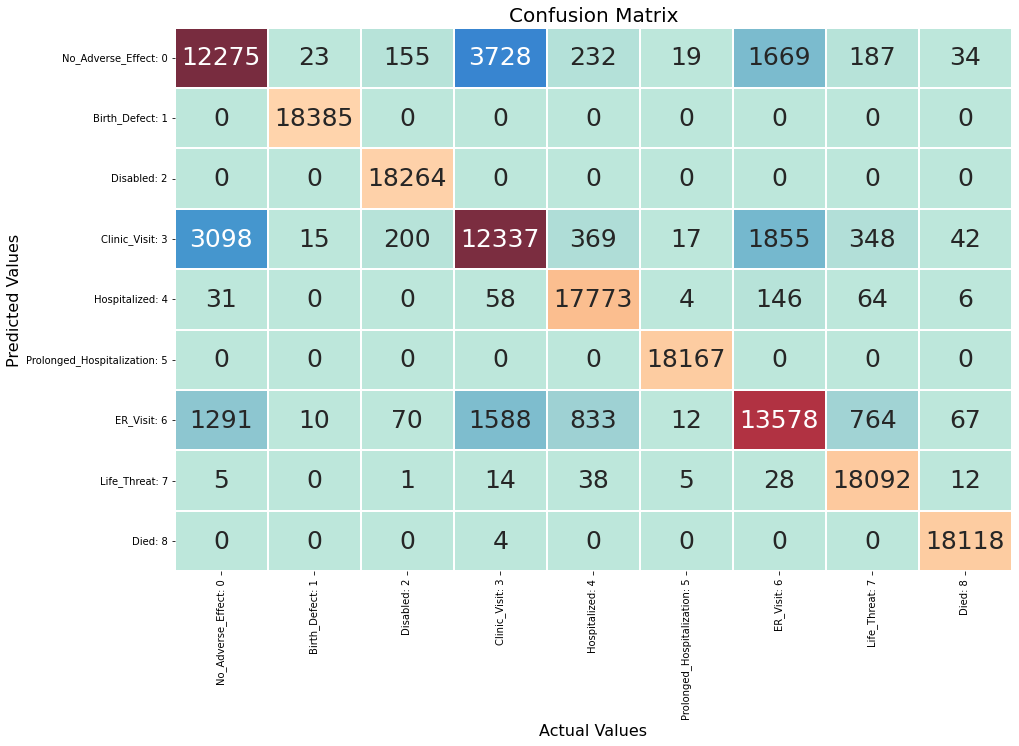

In [144]:
# Confusion Matrix: 

cm = confusion_matrix(y_test_full, y_test_pred_full) 
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['No_Adverse_Effect: 0','Birth_Defect: 1', 'Disabled: 2', 'Clinic_Visit: 3', 'Hospitalized: 4', 'Prolonged_Hospitalization: 5', 'ER_Visit: 6', 'Life_Threat: 7', 'Died: 8'], 
                           index = ['No_Adverse_Effect: 0','Birth_Defect: 1', 'Disabled: 2', 'Clinic_Visit: 3', 'Hospitalized: 4', 'Prolonged_Hospitalization: 5', 'ER_Visit: 6', 'Life_Threat: 7', 'Died: 8']
                          )

plt.figure(figsize= (15,10))
sns.heatmap(conf_matrix, annot = True, cmap= 'icefire', fmt = 'd', cbar = False, linewidths = 0.1, annot_kws = {'size':25})
plt.xlabel('Actual Values', fontsize= 16)
plt.ylabel('Predicted Values', fontsize= 16) 
plt.title('Confusion Matrix', fontsize= 20)
plt.show()

In [145]:
import yellowbrick

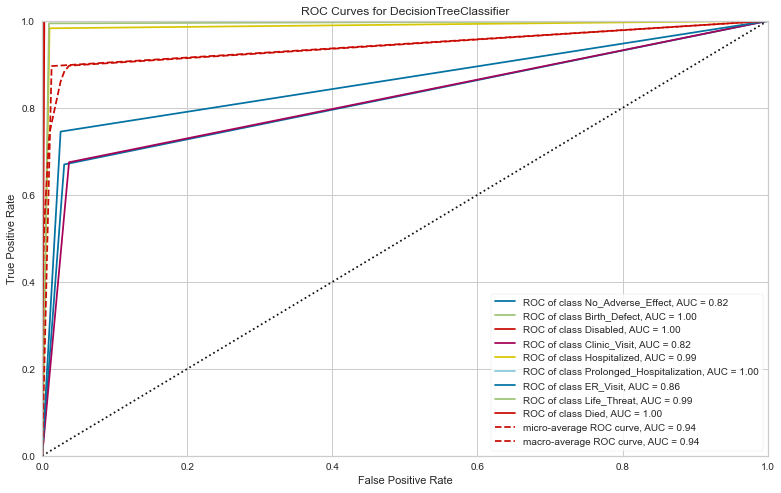

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [146]:
from yellowbrick.classifier import ROCAUC
plt.figure(figsize= (13, 8))
visualizer = ROCAUC(decision_tree, classes=['No_Adverse_Effect', 'Birth_Defect', 'Disabled', 'Clinic_Visit', 'Hospitalized', 'Prolonged_Hospitalization', 'ER_Visit', 'Life_Threat', 'Died'])

visualizer.fit(X_train_full, y_train_full)        # Fit the training data to the visualizer
visualizer.score(X_test_full, y_test_full)        # Evaluate the model on the test data
visualizer.show() 

### Analysis using Ensemble Models

#### Random Forest Classifier

In [147]:
%%time

rf = RandomForestClassifier(random_state= 10) 
rf.fit(X_train_full, y_train_full)

RandomForestClassifier(random_state=10)

In [148]:
%%time

#calculate training accuracy
y_train_pred_full = rf.predict(X_train_full)
# pass the actual and predicted target values to the accuracy_score()
print("Training_Accuracy:",accuracy_score(y_train_full, y_train_pred_full))

# calculate testing accuracy
y_test_pred_full = rf.predict(X_test_full)
# pass the actual and predicted target values to the accuracy_score()
print("Test_Accuracy:",accuracy_score(y_test_full, y_test_pred_full),"\n\n")


print("Classification Report for Train data:")
print(classification_report(y_train_full, y_train_pred_full),"\n")
print("Classification Report for test data:")
print(classification_report(y_test_full, y_test_pred_full))

Training_Accuracy: 0.999989548959207
Test_Accuracy: 0.9304643634434955 


Classification Report for Train data:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42430
         1.0       1.00      1.00      1.00     42367
         2.0       1.00      1.00      1.00     42488
         3.0       1.00      1.00      1.00     42471
         4.0       1.00      1.00      1.00     42670
         5.0       1.00      1.00      1.00     42585
         6.0       1.00      1.00      1.00     42539
         7.0       1.00      1.00      1.00     42557
         8.0       1.00      1.00      1.00     42630

    accuracy                           1.00    382737
   macro avg       1.00      1.00      1.00    382737
weighted avg       1.00      1.00      1.00    382737
 

Classification Report for test data:
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.80     18322
         1.0       1.00      1.00  

In [149]:
y_test_pred_proba_full = rf.predict_proba(X_test_full)
print("ROC_AUC Score:",roc_auc_score(y_test_full, y_test_pred_proba_full, multi_class= 'ovr'))

ROC_AUC Score: 0.9942814836059871


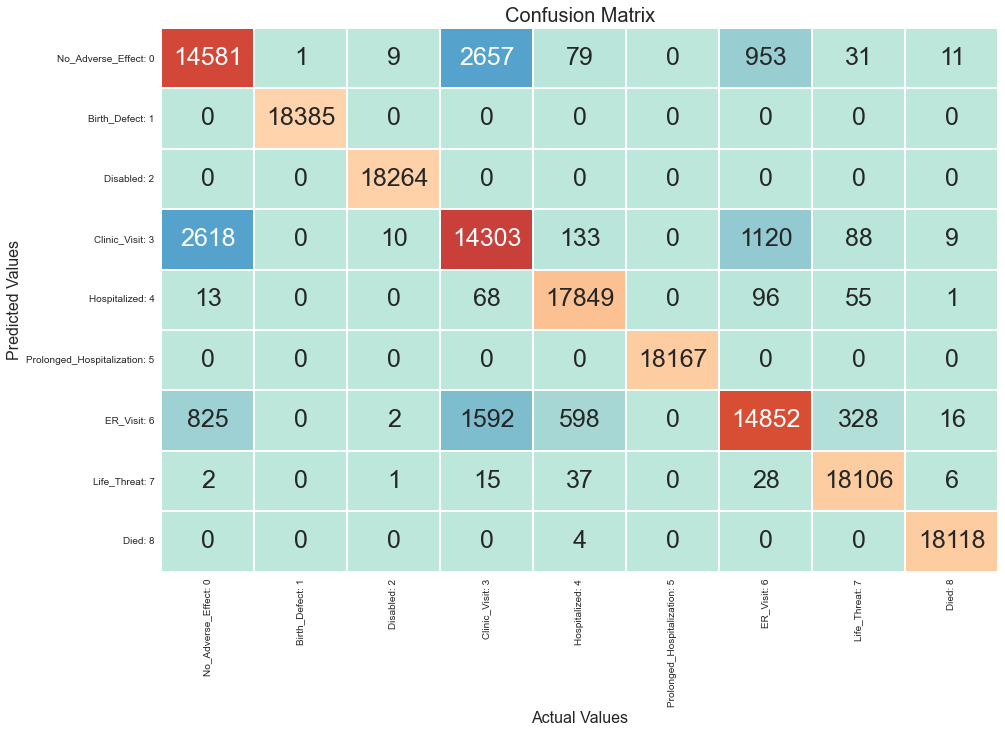

In [150]:
# Confusion Matrix: 

cm = confusion_matrix(y_test_full, y_test_pred_full) 
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['No_Adverse_Effect: 0','Birth_Defect: 1', 'Disabled: 2', 'Clinic_Visit: 3', 'Hospitalized: 4', 'Prolonged_Hospitalization: 5', 'ER_Visit: 6', 'Life_Threat: 7', 'Died: 8'], 
                           index = ['No_Adverse_Effect: 0','Birth_Defect: 1', 'Disabled: 2', 'Clinic_Visit: 3', 'Hospitalized: 4', 'Prolonged_Hospitalization: 5', 'ER_Visit: 6', 'Life_Threat: 7', 'Died: 8']
                          )

plt.figure(figsize= (15,10))
sns.heatmap(conf_matrix, annot = True, cmap= 'icefire', fmt = 'd', cbar = False, linewidths = 0.1, annot_kws = {'size':25})
plt.xlabel('Actual Values', fontsize= 16)
plt.ylabel('Predicted Values', fontsize= 16) 
plt.title('Confusion Matrix', fontsize= 20)
plt.show()

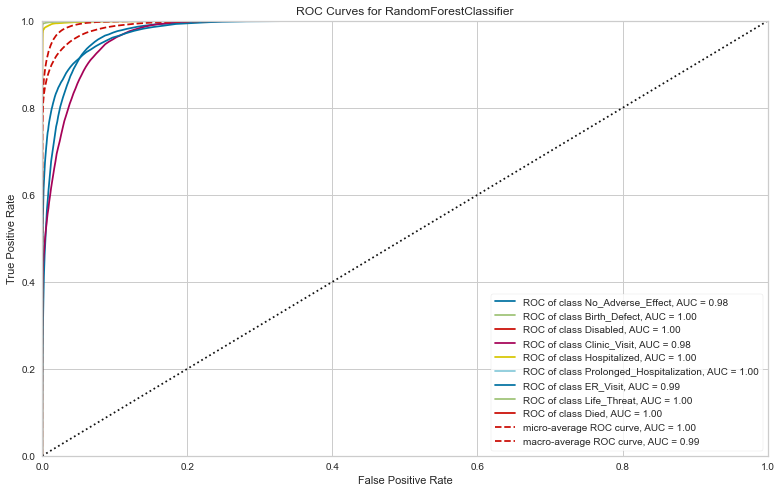

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [151]:
from yellowbrick.classifier import ROCAUC
plt.figure(figsize= (13, 8))
visualizer = ROCAUC(rf, classes=['No_Adverse_Effect', 'Birth_Defect', 'Disabled', 'Clinic_Visit', 'Hospitalized', 'Prolonged_Hospitalization', 'ER_Visit', 'Life_Threat', 'Died'])

visualizer.fit(X_train_full, y_train_full)        # Fit the training data to the visualizer
visualizer.score(X_test_full, y_test_full)        # Evaluate the model on the test data
visualizer.show()

#### Ada Boost Classifier

In [152]:
%%time

ab = AdaBoostClassifier(random_state= 10) 
ab.fit(X_train_full, y_train_full)

AdaBoostClassifier(random_state=10)

In [154]:
%%time

#calculate training accuracy
y_train_pred_full = ab.predict(X_train_full)
# pass the actual and predicted target values to the accuracy_score()
print("Training_Accuracy:",accuracy_score(y_train_full, y_train_pred_full))

# calculate testing accuracy
y_test_pred_full = ab.predict(X_test_full)
# pass the actual and predicted target values to the accuracy_score()
print("Test_Accuracy:",accuracy_score(y_test_full, y_test_pred_full),"\n\n")


print("Classification Report for Train data:")
print(classification_report(y_train_full, y_train_pred_full),"\n")
print("Classification Report for test data:")
print(classification_report(y_test_full, y_test_pred_full))

Training_Accuracy: 0.4654762931203411
Test_Accuracy: 0.46600337741036757 


Classification Report for Train data:
              precision    recall  f1-score   support

         0.0       0.37      0.59      0.45     42430
         1.0       0.75      0.50      0.60     42367
         2.0       0.45      0.61      0.51     42488
         3.0       0.26      0.23      0.24     42471
         4.0       0.42      0.58      0.49     42670
         5.0       0.32      0.20      0.25     42585
         6.0       0.41      0.30      0.35     42539
         7.0       0.42      0.32      0.36     42557
         8.0       0.89      0.85      0.87     42630

    accuracy                           0.47    382737
   macro avg       0.48      0.47      0.46    382737
weighted avg       0.48      0.47      0.46    382737
 

Classification Report for test data:
              precision    recall  f1-score   support

         0.0       0.37      0.59      0.46     18322
         1.0       0.76      0.50

In [155]:
y_test_pred_proba_full = ab.predict_proba(X_test_full)
print("ROC_AUC Score:",roc_auc_score(y_test_full, y_test_pred_proba_full, multi_class= 'ovr'))

ROC_AUC Score: 0.7500772165631805


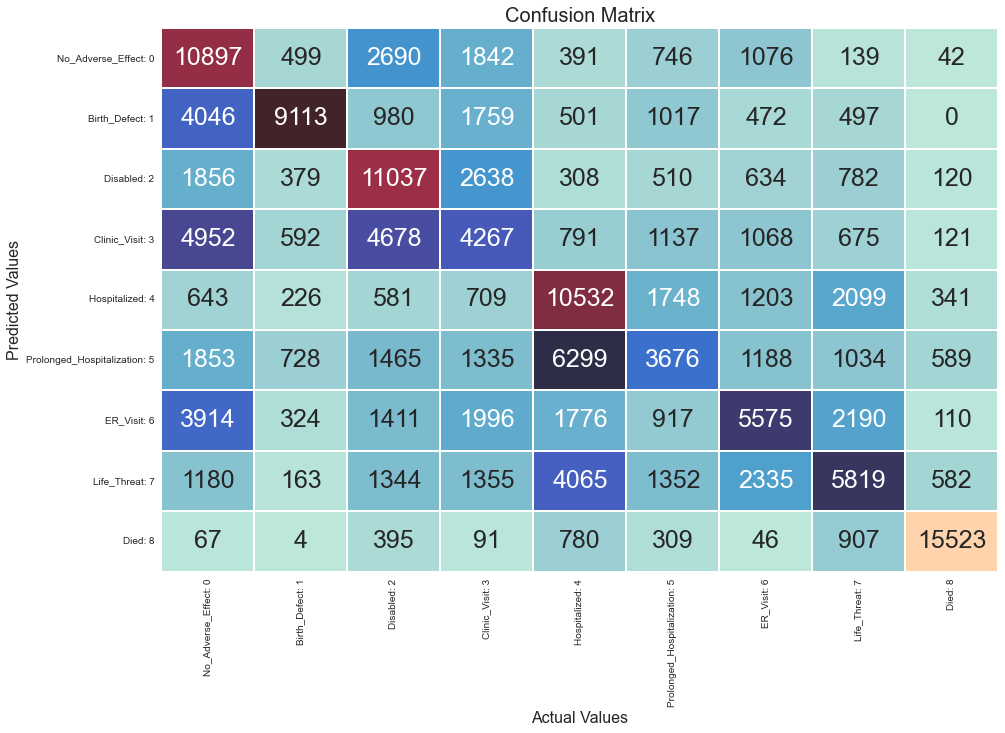

In [156]:
# Confusion Matrix: 

cm = confusion_matrix(y_test_full, y_test_pred_full) 
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['No_Adverse_Effect: 0','Birth_Defect: 1', 'Disabled: 2', 'Clinic_Visit: 3', 'Hospitalized: 4', 'Prolonged_Hospitalization: 5', 'ER_Visit: 6', 'Life_Threat: 7', 'Died: 8'], 
                           index = ['No_Adverse_Effect: 0','Birth_Defect: 1', 'Disabled: 2', 'Clinic_Visit: 3', 'Hospitalized: 4', 'Prolonged_Hospitalization: 5', 'ER_Visit: 6', 'Life_Threat: 7', 'Died: 8']
                          )

plt.figure(figsize= (15,10))
sns.heatmap(conf_matrix, annot = True, cmap= 'icefire', fmt = 'd', cbar = False, linewidths = 0.1, annot_kws = {'size':25})
plt.xlabel('Actual Values', fontsize= 16)
plt.ylabel('Predicted Values', fontsize= 16) 
plt.title('Confusion Matrix', fontsize= 20)
plt.show()

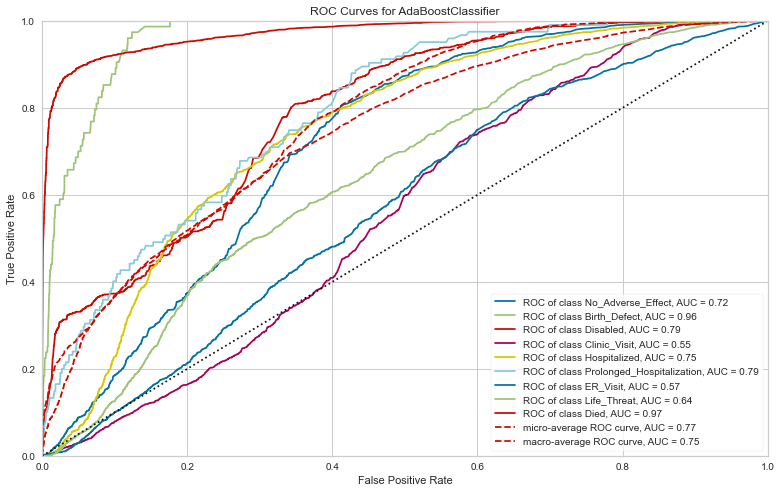

<AxesSubplot:title={'center':'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [157]:
from yellowbrick.classifier import ROCAUC
plt.figure(figsize= (13, 8))
visualizer = ROCAUC(ab, classes=['No_Adverse_Effect', 'Birth_Defect', 'Disabled', 'Clinic_Visit', 'Hospitalized', 'Prolonged_Hospitalization', 'ER_Visit', 'Life_Threat', 'Died'])

visualizer.fit(X_train_full, y_train_full)        # Fit the training data to the visualizer
visualizer.score(X_test_full, y_test_full)        # Evaluate the model on the test data
visualizer.show()

#### Gradient Boost Classifier

In [158]:
%%time

gb = GradientBoostingClassifier(random_state= 10) 
gb.fit(X_train_full, y_train_full)

GradientBoostingClassifier(random_state=10)

In [159]:
%%time

#calculate training accuracy
y_train_pred_full = gb.predict(X_train_full)
# pass the actual and predicted target values to the accuracy_score()
print("Training_Accuracy:",accuracy_score(y_train_full, y_train_pred_full))

# calculate testing accuracy
y_test_pred_full = gb.predict(X_test_full)
# pass the actual and predicted target values to the accuracy_score()
print("Test_Accuracy:",accuracy_score(y_test_full, y_test_pred_full),"\n\n")


print("Classification Report for Train data:")
print(classification_report(y_train_full, y_train_pred_full),"\n")
print("Classification Report for test data:")
print(classification_report(y_test_full, y_test_pred_full))

Training_Accuracy: 0.7177722561445588
Test_Accuracy: 0.7166937956849619 


Classification Report for Train data:
              precision    recall  f1-score   support

         0.0       0.60      0.67      0.63     42430
         1.0       0.91      0.96      0.94     42367
         2.0       0.69      0.80      0.74     42488
         3.0       0.50      0.47      0.49     42471
         4.0       0.67      0.66      0.66     42670
         5.0       0.89      0.87      0.88     42585
         6.0       0.61      0.53      0.56     42539
         7.0       0.62      0.59      0.61     42557
         8.0       0.96      0.91      0.93     42630

    accuracy                           0.72    382737
   macro avg       0.72      0.72      0.72    382737
weighted avg       0.72      0.72      0.72    382737
 

Classification Report for test data:
              precision    recall  f1-score   support

         0.0       0.60      0.67      0.64     18322
         1.0       0.91      0.96 

In [160]:
y_test_pred_proba_full = gb.predict_proba(X_test_full)
print("ROC_AUC Score:",roc_auc_score(y_test_full, y_test_pred_proba_full, multi_class= 'ovr'))

ROC_AUC Score: 0.94379042273224


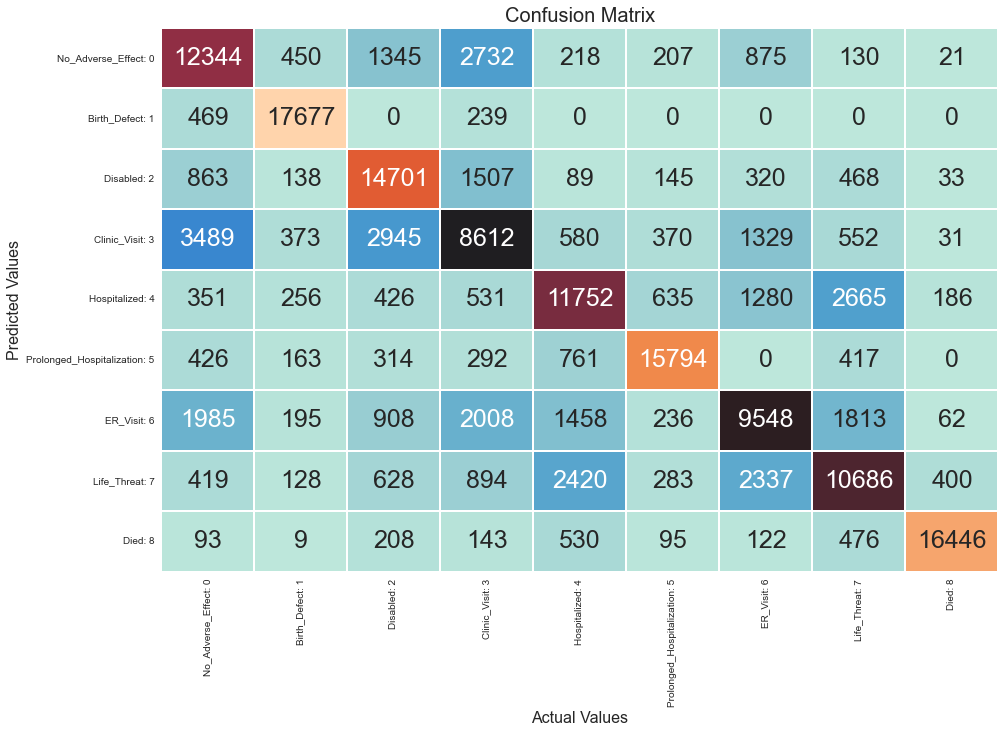

In [161]:
# Confusion Matrix: 

cm = confusion_matrix(y_test_full, y_test_pred_full) 
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['No_Adverse_Effect: 0','Birth_Defect: 1', 'Disabled: 2', 'Clinic_Visit: 3', 'Hospitalized: 4', 'Prolonged_Hospitalization: 5', 'ER_Visit: 6', 'Life_Threat: 7', 'Died: 8'], 
                           index = ['No_Adverse_Effect: 0','Birth_Defect: 1', 'Disabled: 2', 'Clinic_Visit: 3', 'Hospitalized: 4', 'Prolonged_Hospitalization: 5', 'ER_Visit: 6', 'Life_Threat: 7', 'Died: 8']
                          )

plt.figure(figsize= (15,10))
sns.heatmap(conf_matrix, annot = True, cmap= 'icefire', fmt = 'd', cbar = False, linewidths = 0.1, annot_kws = {'size':25})
plt.xlabel('Actual Values', fontsize= 16)
plt.ylabel('Predicted Values', fontsize= 16) 
plt.title('Confusion Matrix', fontsize= 20)
plt.show()

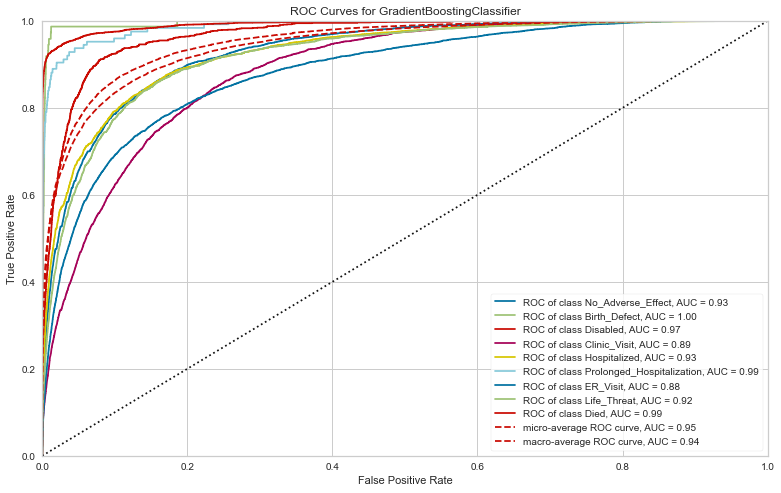

<AxesSubplot:title={'center':'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [162]:
from yellowbrick.classifier import ROCAUC
plt.figure(figsize= (13, 8))
visualizer = ROCAUC(gb, classes=['No_Adverse_Effect', 'Birth_Defect', 'Disabled', 'Clinic_Visit', 'Hospitalized', 'Prolonged_Hospitalization', 'ER_Visit', 'Life_Threat', 'Died'])

visualizer.fit(X_train_full, y_train_full)        # Fit the training data to the visualizer
visualizer.score(X_test_full, y_test_full)        # Evaluate the model on the test data
visualizer.show()

#### XG Boost Classifier

In [163]:
%%time

xgb = XGBClassifier()
xgb.fit(X_train_full, y_train_full)

[19:01:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 26min 13s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [164]:
%%time

#calculate training accuracy
y_train_pred_full = xgb.predict(X_train_full)
# pass the actual and predicted target values to the accuracy_score()
print("Training_Accuracy:",accuracy_score(y_train_full, y_train_pred_full))

# calculate testing accuracy
y_test_pred_full = xgb.predict(X_test_full)
# pass the actual and predicted target values to the accuracy_score()
print("Test_Accuracy:",accuracy_score(y_test_full, y_test_pred_full),"\n\n")


print("Classification Report for Train data:")
print(classification_report(y_train_full, y_train_pred_full),"\n")
print("Classification Report for test data:")
print(classification_report(y_test_full, y_test_pred_full))

Training_Accuracy: 0.8340583742883494
Test_Accuracy: 0.820027921551414 


Classification Report for Train data:
              precision    recall  f1-score   support

         0.0       0.71      0.75      0.73     42430
         1.0       0.99      1.00      1.00     42367
         2.0       0.83      0.98      0.90     42488
         3.0       0.63      0.60      0.62     42471
         4.0       0.82      0.80      0.81     42670
         5.0       0.99      1.00      0.99     42585
         6.0       0.74      0.63      0.68     42539
         7.0       0.78      0.79      0.79     42557
         8.0       0.98      0.95      0.97     42630

    accuracy                           0.83    382737
   macro avg       0.83      0.83      0.83    382737
weighted avg       0.83      0.83      0.83    382737
 

Classification Report for test data:
              precision    recall  f1-score   support

         0.0       0.69      0.73      0.71     18322
         1.0       0.99      1.00  

In [165]:
y_test_pred_proba_full = xgb.predict_proba(X_test_full)
print("ROC_AUC Score:",roc_auc_score(y_test_full, y_test_pred_proba_full, multi_class= 'ovr'))

ROC_AUC Score: 0.9748031276171852


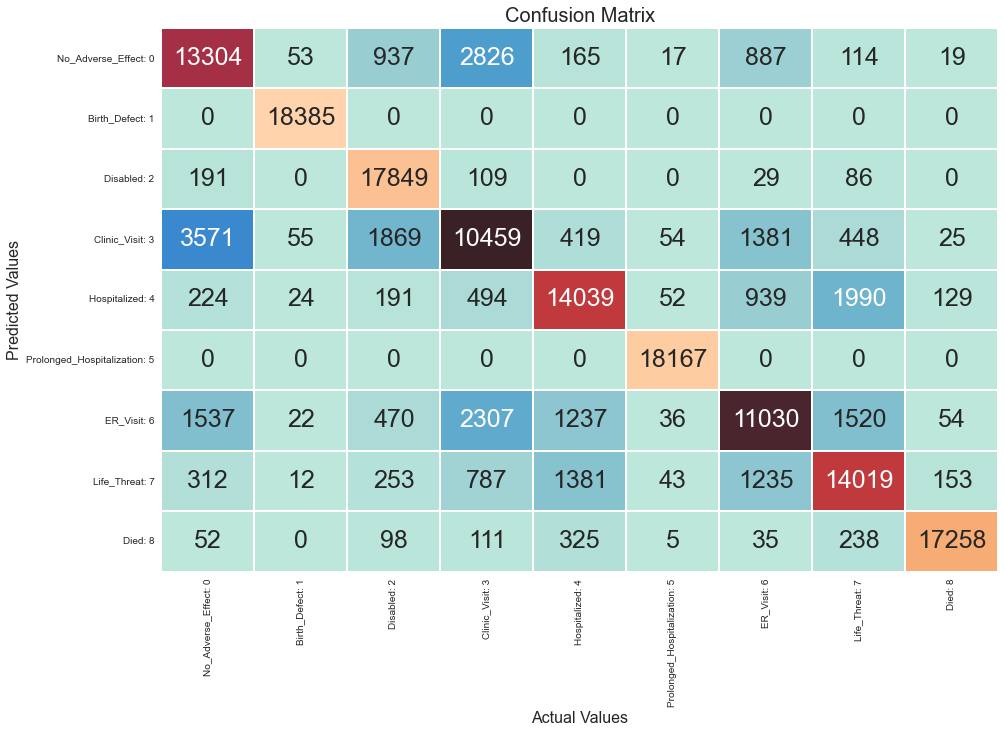

In [166]:
# Confusion Matrix: 

cm = confusion_matrix(y_test_full, y_test_pred_full) 
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['No_Adverse_Effect: 0','Birth_Defect: 1', 'Disabled: 2', 'Clinic_Visit: 3', 'Hospitalized: 4', 'Prolonged_Hospitalization: 5', 'ER_Visit: 6', 'Life_Threat: 7', 'Died: 8'], 
                           index = ['No_Adverse_Effect: 0','Birth_Defect: 1', 'Disabled: 2', 'Clinic_Visit: 3', 'Hospitalized: 4', 'Prolonged_Hospitalization: 5', 'ER_Visit: 6', 'Life_Threat: 7', 'Died: 8']
                          )

plt.figure(figsize= (15,10))
sns.heatmap(conf_matrix, annot = True, cmap= 'icefire', fmt = 'd', cbar = False, linewidths = 0.1, annot_kws = {'size':25})
plt.xlabel('Actual Values', fontsize= 16)
plt.ylabel('Predicted Values', fontsize= 16) 
plt.title('Confusion Matrix', fontsize= 20)
plt.show()

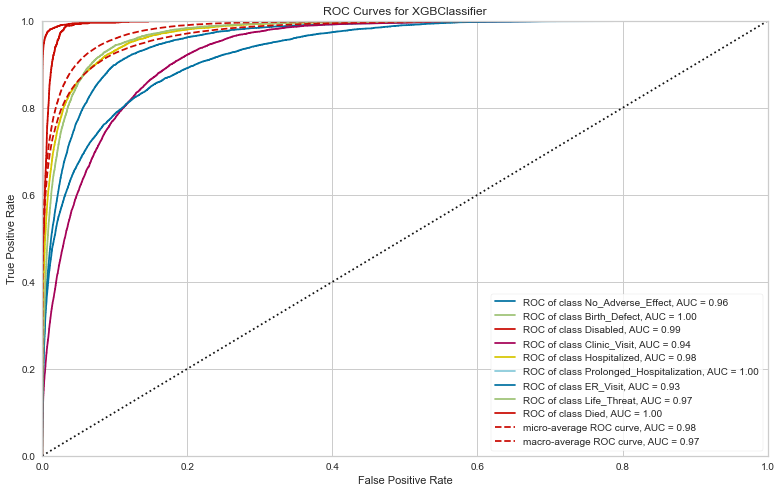

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [167]:
from yellowbrick.classifier import ROCAUC
plt.figure(figsize= (13, 8))
visualizer = ROCAUC(xgb, classes=['No_Adverse_Effect', 'Birth_Defect', 'Disabled', 'Clinic_Visit', 'Hospitalized', 'Prolonged_Hospitalization', 'ER_Visit', 'Life_Threat', 'Died'])

visualizer.fit(X_train_full, y_train_full)        # Fit the training data to the visualizer
visualizer.score(X_test_full, y_test_full)        # Evaluate the model on the test data
visualizer.show()

### Analysis using GridSearchCV and Ensemble Models

In [191]:
kf = StratifiedKFold(shuffle= True, n_splits= 3, random_state= 1)

In [192]:
# Best Parameters for DT Model: 

dt_paramaters = [{'criterion': ['entropy', 'gini'], 
                  'max_depth': range(2, 10), 
                  'min_samples_split': range(2,10)}] 

decision_tree_model = DecisionTreeClassifier(random_state = 1)

tree_grid = GridSearchCV(estimator = decision_tree_model, param_grid = dt_paramaters, cv = kf, scoring= 'roc_auc_ovr', n_jobs= -1)
tree_grid.fit(X_train_full,y_train_full) 

tree_grid.best_params_

MemoryError: Unable to allocate 973. MiB for an array with shape (1000, 127579) and data type int64

In [ ]:
# Best Parameters for RF Model: 

rf_parameters = [{'criterion': ['entropy', 'gini'], 
                  'n_estimators': [90, 100, 150, 200], 
                   'max_depth': [10, 15, 20], 
                   'min_samples_split': [2, 5, 8]}]

random_forest_classification = RandomForestClassifier(random_state = 1, n_jobs= -1)

rf_grid = GridSearchCV(estimator = random_forest_classification, param_grid = rf_parameters, cv = kf ,scoring='roc_auc_ovr', n_jobs= -1) 
rf_grid.fit(X_train_full, y_train_full) 

rf_grid.best_params_

In [ ]:
# Best Parameters for ADABOOST Model:

ada_parameters = {'n_estimators': [100, 120, 150, 200, 250, 300, 350], 
                  'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]} 

ada_model = AdaBoostClassifier(random_state= 1) 

ada_grid = GridSearchCV(estimator= ada_model, param_grid= ada_parameters, cv= kf, scoring= 'roc_auc_ovr', n_jobs= -1) 
ada_grid.fit(X_train_full, y_train_full) 

ada_grid.best_params_

In [ ]:
# Best Parameters for GRADIENTBOOST Model:

gboost_parameters = {'n_estimators': [100, 120, 150, 200, 250, 300, 350],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
                     'max_depth': [2, 3, 4, 5, 6]}

gboost_model = GradientBoostingClassifier(random_state= 1) 

gboost_grid = GridSearchCV(estimator= gboost_model, param_grid= gboost_parameters, cv= kf, n_jobs= -1) 
gboost_grid.fit(X_train, y_train)

gboost_grid.best_params_

In [ ]:
# Best Parameters for XGBOOST Model:

xgb_parameters = [{'n_estimators': [100, 120, 150], 
                   'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
                   'gamma': [2, 3, 4, 5, 6], 
                   'max_depth': [2, 3, 4, 5, 6]}]

xgb_model = XGBClassifier(random_state= 1) 

xgb_grid = GridSearchCV(estimator= xgb_model, param_grid= xgb_parameters, cv= kf, n_jobs= -1) 
xgb_grid.fit(X_train, y_train)

xgb_grid.best_params_

In [ ]:
# Declaring base learners for Stacking Classifier: 

base_learners = [('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier())]